# Evaluating Recommender Systems for Digital Library Datasets

## Content Based Algorithms - Comparison/Evaluation based on Metrics/Properties

In [4]:
import pandas as pd
from IPython.display import display, HTML

In [8]:
f_ext = {"Feature Extraction Methods":["TF-IDF", "LSA", "Word2Vec", "Doc2Vec", "BERT", "BoW", "BM25", "LDA", "FastText", "GloVe"]}
# sim_m = {"Similarity and Distance Measures":["Cosine Similarity", "Euclidean Distance", "Jaccard Similarity", "Manhattan Distance", "Pearson Correlation", "Bray-Curtis Distance", "Canberra Distance", "Minkowski Distance", "Mahalanobis Distance", "Wasserstein Distance"]}
d_ext = pd.DataFrame(f_ext); d_ext
d_ext.insert(0, "No.", range(1, len(d_ext) + 1))
# d_sim = pd.DataFrame(sim_m); d_sim
# d_sim.insert(0, "No.", range(1, len(d_sim) + 1))

display(HTML(f"""
<div style="display: flex; justify-content: space-around;">
    <div>{d_ext.to_html(index=False)}</div>
</div>
"""))
# <div>{d_sim.to_html(index=False)}</div>

No.,Feature Extraction Methods
1,TF-IDF
2,LSA
3,Word2Vec
4,Doc2Vec
5,BERT
6,BoW
7,BM25
8,LDA
9,FastText
10,GloVe


### Evaluation Metrics/Properties:
- Prediction Accuracy
    - Ratings Prediction Accuracy ? (ratings)
    - Usage Prediction (feedback)
    - Ranking Measures
- **Coverage**
- **Confidence**
- **AVG Similarity**
- **Diversity**
- **Speed**
- **Memory Usage**
- Trust
- Novelty
- Serendipity
- Utility
- Risk
- Robustness
- Privacy
- Adaptability
- Scalability


-> choose 1 book/paragraph/chapter?  
-> run the algorithms for finding the recommended book/paragraph/chapter? for that chosen one - based on:<br>
- summary
- title
- full text X
- paragraph
- page X
- sentence X
- chapter ?

### Install Requirements from "requirements.txt"

In [ ]:
%pip install -r requirements.txt

## Data saved to Dataframe and .csv -> Indexed

### PARAGRAPHS - PAGES - SENTENCES

In [1]:
import os
import json
import pandas as pd

current_dir = os.getcwd()
folder_path = os.path.abspath(os.path.join(current_dir, "..", "..", "output"))

min_sentence_length = 30
min_paragraph_length = 200
min_page_length = 200


unique_sentences = set()
unique_paragraphs = set()
unique_pages = set()

data_sentences = []
data_paragraphs = []
data_pages = []

# For tracking the statistics of paragraphs
paragraph_word_counts = []
paragraph_char_counts = []

shortest_paragraph_word_count = float('inf')
longest_paragraph_word_count = 0
shortest_paragraph_char_count = float('inf')
longest_paragraph_char_count = 0
shortest_paragraph = ""
longest_paragraph = ""

# Load book titles mapping from a separate JSON file
with open("documents.json", "r", encoding="utf-8") as f:
    book_titles = json.load(f)

# Create a mapping of book IDs to their respective titles
pk_to_title = {entry["pk"]: entry["title"] for entry in book_titles}

# Track book index (ensures books are uniquely indexed)
book_index_map = {}  # {book_id: book_index}
book_counter = 0

# Process all JSON files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith(".json"):
        file_path = os.path.join(folder_path, file_name)
        
        with open(file_path, 'r', encoding='utf-8') as f:
            json_content = json.load(f)

        book_id = file_name.split(".")[0]
        book_title = pk_to_title.get(book_id, "Unknown Title")

        # Assign a unique book index
        if book_id not in book_index_map:
            book_index_map[book_id] = book_counter
            book_counter += 1

        book_index = book_index_map[book_id]  

        # Store sentences (skip duplicates)
        sentences = json_content.get("sentences", [])
        for sentence_index, sentence in enumerate(sentences):
            if len(sentence) >= min_sentence_length and sentence not in unique_sentences:
                unique_sentences.add(sentence)
                data_sentences.append({
                    "book_index": book_index,
                    "book_id": book_id,
                    "book_title": book_title,
                    "sentence_index": sentence_index,
                    "text": sentence
                })

        # Store paragraphs with paragraph index relative to the book (skip duplicates)
        paragraphs = json_content.get("paragraphs", [])
        paragraph_index = 0  
        for paragraph in paragraphs:
            word_count = len(paragraph.split())
            char_count = len(paragraph)
            
            # Tracking word and character count statistics
            paragraph_word_counts.append(word_count)
            paragraph_char_counts.append(char_count)

            # Update the shortest and longest paragraphs
            if word_count < shortest_paragraph_word_count:
                shortest_paragraph_word_count = word_count
                shortest_paragraph = paragraph
            if word_count > longest_paragraph_word_count:
                longest_paragraph_word_count = word_count
                longest_paragraph = paragraph
                
            if char_count < shortest_paragraph_char_count:
                shortest_paragraph_char_count = char_count
            if char_count > longest_paragraph_char_count:
                longest_paragraph_char_count = char_count

            if len(paragraph) >= min_paragraph_length and paragraph not in unique_paragraphs:
                unique_paragraphs.add(paragraph)
                data_paragraphs.append({
                    "book_index": book_index,
                    "book_id": book_id,
                    "book_title": book_title,
                    "paragraph_index": paragraph_index,
                    "text": paragraph,
                    "word_count": word_count,
                    "char_count": char_count
                })
                paragraph_index += 1  

        # Store pages (skip duplicates)
        pages = json_content.get("pages", [])
        page_index = 0  
        for page in pages:
            if len(page) >= min_page_length and page not in unique_pages:
                unique_pages.add(page)
                data_pages.append({
                    "book_index": book_index,
                    "book_id": book_id,
                    "book_title": book_title,
                    "page_index": page_index,
                    "text": page
                })
                page_index += 1  

# Convert data into DataFrame
df_sentences = pd.DataFrame(data_sentences)
df_paragraphs = pd.DataFrame(data_paragraphs)
df_pages = pd.DataFrame(data_pages)

# Average word and character count for paragraphs
avg_paragraph_word_count = sum(paragraph_word_counts) / len(paragraph_word_counts) if paragraph_word_counts else 0
avg_paragraph_char_count = sum(paragraph_char_counts) / len(paragraph_char_counts) if paragraph_char_counts else 0

# Display the paragraph statistics
print(f"Sentences: {len(df_sentences)}\nParagraphs: {len(df_paragraphs)}\nPages: {len(df_pages)}")
print(f"Average paragraph word count: {avg_paragraph_word_count}")
print(f"Average paragraph character count: {avg_paragraph_char_count}")
print(f"Shortest paragraph word count: {shortest_paragraph_word_count}")
print(f"Longest paragraph word count: {longest_paragraph_word_count}")
print(f"Shortest paragraph character count: {shortest_paragraph_char_count}")
print(f"Longest paragraph character count: {longest_paragraph_char_count}")

# Saving the data to CSV files
df_paragraphs_half = df_paragraphs.sample(frac=0.5, random_state=42)
df_paragraphs_quarter = df_paragraphs.sample(frac=0.25, random_state=42)

print(f"Paragraphs quarter: {len(df_paragraphs_quarter)}")

df_sentences.to_csv(f"books_to_csv/sentences_limited_to_{min_sentence_length}.csv", index=False)
df_paragraphs.to_csv(f"books_to_csv/paragraphs_limited_to_{min_paragraph_length}.csv", index=False)
df_pages.to_csv(f"books_to_csv/pages_limited_to_{min_page_length}.csv", index=False)
df_paragraphs_half.to_csv(f"books_to_csv/paragraphs_limited_to_{min_paragraph_length}_half.csv", index=False)
df_paragraphs_quarter.to_csv(f"books_to_csv/paragraphs_limited_to_{min_paragraph_length}_quarter.csv", index=False)



Sentences: 1253570
Paragraphs: 181843
Pages: 100020
Average paragraph word count: 63.725251516279194
Average paragraph character count: 413.47675147384297
Shortest paragraph word count: 1
Longest paragraph word count: 2016
Shortest paragraph character count: 3
Longest paragraph character count: 7759
Paragraphs quarter: 45461


In [2]:
print("\nParagraphs Data:")
df_paragraphs_quarter.head(10)


Paragraphs Data:


,book_index,book_id,book_title,paragraph_index,text,word_count,char_count
28423,70,3937721e-6e30-4bd1-8e04-50b05100bf28,Optics in Our Time,1001,Although we have learned a lot we still lack t...,193,1156
99312,231,97718729-2637-4aa2-8f86-026f7ce9722e,North Sea Region Climate Change Assessment,1560,1980–2005: c multi-model-mean in the CMIP5 exp...,50,330
75901,179,7a007b86-f839-46d7-be69-cc38ecf001b8,Habitats and Biota of the Gulf of Mexico: Befo...,141,stable or increasing. Large numbers of leather...,158,999
153088,337,d9f69fee-936a-472a-983b-f760acabf8e4,Understanding Society and Natural Resources : ...,24,science during environmental crises through tw...,480,3420
117009,264,ada20eed-7aaf-467c-a8c8-1706a97bb5e1,Proceedings of The 13Th international Congress...,64,arriving on surf beaches come from more than o...,486,2908
13505,34,1f9d02ad-5546-4dcf-99c3-9bf600fed0d0,Habitats and Biota of the Gulf of Mexico: Befo...,1269,13.4.12 Global Status and U.S. Population Tren...,99,618
36038,85,43896dd4-7a1a-4e21-aa03-7c96fdc6d6d4,Bayesian Methods in the Search for MH370,193,in the top right. It exhibits spatial variatio...,47,262
25749,67,34f944b5-b819-4ae3-afa1-592b466d80ab,Umelá inteligencia,198,V takýchto grafoch treba inak chápať pojem rie...,119,759
14956,36,2103da9d-e390-4d26-9e31-55c3f3027e12,Bats in the Anthropocene : Conservation of Bat...,518,12.6.6 Stakeholder Engagement and Citizen Scie...,89,683
135438,297,c063dfad-7d37-42d7-9ea3-a936e730e274,The R Book,297,"Here is yet another possibility with year, the...",105,665


### PROCESS JSON FILES -> get the metadata (SUMMARY)

In [8]:
import json
import os
import pandas as pd

def process_json_to_dataframe(file_path):
    # Load JSON
    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)

    authors = {}
    entryauthor = []
    books = []
    feeds = []
    book_author_mapping = {}
    feed_entry_mapping = {}

    # PROCESS JSON
    for item in data:
        fields = item.get("fields", {})
        model = item.get("model")

        # BOOKS
        if model == "core.entry":
            books.append({
                "id": item["pk"],
                "title": fields.get("title"),
                "summary": fields.get("summary"),
                "identifiers": fields.get("identifiers")
            })

        # AUTHORS
        if model == "core.author":
            authors[item["pk"]] = {
                "name": fields.get("name", ""),
                "surname": fields.get("surname", "")
            }

        # BOOK-AUTHOR
        if model == "core.entryauthor":
            entry_id = fields.get("entry")
            author_id = fields.get("author")
            if entry_id not in book_author_mapping:
                book_author_mapping[entry_id] = []
            book_author_mapping[entry_id].append(author_id)

        # FEEDS
        if model == "core.feed":
            feeds.append({
                "id": item["pk"],
                "title": fields.get("title"),
                "entries": fields.get("entries", [])
            })
            for entry_id in fields.get("entries", []):
                if entry_id not in feed_entry_mapping:
                    feed_entry_mapping[entry_id] = []
                feed_entry_mapping[entry_id].append(fields.get("title"))

    # list of book data with authors and feeds
    book_data = []
    for book in books:
        book_id = book["id"]

        # AUTHORS for BOOKS
        author_ids = book_author_mapping.get(book_id, [])
        author_names = [
            f"{authors[author_id]['name']} {authors[author_id]['surname']}" 
            for author_id in author_ids if author_id in authors
        ]

        # FEEDS for BOOKS
        feed_titles = feed_entry_mapping.get(book_id, [])

        # BOOK DATA
        book_data.append({
            "book_title": book["title"],
            "summary": book["summary"],
            "identifiers": book["identifiers"],
            "authors": ", ".join(author_names) if author_names else "No authors",
            "feeds": ", ".join(feed_titles) if feed_titles else "No feeds"
        })

    print(f"NUM OF BOOKS: {len(books)}\nNUM OF AUTHORS: {len(authors)}\nNUM OF FEED: {len(feeds)}")

    # DATAFRAME
    df = pd.DataFrame(book_data)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_colwidth', None)
    return df

# PATH to JSON files
current_dir = os.getcwd()
json_path_1 = os.path.abspath(os.path.join(current_dir, "..", "..", "openresearchlibrary", "entities.json"))
json_path_2 = os.path.abspath(os.path.join(current_dir, "..", "..", "mtf", "entities.json"))

# PROCESS JSON files
print("Open Research Library:")
df_opensearch = process_json_to_dataframe(json_path_1)
print("\nMTF:")
df_mtf = process_json_to_dataframe(json_path_2)

df_summaries = pd.concat([df_opensearch, df_mtf], ignore_index=True)



Open Research Library:
NUM OF BOOKS: 403
NUM OF AUTHORS: 823
NUM OF FEED: 22

MTF:
NUM OF BOOKS: 43
NUM OF AUTHORS: 123
NUM OF FEED: 36


### OPEN RESEARCH LIBRARY - ENTITIES.JSON - HEAD

In [ ]:
df_opensearch.head(5)

,Title,Summary,Identifiers,Authors,Feeds
0,Digital Kenya : An Entrepreneurial Revolution in The Making,Research & Development; Technology Policy; Development Economics,"{""isbn"": ""urn:isbn:9783319184272""}","Bitange Ndemo, Tim Weiss",OPP
1,Environmental Governance of the Baltic Sea (Volume 10.0),Environmental Management; Water Policy,"{""isbn"": ""urn:isbn:9783319270050""}",No authors,BKS
2,Weißbuch Gelenkersatz : Versorgungssituation Bei Endoprothetischen Hüft- Und Knieoperationen in Deutschland,orthopedics; surgery; medicine; biotechnology,"{""isbn"": ""urn:isbn:9783662529041""}",No authors,DBS
3,Saving For Development : How Latin America and The Caribbean Can Save More and Better,development; economic policy,"{""isbn"": ""urn:isbn:9781349949281""}","Eduardo Cavallo, Inter-American Development Bank, Tomás Serebrisky",PrPr
4,"Informatics in the Future : Proceedings of the 11th European Computer Science Summit (ECSS 2015), Vienna, October 2015","Introduction\n\nThis book is open access under a CC BY-NC 4.0 license.\n\nThis volume discusses the prospects and evolution of informatics (or computer science), which has become the operating system of our world, and is today seen as the science of the information society. Its artifacts change the world and its methods have an impact on how we think about and perceive the world. Classical computer science is built on the notion of an “abstract” machine, which can be instantiated by software to any concrete problem-solving machine, changing its behavior in response to external and internal states, allowing for self-reflective and “intelligent” behavior. However, current phenomena such as the Web, cyber physical systems or the Internet of Things show us that we might already have gone beyond this idea, exemplifying a metamorphosis from a stand-alone calculator to the global operating system of our society.\n\nThus computer scientists will need to reconsider the foundations of their discipline to realize the full potential of our field. Taking often contradictory developments into consideration, researchers will not be able to tackle specific technological or methodological problems in the future without also a broader reflection on their field. The papers in this book take a first step forward and reflect on these issues from different perspectives. The broad spectrum of topics includes\n\nInformatics: a discipline with a (short) history and a high impact\nInterdisciplinarity: how to do research\nEthics: what is our responsibility\nDiversity: why are there so few women in informatics\nCombining informatics, history and art: a special contribution.\nThis book is intended for all informatics researchers, in academia as well as in industry. It is our responsibility – not only as scientists but also as citizens – to make the public aware of the dichotomies and dialectic relationships of computer science.","{""isbn"": ""urn:isbn:9783319557359""}","Frank van Harmelen, Hannes Werthner",DOVI


### MTF - ENTITIES.JSON - HEAD

In [ ]:
df_mtf.head(5)

,Title,Summary,Identifiers,Authors,Feeds
0,Odporúčanie pre softvérových inžinierov,"Táto knižka je výsledkom doktorandského seminára, ktorý som viedol v akademickom roku 2014/2015. Na Fakulte informatiky a informačných technológií máme šikovných študentov \nschopných naplniť aj náročné predstavy. Jednou takou predstavou je, aby zo seminára vznikol \nmonotematický výskumný text, ktorý dopracujeme do podoby, pripravenej na tlač. V oblasti \nprogramových a informačných systémov sa takéto štúdie podarilo vydať už niekoľkokrát. Zatiaľ \nčo v prvom zväzku Štúdií sme podchytili seminár venovaný návrhovým vzorom a v druhom seminár venovaný webovej inteligencii, v treťom sa seminár sústreďoval na podstatu softvérovej \narchitektúry a v štvrtom zväzku sme spracovali témy seminára, venovaného softvérovým paradigmám. Zatiaľ posledný, piaty zväzok sa venuje webovede, vznikajúcej vedeckej disciplíne, \nktorá chce študovať web v rôznych aspektoch.\nTento v poradí už šiesty zväzok sa zameriava na odporúčanie v softvérovom inžinierstve. \nMetódy odporúčania informácií sa intenzívne študovali v predošlých zhruba dvadsiatich rokoch \nnajmä v súvislosti s odporúčaním informácií na webe. V posledných rokoch dochádza k čoraz \nintenzívnejšiemu uvedomeniu, že tieto alebo podobné metódy môžu byť užitočné aj \nv softvérovom inžinierstve. Ide najmä o odporúčania, ktoré sa poskytnú softvérovému inžinierovi. Ukázalo sa, že je až prekvapujúco veľa možností, čo by bolo vhodné odporúčať niekomu, kto \nsa podieľa na vývoji softvéru. Druhou stránkou je pestrosť metód, ako odporúčania robiť. \nCelú problematiku som rozdelil do trinástich častí medzi študentov seminára. Východiskovým literárnym zdrojom pre štúdium bol monografický zborník [1]. Po prednesení príspevkov \na diskusii na seminári spracovali autori témy aj písomne. Prvotnú zodpovednosť za kapitoly sme \nsi podelili takto: Blšták za kapitoly 6 a 7, Bystrický za kapitoly 10 a 12, Frťala za kapitoly 9 a \n13, Kaššák za kapitoly 1 a 4 , Konôpka za kapitoly 3 a 11, Laurinec za kapitolu 8 a Lóderer za \nkapitoly 2 a 5. Spomenutý zborník sa ukázal byť v mnohom aj cennou inšpiráciou pri písaní, čo \ns vďakou priznávame. Autori však preštudovali množstvo ďalšej súčasnej vedeckej literatúry \no príslušnej problematike, o čom svedčia aj zoznamy literatúry pripojené na koniec každej kapitoly. Vedomosti z nich získané tiež využili pri písaní textu.","{""doi"": null, ""isbn"": ""978-3-642-45134-8""}","Pavol Návrat, Miroslav Blšták, Michal Bystrický, Tomáš Frťala, Ondrej Kaššák, Martin Konôpka, Peter Laurinec, Marek Lóderer",PSI_B
1,Úvod do matematickej logiky,"Tento učebný text je určený študentom prvého ročníka fakulty informatiky a in- formačných technológií Slovenskej technickej univerzity v Bratislave. Predstavuje spísane prednášky z predmetu matematická logika.\nŠtruktúra tohoto textu je upravená tak, že každá kapitola tvorí jednu prednášku.\nČitateľovi predkladáme 11 kapitol, čo je podľa našich skúsenosti maximálny možný počet prednášok, ktorý sa dá stihnúť’ počas 13-týždňového semestra. V zlých ”rokoch“ sa fyzicky nestihne odprednášať ani 11 prednášok. Vtedy tento učebný´\ntext slúži študentom na samoštúdium, pretože základne vedomosti majú mat’ všetci študenti rovnaké, bez ohľadu na rok, v ktorom študovali.\nPo obsahovej stránke možno učebnicu rozdeliť’ na štyri časti.\n-\tV prvých troch kapitolách zadeﬁnujeme formuly výrokovej logiky, objasníme si ich význam a ukážeme, ako sa odvodzujú. Ukážeme si tiež, že daným spôsobom vieme formulu odvodiť’ práve vtedy, keď je vždy pravdivá.\n-\tKapitoly 4 až 6 sú nadstavbou prvých troch. Opíšeme si ďalšie metódy, pomocou ktorých vieme zistiť’, či je formula tautológia, ako aj aplikácie výrokovej logiky na spínacie a logické obvody a na neurónové siete.\n-\tĎalšie tri kapitoly sa zaoberajú predikátovou logikou. Tak ako pri výrokovej logike, objasníme si význam formúl predikátovej logiky a metódy ich odvodzovania. Na odvodzovanie formúl budeme používať’ sémantické str

# ALGOS

## 1. TF-IDF + Cosine

### MULTIPROCESSING IN JUPYTER NOTEBOOK DOES NOT WORK

In [10]:
import joblib
import numpy as np

tfidf_vectorizer = joblib.load("saved_models/tfidf.pkl")
print("Vocabulary size:", len(tfidf_vectorizer.vocabulary_))
print("Sample vocabulary:", list(tfidf_vectorizer.vocabulary_.items())[:10])

filtered_data = df_paragraphs.sample(30)
tfidf_matrix = tfidf_vectorizer.transform(filtered_data['text'])
# target_vector = tfidf_vectorizer.transform([input_text])
# cosine_sim = cosine_similarity(target_vector, tfidf_matrix).flatten()

# tfidf_dense = tfidf_matrix.todense()  # Convert to dense matrix

# Convert dense matrix to a numpy array for easier indexing
# tfidf_array = np.array(tfidf_dense)

# print("First 5 rows of the TF-IDF matrix:")
# print(tfidf_array[:20])


# Get the non-zero indices and their corresponding TF-IDF values
row, col = tfidf_matrix.nonzero()  # Get row and column indices of non-zero values
values = tfidf_matrix[row, col]  # Get the corresponding values for those non-zero indices

# Print the first few non-zero values
for r, c, v in zip(row[:10], col[:10], values[:10]):  # Print the first 10 non-zero entries
    print(f"Document {r}, Term '{tfidf_vectorizer.get_feature_names_out()[c]}': {v}")


Vocabulary size: 566095
Sample vocabulary: [('library', 291842), ('information', 245531), ('sciences', 439320), ('chuanfu', 119327), ('chen', 117306), ('ronald', 424114), ('larsen', 285909), ('editors', 162551), ('trends', 494346), ('research', 417380)]
Document 0, Term 'workplace': [[0.05448514 0.03121633 0.06747425 ... 0.08094688 0.04143165 0.02993942]]


### RUN - TRACK PROGRESS

In [ ]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
import multiprocessing

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load TF-IDF Model
tfidf_vectorizer = joblib.load("saved_models/tfidf.pkl")

print("TF-IDF model loaded")

def tfidf_recommendations(data, book_index, paragraph_index, tfidf_vectorizer, top_n=5, threshold=0.5, exclude_input_book=True):
    """Find the most similar paragraphs using TF-IDF cosine similarity with real-time progress tracking."""
    process = psutil.Process()
    cpu_start = psutil.cpu_percent(interval=None)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found! Returning empty recommendations.")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    tfidf_matrix = tfidf_vectorizer.transform(filtered_data['text'])
    target_vector = tfidf_vectorizer.transform([input_text])
    cosine_sim = cosine_similarity(target_vector, tfidf_matrix).flatten()

    start_iteration_time = time.time()
    iterations_done = 0
    with tqdm(total=len(cosine_sim), desc=f"Computing Similarities (TF-IDF)", unit="iteration") as pbar:
        max_similarity_score = max(cosine_sim) if len(cosine_sim) > 0 else 0
        threshold_value = threshold * max_similarity_score
        filtered_scores = []
        
        for idx, score in enumerate(cosine_sim):
            if score >= threshold_value and score < 1.0:
                filtered_scores.append((idx, score))
            pbar.update(1)  # Update tqdm for each iteration
            iterations_done += 1
            
            if time.time() - start_time > max_runtime:
                print("⚠️ TF-IDF exceeded max runtime and was stopped.")
                elapsed_time = time.time() - start_time
                cpu_end = psutil.cpu_percent(interval=None)
                cpu_usage = cpu_end - cpu_start
                memory_usage = process.memory_info().rss / (1024 * 1024)
                
                ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
                remaining_iterations = len(cosine_sim) - iterations_done
                estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
                estimated_total_time = elapsed_time + estimated_remaining_time
                
                performance_data = {
                    "algorithm": "TF-IDF",
                    "elapsed_time": elapsed_time,
                    "memory_usage": memory_usage,
                    "cpu_usage": cpu_usage,
                    "iterations_done": iterations_done,
                    "total_iterations": len(cosine_sim),
                    "iterations_per_second": ips,
                    "estimated_remaining_time": estimated_remaining_time,
                    "estimated_total_time": estimated_total_time
                }
                return performance_data, input_data, []
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=None)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)
    
    ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "TF-IDF",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": iterations_done,
        "total_iterations": len(cosine_sim),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run TF-IDF Recommendation with Progress Bar
data = df_paragraphs
algo_name = "TF-IDF"

performance_data, input_data, recommendations = tfidf_recommendations(data, input_book_index, input_paragraph_index, tfidf_vectorizer, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"✅ {algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")
if "estimated_total_time" in performance_data:
    print(f"Estimated Remaining Time: {performance_data['estimated_remaining_time']:.2f} sec, Estimated Total Time: {performance_data['estimated_total_time']:.2f} sec")


TF-IDF model loaded


Computing Similarities (TF-IDF): 100%|██████████| 181559/181559 [00:00<00:00, 1786010.13iteration/s]

✅ TF-IDF testing complete! Results saved.
Elapsed Time: 20.17 sec, Memory Usage: 2301.50 MB, CPU Usage: 5.40%, IPS: 9001.61


### track vectorization and cosine too

In [ ]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load TF-IDF Model
tfidf_vectorizer = joblib.load("saved_models/tfidf.pkl")

print("TF-IDF model loaded")

def tfidf_recommendations(data, book_index, paragraph_index, tfidf_vectorizer, top_n=5, threshold=0.5, exclude_input_book=True):
    """Find the most similar paragraphs using TF-IDF cosine similarity with real-time progress tracking."""
    process = psutil.Process()
    cpu_start = psutil.cpu_percent(interval=None)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found! Returning empty recommendations.")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    # Track vectorization
    with tqdm(total=len(filtered_data), desc=f"Vectorizing Data (TF-IDF)", unit="docs") as pbar:
        tfidf_matrix = tfidf_vectorizer.transform(filtered_data['text'])
        pbar.update(len(filtered_data))

    target_vector = tfidf_vectorizer.transform([input_text])

    # Track cosine similarity computation row-by-row
    cosine_sim = np.zeros(len(filtered_data))
    with tqdm(total=len(filtered_data), desc=f"Computing Cosine Similarities (TF-IDF)", unit="comparison") as pbar:
        for i in range(len(filtered_data)):
            cosine_sim[i] = cosine_similarity(target_vector, tfidf_matrix[i])[0, 0]
            pbar.update(1)

    # Track threshold filtering & sorting
    start_iteration_time = time.time()
    iterations_done = 0
    with tqdm(total=len(cosine_sim), desc=f"Filtering & Sorting Similarities (TF-IDF)", unit="iteration") as pbar:
        max_similarity_score = max(cosine_sim) if len(cosine_sim) > 0 else 0
        threshold_value = threshold * max_similarity_score
        filtered_scores = []
        
        for idx, score in enumerate(cosine_sim):
            if score >= threshold_value and score < 1.0:
                filtered_scores.append((idx, score))
            pbar.update(1)  # Update tqdm for each iteration
            iterations_done += 1
            
            # Stop execution if runtime exceeds max_runtime
            if time.time() - start_time > max_runtime:
                print("⚠️ TF-IDF exceeded max runtime and was stopped.")
                elapsed_time = time.time() - start_time
                cpu_end = psutil.cpu_percent(interval=None)
                cpu_usage = cpu_end - cpu_start
                memory_usage = process.memory_info().rss / (1024 * 1024)
                
                ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
                remaining_iterations = len(cosine_sim) - iterations_done
                estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
                estimated_total_time = elapsed_time + estimated_remaining_time
                
                performance_data = {
                    "algorithm": "TF-IDF",
                    "elapsed_time": elapsed_time,
                    "memory_usage": memory_usage,
                    "cpu_usage": cpu_usage,
                    "iterations_done": iterations_done,
                    "total_iterations": len(cosine_sim),
                    "iterations_per_second": ips,
                    "estimated_remaining_time": estimated_remaining_time,
                    "estimated_total_time": estimated_total_time
                }
                return performance_data, input_data, []
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=None)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)
    
    ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "TF-IDF",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": iterations_done,
        "total_iterations": len(cosine_sim),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run TF-IDF Recommendation with Progress Bar
data = df_paragraphs
algo_name = "TF-IDF"

performance_data, input_data, recommendations = tfidf_recommendations(data, input_book_index, input_paragraph_index, tfidf_vectorizer, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results_vector.csv", index=False)

# Display Performance Data
print(f"✅ {algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")
if "estimated_total_time" in performance_data:
    print(f"Estimated Remaining Time: {performance_data['estimated_remaining_time']:.2f} sec, Estimated Total Time: {performance_data['estimated_total_time']:.2f} sec")


### for summary - all

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist

def tfidf_summary(data, book_title, top_n, similarity, threshold=0.5, return_all=False):
    
    tfidf = TfidfVectorizer(stop_words='english', max_features=10000)   # Compute TF-IDF matrix
    tfidf_matrix = tfidf.fit_transform(data['combined']).toarray()      # Convert sparse matrix to dense
    
    # Get the index of the book that matches the title
    idx = data.index[data["book_title"] == book_title].tolist()[0]
    
    # COSINE 
    if similarity == "cosine":  
        cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
        sim_scores = list(enumerate(cosine_sim[idx]))
        
        filtered_scores = [(i, score) for i, score in sim_scores if i != idx]
        max_similarity_score = max(score for _, score in filtered_scores)
        
        th = threshold * max_similarity_score
        filtered_scores = [(i, score) for i, score in filtered_scores if score >= th]

        # Sort the remaining items based on similarity scores (descending)
        filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

        if not return_all:
            filtered_scores = filtered_scores[:top_n]


        recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]

    return recommendations



### for paragraph

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 TF-IDF Recommendation Function
def tfidf_recommendations(data, book_index, paragraph_index, tfidf_vectorizer, top_n=5, threshold=0.5, exclude_input_book=True):
    """ 
    Find the most similar paragraphs using TF-IDF cosine similarity.

    - book_index: Index of the book from which the input paragraph comes.
    - paragraph_index: Index of the paragraph in the book.
    - exclude_input_book: Whether to exclude recommendations from the input book.
    """
    
    # Step 1: Extract the input paragraph
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]

    if input_para.empty:
        print("Paragraph not found! Returning empty recommendations.")
        return []

    input_text = input_para.iloc[0]["text"]
    # input_book_title = input_para.iloc[0]["book_title"]

    # Step 2: Filter dataset based on `exclude_input_book`
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]

    # Step 3: Remove duplicates
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)

    # Step 4: Compute TF-IDF matrix
    tfidf_matrix = tfidf_vectorizer.transform(filtered_data['text'])  # Transform all paragraphs

    # Vectorize the input paragraph
    target_vector = tfidf_vectorizer.transform([input_text])

    # Step 5: Compute Cosine Similarity
    cosine_sim = cosine_similarity(target_vector, tfidf_matrix).flatten()


    ####################################################################################
    # Step 6: Apply threshold
    sim_scores = list(enumerate(cosine_sim))
    max_similarity_score = max(cosine_sim) if len(sim_scores) > 0 else 0
    threshold_value = threshold * max_similarity_score

    # Step 7: Filter, sort, and get top N recommendations
    filtered_scores = [(idx, score) for idx, score in sim_scores if score >= threshold_value and score < 1.0]  # Exclude exact matches
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Step 8: Return structured recommendations
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        filtered_data.iloc[idx]["text"],
                        filtered_data.iloc[idx]["book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations


## 2. LSA

### RUN - TRACK PROGRESS

In [15]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load LSA Model
tfidf_vectorizer, lsa_model, lsa_matrix = joblib.load("saved_models/lsa.pkl")

print("LSA model loaded")

def lsa_recommendations(data, book_index, paragraph_index, tfidf_vectorizer, lsa_model, lsa_matrix, top_n=5, threshold=0.5, exclude_input_book=True):
    """Find the most similar paragraphs using LSA cosine similarity with real-time progress tracking."""
    process = psutil.Process()
    cpu_start = psutil.cpu_percent(interval=None)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found! Returning empty recommendations.")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    input_vector = lsa_model.transform(tfidf_vectorizer.transform([input_text]))
    
    tfidf_matrix_filtered = tfidf_vectorizer.transform(filtered_data["text"])
    lsa_matrix_filtered = lsa_model.transform(tfidf_matrix_filtered)

    cosine_sim = cosine_similarity(input_vector, lsa_matrix_filtered)[0]

    # Progress bar for similarity computation
    start_iteration_time = time.time()
    iterations_done = 0
    with tqdm(total=len(cosine_sim), desc=f"Computing Similarities (LSA)", unit="iteration") as pbar:
        max_similarity_score = max(cosine_sim) if len(cosine_sim) > 0 else 0
        threshold_value = threshold * max_similarity_score
        filtered_scores = []
        
        for idx, score in enumerate(cosine_sim):
            if score >= threshold_value and score < 1.0:
                filtered_scores.append((idx, score))
            pbar.update(1)  # Update tqdm for each iteration
            iterations_done += 1
            
            # Stop execution if runtime exceeds max_runtime
            if time.time() - start_time > max_runtime:
                print("⚠️ LSA exceeded max runtime and was stopped.")
                elapsed_time = time.time() - start_time
                cpu_end = psutil.cpu_percent(interval=None)
                cpu_usage = cpu_end - cpu_start
                memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
                
                ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
                remaining_iterations = len(cosine_sim) - iterations_done
                estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
                estimated_total_time = elapsed_time + estimated_remaining_time
                
                performance_data = {
                    "algorithm": "LSA",
                    "elapsed_time": elapsed_time,
                    "memory_usage": memory_usage,
                    "cpu_usage": cpu_usage,
                    "iterations_done": iterations_done,
                    "total_iterations": len(cosine_sim),
                    "iterations_per_second": ips,
                    "estimated_remaining_time": estimated_remaining_time,
                    "estimated_total_time": estimated_total_time
                }
                return performance_data, input_data, []
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=None)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    
    ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "LSA",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": iterations_done,
        "total_iterations": len(cosine_sim),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run LSA Recommendation with Progress Bar
data = df_paragraphs
algo_name = "LSA"

performance_data, input_data, recommendations = lsa_recommendations(data, input_book_index, input_paragraph_index, tfidf_vectorizer, lsa_model, lsa_matrix, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"✅ {algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")
if "estimated_total_time" in performance_data:
    print(f"Estimated Remaining Time: {performance_data['estimated_remaining_time']:.2f} sec, Estimated Total Time: {performance_data['estimated_total_time']:.2f} sec")


LSA model loaded


Computing Similarities (LSA): 100%|██████████| 181559/181559 [00:00<00:00, 1483399.74iteration/s]

✅ LSA testing complete! Results saved.
Elapsed Time: 19.11 sec, Memory Usage: 2397.43 MB, CPU Usage: 6.80%, IPS: 9499.82


In [16]:
final_df.head(10)

,algorithm,elapsed_time,memory_usage,cpu_usage,iterations_done,total_iterations,iterations_per_second,book_index,paragraph_index,book_title,text,similarity_score,recommended_book,recommended_text
0,LSA,19.111829,2397.425781,6.8,181559.0,181559.0,9499.823598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,Library and Information Sciences : Trends and ...,Visual Data Mining in a Q&A Based Social Media...,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,132.0,NaN,NaN,0.875,New Frontiers in Social Innovation Research,"To conclude, three epistemological issues rais..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,117.0,NaN,NaN,0.837,New Frontiers in Social Innovation Research,Introduction Research on social innovation has...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271.0,574.0,NaN,NaN,0.825,Communicative Figurations : Transforming Commu...,"Taking the example of school data systems, we ..."
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,3.0,NaN,NaN,0.811,Networks in the Russian Market Economy,2 Using Networks to Find Out about Networks Th...
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,605.0,NaN,NaN,0.805,Proceedings of the International Conference on...,Abstract “The pen is mightier than the sword” ...


### for summary - all

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity


def lsa_summary(data, title, top_n, threshold=0.5, return_all=False):
    # Preprocess the text with TF-IDF
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined'])

    # Apply LSA (Latent Semantic Analysis)
    lsa = TruncatedSVD(n_components=100, random_state=42)  # Use 100 components for more nuanced analysis
    lsa_matrix = lsa.fit_transform(tfidf_matrix)

    # Compute cosine similarity matrix on the LSA-reduced features
    lsa_cosine_sim = cosine_similarity(lsa_matrix)

    idx = data.index[data["book_title"] == title].tolist()[0]
    sim_scores = list(enumerate(lsa_cosine_sim[idx]))
    
    # Remove the book itself and calculate max similarity
    filtered_scores = [(i, score) for i, score in sim_scores if i != idx]
    max_similarity_score = max(score for _, score in filtered_scores)

    # Apply dynamic threshold
    th = threshold * max_similarity_score
    filtered_scores = [(i, score) for i, score in filtered_scores if score >= th]

    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)
    
    if not return_all:
        filtered_scores = filtered_scores[:top_n]

    # recommendations = [(i[0], data["book_title"].iloc[i[0]]) for i in sim_scores]
    recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]
    return recommendations



### for paragraph

In [ ]:
# from sklearn.decomposition import TruncatedSVD
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np

# # 🔹 Train LSA Model
# def train_lsa(data, n_components=100):
#     """
#     Trains an LSA (Latent Semantic Analysis) model using TF-IDF and SVD.

#     - data: DataFrame containing the text data.
#     - n_components: Number of dimensions for SVD (default=100).

#     Returns:
#         - tfidf_vectorizer: Trained TF-IDF vectorizer.
#         - lsa_model: Trained SVD model.
#         - lsa_matrix: Reduced-dimensionality representation of the corpus.
#     """
#     tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
#     tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

#     lsa_model = TruncatedSVD(n_components=n_components, random_state=42)
#     lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

#     return tfidf_vectorizer, lsa_model, lsa_matrix

# # 🔹 LSA Recommendation Function
# def lsa_recommendations(data, book_index, paragraph_index, tfidf_vectorizer, lsa_model, lsa_matrix, top_n=5, threshold=0.5, exclude_input_book=True):
#     """
#     Finds similar paragraphs using LSA (Latent Semantic Analysis) with cosine similarity.

#     - book_index: Index of the book from which the input paragraph comes.
#     - paragraph_index: Index of the paragraph in the book.
#     - exclude_input_book: Whether to exclude recommendations from the input book.
#     """
    
#     # Step 1: Extract the input paragraph
#     input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]

#     if input_para.empty:
#         print("⚠️ Paragraph not found! Returning empty recommendations.")
#         return []

#     input_text = input_para.iloc[0]["text"]
#     input_book_title = input_para.iloc[0]["book_title"]

#     # Step 2: Filter dataset based on `exclude_input_book`
#     filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]

#     # Step 3: Compute LSA representation for the input paragraph
#     input_vector = lsa_model.transform(tfidf_vectorizer.transform([input_text]))

#     # Step 4: Compute cosine similarity with all paragraphs
#     cosine_sim = cosine_similarity(input_vector, lsa_matrix)[0]

#     # Step 5: Ensure index mapping is correct
#     valid_indices = filtered_data.index.tolist()

#     # Ensure cosine_sim has the same length as valid_indices
#     if len(cosine_sim) != len(valid_indices):
#         print(f"⚠️ Mismatch in index length: cosine_sim={len(cosine_sim)}, valid_indices={len(valid_indices)}")
#         return []

#     # Step 6: Apply threshold
#     sim_scores = [(valid_indices[idx], score) for idx, score in enumerate(cosine_sim) if score < 1.0]  # Exclude exact matches

#     if not sim_scores:
#         print("⚠️ No valid recommendations found.")
#         return []

#     max_similarity_score = max(score for _, score in sim_scores)
#     threshold_value = threshold * max_similarity_score

#     # Step 7: Filter, sort, and get top N recommendations
#     filtered_scores = [(idx, score) for idx, score in sim_scores if score >= threshold_value]
#     filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]

#     # Step 8: Return structured recommendations
#     recommendations = [(filtered_data.loc[idx, "book_index"],
#                         filtered_data.loc[idx, "paragraph_index"],
#                         filtered_data.loc[idx, "text"],
#                         filtered_data.loc[idx, "book_title"],
#                         round(score, 3))
#                         for idx, score in filtered_scores]

#     return recommendations


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 🔹 Train LSA Model
def train_lsa(data, n_components=100):
    """
    Trains an LSA (Latent Semantic Analysis) model using TF-IDF and SVD.

    - data: DataFrame containing the text data.
    - n_components: Number of dimensions for SVD (default=100).

    Returns:
        - tfidf_vectorizer: Trained TF-IDF vectorizer.
        - lsa_model: Trained SVD model.
        - lsa_matrix: Reduced-dimensionality representation of the corpus.
    """
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

    lsa_model = TruncatedSVD(n_components=n_components, random_state=42)
    lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

    return tfidf_vectorizer, lsa_model, lsa_matrix

# 🔹 LSA Recommendation Function (Fixed)
def lsa_recommendations(data, book_index, paragraph_index, tfidf_vectorizer, lsa_model, lsa_matrix, top_n=5, threshold=0.5, exclude_input_book=True):
    """
    Finds similar paragraphs using LSA (Latent Semantic Analysis) with cosine similarity.
    """

    # Step 1: Extract the input paragraph
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]

    if input_para.empty:
        print("⚠️ Paragraph not found! Returning empty recommendations.")
        return []

    input_text = input_para.iloc[0]["text"]
    input_book_title = input_para.iloc[0]["book_title"]

    # Step 2: Compute LSA representation for the input paragraph
    input_vector = lsa_model.transform(tfidf_vectorizer.transform([input_text]))

    # Step 3: Filter dataset if `exclude_input_book=True`
    if exclude_input_book:
        filtered_data = data[data["book_index"] != book_index].reset_index(drop=True)
    else:
        filtered_data = data.copy().reset_index(drop=True)

    # Step 4: Align `lsa_matrix` with `filtered_data`
    tfidf_matrix_filtered = tfidf_vectorizer.transform(filtered_data["text"])
    lsa_matrix_filtered = lsa_model.transform(tfidf_matrix_filtered)

    # Step 5: Compute cosine similarity with **filtered** LSA matrix
    cosine_sim = cosine_similarity(input_vector, lsa_matrix_filtered)[0]

    # Step 6: Get valid indices from filtered data
    valid_indices = filtered_data.index.tolist()

    # Step 7: Ensure index lengths match
    if len(cosine_sim) != len(valid_indices):
        print(f"⚠️ Mismatch detected: cosine_sim={len(cosine_sim)}, valid_indices={len(valid_indices)}")
        return []

    # Step 8: Apply threshold
    sim_scores = [(valid_indices[idx], score) for idx, score in enumerate(cosine_sim) if score < 1.0]  # Exclude exact matches

    if not sim_scores:
        print("⚠️ No valid recommendations found.")
        return []

    max_similarity_score = max(score for _, score in sim_scores)
    threshold_value = threshold * max_similarity_score

    # Step 9: Filter, sort, and get top N recommendations
    filtered_scores = [(idx, score) for idx, score in sim_scores if score >= threshold_value]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Step 10: Return structured recommendations
    recommendations = [(filtered_data.loc[idx, "book_index"],
                        filtered_data.loc[idx, "paragraph_index"],
                        filtered_data.loc[idx, "text"],
                        filtered_data.loc[idx, "book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations


## 3. Word2Vec

### RUN - TRACK PROGRESS

In [ ]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load Word2Vec Model
word2vec_model = Word2Vec.load("saved_models/word2vec.model")
tfidf_vectorizer_for_w2v = joblib.load("saved_models/tfidf_w2v.pkl")

print("Word2Vec model loaded")

def vectorize(text, model, tfidf_vectorizer):
    words = text.split()
    tfidf_weights = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))
    vectors = [model.wv[word] * tfidf_weights.get(word, 0) for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

def word2vec_recommendations(data, book_index, paragraph_index, model, tfidf_vectorizer, top_n=5, threshold=0.5, exclude_input_book=True):
    """Find the most similar paragraphs using Word2Vec embeddings with real-time progress tracking."""
    process = psutil.Process()
    cpu_start = psutil.cpu_percent(interval=None)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found! Returning empty recommendations.")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    input_vector = vectorize(input_text, model, tfidf_vectorizer)
    
    similarities = []
    with tqdm(total=len(filtered_data), desc=f"Computing Similarities (Word2Vec)", unit="iteration") as pbar:
        for i, row in filtered_data.iterrows():
            para_vector = vectorize(row["text"], model, tfidf_vectorizer)
            similarity = cosine_similarity([input_vector], [para_vector])[0][0]
            similarities.append((i, similarity))
            pbar.update(1)
            
            if time.time() - start_time > max_runtime:
                print("⚠️ Word2Vec exceeded max runtime and was stopped.")
                elapsed_time = time.time() - start_time
                cpu_end = psutil.cpu_percent(interval=None)
                cpu_usage = cpu_end - cpu_start
                memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
                
                ips = len(similarities) / elapsed_time if elapsed_time > 0 else 0
                remaining_iterations = len(filtered_data) - len(similarities)
                estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
                estimated_total_time = elapsed_time + estimated_remaining_time
                
                performance_data = {
                    "algorithm": "Word2Vec",
                    "elapsed_time": elapsed_time,
                    "memory_usage": memory_usage,
                    "cpu_usage": cpu_usage,
                    "iterations_done": len(similarities),
                    "total_iterations": len(filtered_data),
                    "iterations_per_second": ips,
                    "estimated_remaining_time": estimated_remaining_time,
                    "estimated_total_time": estimated_total_time
                }
                return performance_data, input_data, []
    
    filtered_scores = [(idx, score) for idx, score in similarities if score < 1.0]
    max_similarity_score = max(score for _, score in filtered_scores) if filtered_scores else 0
    threshold_value = threshold * max_similarity_score
    
    filtered_scores = [(idx, score) for idx, score in filtered_scores if score >= threshold_value]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
    
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=None)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    
    ips = len(similarities) / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "Word2Vec",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": len(similarities),
        "total_iterations": len(filtered_data),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run Word2Vec Recommendation with Progress Bar
data = df_paragraphs
algo_name = "Word2Vec"

performance_data, input_data, recommendations = word2vec_recommendations(data, input_book_index, input_paragraph_index, word2vec_model, tfidf_vectorizer_for_w2v, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"✅ {algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")
if "estimated_total_time" in performance_data:
    print(f"Estimated Remaining Time: {performance_data['estimated_remaining_time']:.2f} sec, Estimated Total Time: {performance_data['estimated_total_time']:.2f} sec")


Word2Vec model loaded


Computing Similarities (Word2Vec):   3%|▎         | 5006/181559 [59:59<35:15:39,  1.39iteration/s]

⚠️ Word2Vec exceeded max runtime and was stopped.
✅ Word2Vec testing complete! Results saved.
Elapsed Time: 3600.02 sec, Memory Usage: 2028.79 MB, CPU Usage: 2.80%, IPS: 1.39
Estimated Remaining Time: 126966.42 sec, Estimated Total Time: 130566.44 sec


### for summary - all

In [12]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

def train_word2vec_summary(data):
    # Tokenize text data
    sentences = [desc.split() for desc in data['combined']]
    # Train Word2Vec model
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    return model

def train_tfidf_w2v_summary(data):
    # Train TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_vectorizer.fit(data['combined'])
    return tfidf_vectorizer

def word2vec_summary(data, book_title, top_n, model, tfidf_vectorizer, threshold=0.5, return_all=False):
    def vectorize(text):
        # Convert a text into a vector using Word2Vec
        words = text.split()
        tfidf_weights = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))
        vectors = [model.wv[word] * tfidf_weights.get(word, 0) for word in words if word in model.wv]
        # vectors = [model.wv[word] for word in words if word in model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)
    
    book_vector = vectorize(data[data["book_title"] == book_title]['combined'].iloc[0])
    similarities = []
    print("Word2Vec Vocabulary Size:", len(model.wv.index_to_key))


    for i, desc in enumerate(data['combined']):
        similarity = cosine_similarity([book_vector], [vectorize(desc)])[0][0]
        similarities.append((i, similarity))

    # Remove the queried book itself and find the max similarity score
    filtered_scores = [(i, score) for i, score in similarities if data["book_title"].iloc[i] != book_title]
    max_similarity_score = max(score for _, score in filtered_scores)
    
    # Apply dynamic threshold (50% of the max similarity score)
    th = threshold * max_similarity_score
    filtered_scores = [(i, score) for i, score in filtered_scores if score >= th]

    filtered_scores  = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    if not return_all:
        filtered_scores = filtered_scores[:top_n]

    # recommendations = [(i[0], data["book_title"].iloc[i[0]]) for i in sorted_scores]
    recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]
    
    return recommendations



In [13]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def train_word2vec_summary(data):
    """
    Trains a Word2Vec model on the input dataset.
    """
    sentences = [desc.lower().split() for desc in data['combined']]
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4, sg=1)
    return model

def word2vec_summary(data, book_title, top_n, model, threshold=0.7, return_all=False):
    """
    Finds similar books using Word2Vec embeddings.
    """
    def vectorize(text):
        """
        Convert text into a vector using Word2Vec embeddings.
        """
        words = text.lower().split()
        vectors = [model.wv[word] for word in words if word in model.wv]

        if vectors:
            vec = np.mean(vectors, axis=0)  # Average word vectors
            return vec / np.linalg.norm(vec)  # Normalize for cosine similarity
        else:
            return np.zeros(model.vector_size)  # Return zero vector if no valid words

    # Ensure book title exists
    if book_title not in data["book_title"].values:
        print(f"⚠️ Book '{book_title}' not found in dataset!")
        return []

    book_vector = vectorize(data[data["book_title"] == book_title]['combined'].iloc[0])

    # Verify that the book vector is not a zero vector
    if np.all(book_vector == 0):
        print(f"⚠️ The book '{book_title}' resulted in a zero vector. No valid word embeddings found!")
        return []

    similarities = []
    print("Word2Vec Vocabulary Size:", len(model.wv.index_to_key))

    for i, desc in enumerate(data['combined']):
        vec = vectorize(desc)
        if np.all(vec == 0):  # Skip zero vectors
            continue
        similarity = cosine_similarity([book_vector], [vec])[0][0]
        similarities.append((i, similarity))

    # ✅ **Fixed Hard Threshold Instead of Dynamic**
    filtered_scores = [(i, score) for i, score in similarities if data["book_title"].iloc[i] != book_title and score >= threshold]

    # Sort scores
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    if not return_all:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]

    return recommendations


### for paragraph

In [ ]:
import multiprocessing
num_cores = multiprocessing.cpu_count()
print(f"Total logical cores available: {num_cores}")

Total logical cores available: 12


In [37]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 Train Word2Vec Model
def train_word2vec(data):
    sentences = [desc.split() for desc in data['text']]
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=6)
    return model

# 🔹 Train TF-IDF Vectorizer for Word2Vec Weighting
def train_tfidf(data):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_vectorizer.fit(data['text'])
    return tfidf_vectorizer

# 🔹 Convert Paragraph to Vector using Word2Vec + TF-IDF
def vectorize(text, model, tfidf_vectorizer):
    words = text.split()
    tfidf_weights = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))
    vectors = [model.wv[word] * tfidf_weights.get(word, 0) for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# 🔹 Word2Vec Recommendation Function
def word2vec_recommendations(data, book_index, paragraph_index, model, tfidf_vectorizer, top_n=5, threshold=0.5, exclude_input_book=True):
    # Get input paragraph text
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    
    if input_para.empty:
        print("Paragraph not found!")
        return []

    input_text = input_para.iloc[0]["text"]
    input_book_title = input_para.iloc[0]["book_title"]

    # Filter dataset based on whether input book should be excluded
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]

    # Compute Word2Vec embeddings
    input_vector = vectorize(input_text, model, tfidf_vectorizer)

    similarities = []
    for i, row in filtered_data.iterrows():
        para_vector = vectorize(row["text"], model, tfidf_vectorizer)
        similarity = cosine_similarity([input_vector], [para_vector])[0][0]
        similarities.append((i, similarity))


    ####################################################################################
    # Remove exact matches (similarity = 1.0) and filter by threshold
    filtered_scores = [(idx, score) for idx, score in similarities if score < 1.0]
    max_similarity_score = max(score for _, score in filtered_scores) if filtered_scores else 0
    threshold_value = threshold * max_similarity_score

    filtered_scores = [(idx, score) for idx, score in filtered_scores if score >= threshold_value]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    if len(filtered_scores) > top_n:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        filtered_data.iloc[idx]["text"],
                        filtered_data.iloc[idx]["book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations


## 4. Doc2Vec

### RUN - TRACK PROGRESS

In [ ]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load Doc2Vec Model
doc2vec_model = Doc2Vec.load("saved_models/doc2vec.model")

print("Doc2Vec model loaded")

def doc2vec_recommendations(data, book_index, paragraph_index, model, top_n=5, threshold=0.5, exclude_input_book=True):
    """Find the most similar paragraphs using Doc2Vec embeddings with real-time progress tracking."""
    process = psutil.Process()
    psutil.cpu_percent(interval=None)  # Resets CPU stats
    time.sleep(0.1) 
    # cpu_start = psutil.cpu_percent(interval=0.1)
    cpu_start = max(psutil.cpu_percent(interval=0.1, percpu=True))  # Track max per-core usage
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found! Returning empty recommendations.")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    input_vector = model.infer_vector(input_text.split())
    
    similarities = []
    with tqdm(total=len(filtered_data), desc=f"Computing Similarities (Doc2Vec)", unit="iteration") as pbar:
        for i, row in filtered_data.iterrows():
            para_vector = model.infer_vector(row["text"].split())
            similarity = cosine_similarity([input_vector], [para_vector])[0][0]
            similarities.append((i, similarity))
            pbar.update(1)
            
            if time.time() - start_time > max_runtime:
                print("⚠️ Doc2Vec exceeded max runtime and was stopped.")
                elapsed_time = time.time() - start_time
                # cpu_end = psutil.cpu_percent(interval=0.1)
                time.sleep(0.1)  # Small delay to allow CPU measurement to update
                cpu_end = max(psutil.cpu_percent(interval=0.1, percpu=True))  # Track max per-core usage

                # cpu_usage = cpu_end - cpu_start
                cpu_usage = max(cpu_end - cpu_start, 0)  # Ensure CPU usage is never negative
                memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
                
                ips = len(similarities) / elapsed_time if elapsed_time > 0 else 0
                remaining_iterations = len(filtered_data) - len(similarities)
                estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
                estimated_total_time = elapsed_time + estimated_remaining_time
                
                performance_data = {
                    "algorithm": "Doc2Vec",
                    "elapsed_time": elapsed_time,
                    "memory_usage": memory_usage,
                    "cpu_usage": cpu_usage,
                    "iterations_done": len(similarities),
                    "total_iterations": len(filtered_data),
                    "iterations_per_second": ips,
                    "estimated_remaining_time": estimated_remaining_time,
                    "estimated_total_time": estimated_total_time
                }
                return performance_data, input_data, []
    
    filtered_scores = [(idx, score) for idx, score in similarities if score < 1.0]
    max_similarity_score = max(score for _, score in filtered_scores) if filtered_scores else 0
    threshold_value = threshold * max_similarity_score
    
    filtered_scores = [(idx, score) for idx, score in filtered_scores if score >= threshold_value]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
    
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    # cpu_end = psutil.cpu_percent(interval=0.1)
    time.sleep(0.1)  # Small delay to allow CPU measurement to update
    cpu_end = max(psutil.cpu_percent(interval=0.1, percpu=True))  # Track max per-core usage

    # cpu_usage = cpu_end - cpu_start
    cpu_usage = max(cpu_end - cpu_start, 0)  # Ensure CPU usage is never negative
    memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    
    ips = len(similarities) / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "Doc2Vec",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": len(similarities),
        "total_iterations": len(filtered_data),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run Doc2Vec Recommendation with Progress Bar
data = df_paragraphs
algo_name = "Doc2Vec"

performance_data, input_data, recommendations = doc2vec_recommendations(data, input_book_index, input_paragraph_index, doc2vec_model, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"✅ {algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")
if "estimated_total_time" in performance_data:
    print(f"Estimated Remaining Time: {performance_data['estimated_remaining_time']:.2f} sec, Estimated Total Time: {performance_data['estimated_total_time']:.2f} sec")


### for summary - all

In [16]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity


def train_doc2vec_summary(data):
    # Create TaggedDocument objects for training
    documents = [TaggedDocument(desc.split(), [i]) for i, desc in enumerate(data['combined'])]
    # Train Doc2Vec model
    model = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=4)
    return model


def doc2vec_summary(data, book_title, top_n, model, threshold=0.5, return_all=False):
    book_vector = model.infer_vector(data[data["book_title"] == book_title]['combined'].iloc[0].split())
    similarities = []
    
    # Calculate similarity for each book
    for i, desc in enumerate(data['combined']):
        desc_vector = model.infer_vector(desc.split())
        similarity = cosine_similarity([book_vector], [desc_vector])[0][0]
        similarities.append((i, similarity))

    # Remove the queried book itself and find the max similarity score
    filtered_scores = [(i, score) for i, score in similarities if data["book_title"].iloc[i] != book_title]
    if not filtered_scores:
        return []  # Return empty list if no recommendations meet criteria
    max_similarity_score = max(score for _, score in filtered_scores)
    
    # Apply dynamic threshold
    dynamic_threshold = threshold * max_similarity_score
    filtered_scores = [(i, score) for i, score in filtered_scores if score >= dynamic_threshold]

    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    if not return_all:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]
        
    # if not return_all:
    #     sorted_scores = sorted_scores[:top_n]

    # sorted_scores = sorted(similarities, key=lambda x: x[1], reverse=True)
    # recommendations = [(i[0], data["book_title"].iloc[i[0]]) for i in sorted_scores]
    
    return recommendations



### for paragraph

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 Train Doc2Vec Model
def train_doc2vec(data):
    documents = [TaggedDocument(desc.split(), [i]) for i, desc in enumerate(data['text'])]
    model = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=4, epochs=20)
    return model

# 🔹 Doc2Vec Recommendation Function
def doc2vec_recommendations(data, book_index, paragraph_index, model, top_n=5, threshold=0.5, exclude_input_book=True):
    # Get input paragraph text
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    
    if input_para.empty:
        print("Paragraph not found!")
        return []

    input_text = input_para.iloc[0]["text"]
    # input_book_title = input_para.iloc[0]["book_title"]

    # Filter dataset based on whether input book should be excluded
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]

    # Compute Doc2Vec embeddings
    input_vector = model.infer_vector(input_text.split())

    similarities = []
    for i, row in filtered_data.iterrows():
        para_vector = model.infer_vector(row["text"].split())
        similarity = cosine_similarity([input_vector], [para_vector])[0][0]
        similarities.append((i, similarity))


    ####################################################################################
    # Remove exact matches (similarity = 1.0) and filter by threshold
    filtered_scores = [(idx, score) for idx, score in similarities if score < 1.0]
    max_similarity_score = max(score for _, score in filtered_scores) if filtered_scores else 0
    threshold_value = threshold * max_similarity_score

    filtered_scores = [(idx, score) for idx, score in filtered_scores if score >= threshold_value]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    if len(filtered_scores) > top_n:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        filtered_data.iloc[idx]["text"],
                        filtered_data.iloc[idx]["book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations


## 5. BERT

### RUN - TRACK PROGRESS

In [ ]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load BERT Model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

print("BERT model loaded")

def bert_recommendations(data, book_index, paragraph_index, model, top_n=5, threshold=0.5, exclude_input_book=True):
    """Find the most similar paragraphs using BERT embeddings with real-time progress tracking."""
    process = psutil.Process()
    cpu_start = psutil.cpu_percent(interval=0.1)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found! Returning empty recommendations.")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    input_embedding = model.encode(input_text, convert_to_tensor=True)
    embeddings = model.encode(filtered_data['text'].tolist(), convert_to_tensor=True)
    
    similarities = cosine_similarity([input_embedding.cpu().numpy()], embeddings.cpu().numpy())[0]
    
    with tqdm(total=len(filtered_data), desc=f"Computing Similarities (BERT)", unit="iteration") as pbar:
        filtered_scores = [(i, score) for i, score in enumerate(similarities) if score < 1.0]
        max_similarity_score = max(score for _, score in filtered_scores) if filtered_scores else 0
        threshold_value = threshold * max_similarity_score
        
        filtered_scores = [(idx, score) for idx, score in filtered_scores if score >= threshold_value]
        filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
        pbar.update(len(filtered_scores))
        
        if time.time() - start_time > max_runtime:
            print("⚠️ BERT exceeded max runtime and was stopped.")
            elapsed_time = time.time() - start_time
            cpu_end = psutil.cpu_percent(interval=0.1)
            cpu_usage = cpu_end - cpu_start
            memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
            
            ips = len(filtered_scores) / elapsed_time if elapsed_time > 0 else 0
            remaining_iterations = len(filtered_data) - len(filtered_scores)
            estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
            estimated_total_time = elapsed_time + estimated_remaining_time
            
            performance_data = {
                "algorithm": "BERT",
                "elapsed_time": elapsed_time,
                "memory_usage": memory_usage,
                "cpu_usage": cpu_usage,
                "iterations_done": len(filtered_scores),
                "total_iterations": len(filtered_data),
                "iterations_per_second": ips,
                "estimated_remaining_time": estimated_remaining_time,
                "estimated_total_time": estimated_total_time
            }
            return performance_data, input_data, []
    
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=0.1)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    
    ips = len(filtered_scores) / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "BERT",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": len(filtered_scores),
        "total_iterations": len(filtered_data),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run BERT Recommendation with Progress Bar
data = df_paragraphs
algo_name = "BERT"

performance_data, input_data, recommendations = bert_recommendations(data, input_book_index, input_paragraph_index, bert_model, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"✅ {algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")
if "estimated_total_time" in performance_data:
    print(f"Estimated Remaining Time: {performance_data['estimated_remaining_time']:.2f} sec, Estimated Total Time: {performance_data['estimated_total_time']:.2f} sec")



BERT model loaded


Computing Similarities (BERT):   0%|          | 5/181559 [00:00<4:31:02, 11.16iteration/s]

⚠️ BERT exceeded max runtime and was stopped.
✅ BERT testing complete! Results saved.
Elapsed Time: 5169.36 sec, Memory Usage: 1256.50 MB, CPU Usage: 24.20%, IPS: 0.00
Estimated Remaining Time: 187703537.88 sec, Estimated Total Time: 187708707.24 sec


### for summary - all

In [17]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

def bert_summary(data, book_title, top_n, threshold=0.5, return_all=False):
    # Load pre-trained BERT model
    model = SentenceTransformer('all-MiniLM-L6-v2')
    
    # Generate embeddings for all descriptions
    embeddings = model.encode(data['combined'].tolist(), convert_to_tensor=True)
    
    # Generate embedding for the queried book
    book_embedding = model.encode(data[data["book_title"] == book_title]['combined'].iloc[0], convert_to_tensor=True)
    
    # Compute cosine similarities
    similarities = cosine_similarity([book_embedding.cpu().numpy()], embeddings.cpu().numpy())[0]
    
    # Remove the queried book itself and find the max similarity score
    similarities_with_indices = list(enumerate(similarities))
    filtered_scores = [(i, score) for i, score in similarities_with_indices if data["book_title"].iloc[i] != book_title]

    max_similarity_score = max(score for _, score in filtered_scores)
    
    # Apply dynamic threshold
    dynamic_threshold = threshold * max_similarity_score
    filtered_scores = [(i, score) for i, score in filtered_scores if score >= dynamic_threshold]
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    if not return_all:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]
    
    return recommendations


### for paragraph

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 Train BERT Model
def train_bert():
    return SentenceTransformer('all-MiniLM-L6-v2')

# 🔹 BERT Recommendation Function
def bert_recommendations(data, book_index, paragraph_index, model, top_n=5, threshold=0.5, exclude_input_book=True):
    # Get input paragraph text
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    
    if input_para.empty:
        print("Paragraph not found!")
        return []

    input_text = input_para.iloc[0]["text"]
    # input_book_title = input_para.iloc[0]["book_title"]

    # Filter dataset based on whether input book should be excluded
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]

    # Compute BERT embeddings
    input_embedding = model.encode(input_text, convert_to_tensor=True)
    embeddings = model.encode(filtered_data['text'].tolist(), convert_to_tensor=True)

    # Compute cosine similarities
    similarities = cosine_similarity([input_embedding.cpu().numpy()], embeddings.cpu().numpy())[0]


    ####################################################################################
    # Remove exact matches (similarity = 1.0) and filter by threshold
    filtered_scores = [(i, score) for i, score in enumerate(similarities) if score < 1.0]
    max_similarity_score = max(score for _, score in filtered_scores) if filtered_scores else 0
    threshold_value = threshold * max_similarity_score

    filtered_scores = [(idx, score) for idx, score in filtered_scores if score >= threshold_value]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    if len(filtered_scores) > top_n:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        filtered_data.iloc[idx]["text"],
                        filtered_data.iloc[idx]["book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations


## 6. BoW

### RUN - TRACK PROGRESS

In [63]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load BoW Model
bow_vectorizer, bow_matrix = joblib.load("saved_models/bow.pkl")

print("BoW model loaded")

def bow_recommendations(data, book_index, paragraph_index, bow_vectorizer, bow_matrix, top_n=5, threshold=0.5, exclude_input_book=True):
    """Find the most similar paragraphs using Bag of Words (BoW) with real-time progress tracking."""
    process = psutil.Process()
    cpu_start = psutil.cpu_percent(interval=0.1)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found! Returning empty recommendations.")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    input_vector = bow_vectorizer.transform([input_text])
    cosine_sim = cosine_similarity(input_vector, bow_matrix).flatten()
    
    with tqdm(total=len(filtered_data), desc=f"Computing Similarities (BoW)", unit="iteration") as pbar:
        filtered_scores = [(i, score) for i, score in enumerate(cosine_sim) if score < 1.0]
        max_similarity_score = max(score for _, score in filtered_scores) if filtered_scores else 0
        threshold_value = threshold * max_similarity_score
        
        filtered_scores = [(idx, score) for idx, score in filtered_scores if score >= threshold_value]
        filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
        pbar.update(len(filtered_scores))
        
        if time.time() - start_time > max_runtime:
            print("⚠️ BoW exceeded max runtime and was stopped.")
            elapsed_time = time.time() - start_time
            cpu_end = psutil.cpu_percent(interval=0.1)
            cpu_usage = cpu_end - cpu_start
            memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
            
            ips = len(filtered_scores) / elapsed_time if elapsed_time > 0 else 0
            remaining_iterations = len(filtered_data) - len(filtered_scores)
            estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
            estimated_total_time = elapsed_time + estimated_remaining_time
            
            performance_data = {
                "algorithm": "BoW",
                "elapsed_time": elapsed_time,
                "memory_usage": memory_usage,
                "cpu_usage": cpu_usage,
                "iterations_done": len(filtered_scores),
                "total_iterations": len(filtered_data),
                "iterations_per_second": ips,
                "estimated_remaining_time": estimated_remaining_time,
                "estimated_total_time": estimated_total_time
            }
            return performance_data, input_data, []
    
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=0.1)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    
    ips = len(filtered_scores) / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "BoW",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": len(filtered_scores),
        "total_iterations": len(filtered_data),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run BoW Recommendation with Progress Bar
data = df_paragraphs
algo_name = "BoW"

performance_data, input_data, recommendations = bow_recommendations(data, input_book_index, input_paragraph_index, bow_vectorizer, bow_matrix, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"✅ {algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")
if "estimated_total_time" in performance_data:
    print(f"Estimated Remaining Time: {performance_data['estimated_remaining_time']:.2f} sec, Estimated Total Time: {performance_data['estimated_total_time']:.2f} sec")


### for summary - all

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def bow_summary(data, book_title, top_n, threshold=0.5, return_all=False):
    # Bag of Words representation
    count_vectorizer = CountVectorizer(stop_words='english')
    bow_matrix = count_vectorizer.fit_transform(data['combined'])
    
    cosine_sim = cosine_similarity(bow_matrix, bow_matrix)
    
    idx = data[data["book_title"] == book_title].index[0]
    
    scores = list(enumerate(cosine_sim[idx]))
    filtered_scores = [(i, score) for i, score in scores if i != idx]  
    
    # Find the maximum similarity score
    max_similarity_score = max(score for _, score in filtered_scores)
    
    # Apply dynamic threshold
    dynamic_threshold = threshold * max_similarity_score
    filtered_scores = [(i, score) for i, score in filtered_scores if score >= dynamic_threshold]
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    if not return_all:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]
    
    return recommendations



### for paragraph

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 Train BoW Model
def train_bow(data):
    """
    Trains a Bag of Words (BoW) model using CountVectorizer.
    """
    bow_vectorizer = CountVectorizer(stop_words='english')
    bow_matrix = bow_vectorizer.fit_transform(data['text'])  # Transform entire dataset
    return bow_vectorizer, bow_matrix

# 🔹 BoW Recommendation Function
def bow_recommendations(data, book_index, paragraph_index, bow_vectorizer, bow_matrix, top_n=5, threshold=0.5, exclude_input_book=True):
    """
    Finds similar paragraphs using Bag of Words (BoW) with cosine similarity.
    """
    
    # Step 1: Extract the input paragraph
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]

    if input_para.empty:
        print("Paragraph not found!")
        return []

    input_text = input_para.iloc[0]["text"]
    # input_book_title = input_para.iloc[0]["book_title"]

    # Step 2: Filter dataset based on `exclude_input_book`
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]

    # Step 3: Compute BoW representation for the input paragraph
    input_vector = bow_vectorizer.transform([input_text])

    # Step 4: Compute cosine similarity
    cosine_sim = cosine_similarity(input_vector, bow_matrix).flatten()

    ####################################################################################
    # Step 5: Apply threshold
    sim_scores = list(enumerate(cosine_sim))
    max_similarity_score = max(cosine_sim) if len(sim_scores) > 0 else 0
    threshold_value = threshold * max_similarity_score

    # Step 6: Filter and sort recommendations
    filtered_scores = [(idx, score) for idx, score in sim_scores if score >= threshold_value and score < 1.0]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Step 7: Return structured recommendations
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        filtered_data.iloc[idx]["text"],
                        filtered_data.iloc[idx]["book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations



## 7. BM25

### RUN - TRACK PROGRESS

In [24]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from rank_bm25 import BM25Okapi

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load BM25 Model
bm25_model = joblib.load("saved_models/bm25.pkl")

print("BM25 model loaded")

def bm25_recommendations(data, book_index, paragraph_index, bm25_model, top_n=5, threshold=0.5, exclude_input_book=True):
    """Find the most similar paragraphs using BM25 with real-time progress tracking."""
    process = psutil.Process()
    cpu_start = psutil.cpu_percent(interval=None)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found! Returning empty recommendations.")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    query_tokens = input_text.split()
    scores = bm25_model.get_scores(query_tokens)
    
    with tqdm(total=len(filtered_data), desc=f"Computing Similarities (BM25)", unit="iteration") as pbar:
        scores_with_indices = list(enumerate(scores))
        max_similarity_score = max(scores) if scores_with_indices else 0
        threshold_value = threshold * max_similarity_score
        
        filtered_scores = [(idx, score) for idx, score in scores_with_indices if score >= threshold_value and score < 1.0]
        filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
        pbar.update(len(filtered_scores))
        
        if time.time() - start_time > max_runtime:
            print("⚠️ BM25 exceeded max runtime and was stopped.")
            elapsed_time = time.time() - start_time
            cpu_end = psutil.cpu_percent(interval=None)
            cpu_usage = cpu_end - cpu_start
            memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
            
            ips = len(filtered_scores) / elapsed_time if elapsed_time > 0 else 0
            remaining_iterations = len(filtered_data) - len(filtered_scores)
            estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
            estimated_total_time = elapsed_time + estimated_remaining_time
            
            performance_data = {
                "algorithm": "BM25",
                "elapsed_time": elapsed_time,
                "memory_usage": memory_usage,
                "cpu_usage": cpu_usage,
                "iterations_done": len(filtered_scores),
                "total_iterations": len(filtered_data),
                "iterations_per_second": ips,
                "estimated_remaining_time": estimated_remaining_time,
                "estimated_total_time": estimated_total_time
            }
            return performance_data, input_data, []
    
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=None)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    
    ips = len(filtered_scores) / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "BM25",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": len(filtered_scores),
        "total_iterations": len(filtered_data),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run BM25 Recommendation with Progress Bar
data = df_paragraphs
algo_name = "BM25"

performance_data, input_data, recommendations = bm25_recommendations(data, input_book_index, input_paragraph_index, bm25_model, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"✅ {algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")
if "estimated_total_time" in performance_data:
    print(f"Estimated Remaining Time: {performance_data['estimated_remaining_time']:.2f} sec, Estimated Total Time: {performance_data['estimated_total_time']:.2f} sec")


BM25 model loaded


Computing Similarities (BM25):   0%|          | 0/181559 [00:00<?, ?iteration/s]

✅ BM25 testing complete! Results saved.
Elapsed Time: 6.22 sec, Memory Usage: 3657.01 MB, CPU Usage: 0.60%, IPS: 0.00


### for summary - all

In [19]:
from rank_bm25 import BM25Okapi

# def normalize_bm25(scores):
#     min_score = min(scores)
#     max_score = max(scores)
#     return [(i, (score - min_score) / (max_score - min_score) if max_score > min_score else 0) for i, score in scores]

def normalize_bm25(scores_with_indices):
    """Normalize BM25 scores to a 0-1 range while keeping indices."""
    if not scores_with_indices:
        return []
    
    # Extract scores separately
    indices, scores = zip(*scores_with_indices)  # Unzips list of tuples into two lists
    
    min_score = min(scores)
    max_score = max(scores)

    # Avoid division by zero
    if max_score == min_score:
        return [(i, 0) for i in indices]

    # Normalize each score
    normalized_scores = [(i, (score - min_score) / (max_score - min_score)) for i, score in zip(indices, scores)]
    
    return normalized_scores



def bm25_summary(data, book_title, top_n, threshold=0.5, return_all=False):
    # Tokenize the corpus (split each document into words)
    tokenized_corpus = [desc.split() for desc in data['combined']]
    
    bm25 = BM25Okapi(tokenized_corpus)
    
    # Tokenize the query (description of the book title)
    query = data[data["book_title"] == book_title]['combined'].iloc[0].split()
    
    # Compute BM25 scores for the query
    scores = bm25.get_scores(query)
    scores_with_indices = list(enumerate(scores))
    
    filtered_scores = [(i, score) for i, score in scores_with_indices if data["book_title"].iloc[i] != book_title]

    # normalized_scores = normalize_bm25([score for _, score in filtered_scores])
    normalized_scores = normalize_bm25(filtered_scores)  # Pass entire (index, score) list


    max_score = max(score for _, score in normalized_scores)
    
    # Apply dynamic threshold
    dynamic_threshold = threshold * max_score
    filtered_scores = [(i, score) for i, score in normalized_scores if score >= dynamic_threshold]
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    if not return_all:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]
    
    return recommendations


### for paragraph

In [ ]:
from rank_bm25 import BM25Okapi

# 🔹 Train BM25 Model
def train_bm25(data):
    """
    Trains a BM25 model using tokenized text.
    """
    tokenized_corpus = [desc.split() for desc in data['text']]
    bm25_model = BM25Okapi(tokenized_corpus)
    return bm25_model

# 🔹 BM25 Recommendation Function
def bm25_recommendations(data, book_index, paragraph_index, bm25_model, top_n=5, threshold=0.5, exclude_input_book=True):
    """
    Finds similar paragraphs using BM25 scoring.
    """
    
    # Step 1: Extract the input paragraph
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]

    if input_para.empty:
        print("Paragraph not found!")
        return []

    input_text = input_para.iloc[0]["text"]
    input_book_title = input_para.iloc[0]["book_title"]

    # Step 2: Filter dataset based on `exclude_input_book`
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]

    # Step 3: Tokenize the input paragraph
    query_tokens = input_text.split()

    # Step 4: Compute BM25 scores
    scores = bm25_model.get_scores(query_tokens)

    ####################################################################################
    # Step 5: Apply threshold
    scores_with_indices = list(enumerate(scores))
    max_similarity_score = max(scores) if scores_with_indices else 0
    threshold_value = threshold * max_similarity_score

    filtered_scores = [(idx, score) for idx, score in scores_with_indices if score >= threshold_value and score < 1.0]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Step 6: Return structured recommendations
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        filtered_data.iloc[idx]["text"],
                        filtered_data.iloc[idx]["book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations


## 8. LDA

### RUN - TRACK PROGRESS

In [ ]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load LDA Model
dictionary = Dictionary.load("saved_models/lda_dictionary.dict")  # Load Dictionary
corpus = joblib.load("saved_models/lda_corpus.pkl")              # Load Corpus
lda_model = LdaModel.load("saved_models/lda.model")              # Load LDA Model

print("LDA model loaded")

def lda_recommendations(data, book_index, paragraph_index, dictionary, corpus, lda_model, top_n=5, threshold=0.5, exclude_input_book=True):
    """Find the most similar paragraphs using LDA topic modeling with real-time progress tracking."""
    process = psutil.Process()
    cpu_start = psutil.cpu_percent(interval=None)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found! Returning empty recommendations.")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    tokenized_corpus = [desc.split() for desc in filtered_data['text']]
    bow_corpus = [dictionary.doc2bow(text) for text in tokenized_corpus]

    topic_distributions = [lda_model.get_document_topics(bow, minimum_probability=0) for bow in bow_corpus]
    topic_vectors = np.array([[prob for _, prob in dist] for dist in topic_distributions])

    input_bow = dictionary.doc2bow(input_text.split())
    input_vector = np.array([prob for _, prob in lda_model.get_document_topics(input_bow, minimum_probability=0)])

    cosine_sim = cosine_similarity([input_vector], topic_vectors)[0]
    
    with tqdm(total=len(filtered_data), desc=f"Computing Similarities (LDA)", unit="iteration") as pbar:
        sim_scores = list(enumerate(cosine_sim))
        max_similarity_score = max(cosine_sim) if len(sim_scores) > 0 else 0
        threshold_value = threshold * max_similarity_score
        
        filtered_scores = [(idx, score) for idx, score in sim_scores if score >= threshold_value and score < 1.0]
        filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
        pbar.update(len(filtered_scores))
        
        if time.time() - start_time > max_runtime:
            print("⚠️ LDA exceeded max runtime and was stopped.")
            elapsed_time = time.time() - start_time
            cpu_end = psutil.cpu_percent(interval=None)
            cpu_usage = cpu_end - cpu_start
            memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
            
            ips = len(filtered_scores) / elapsed_time if elapsed_time > 0 else 0
            remaining_iterations = len(filtered_data) - len(filtered_scores)
            estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
            estimated_total_time = elapsed_time + estimated_remaining_time
            
            performance_data = {
                "algorithm": "LDA",
                "elapsed_time": elapsed_time,
                "memory_usage": memory_usage,
                "cpu_usage": cpu_usage,
                "iterations_done": len(filtered_scores),
                "total_iterations": len(filtered_data),
                "iterations_per_second": ips,
                "estimated_remaining_time": estimated_remaining_time,
                "estimated_total_time": estimated_total_time
            }
            return performance_data, input_data, []
    
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=None)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    
    ips = len(filtered_scores) / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "LDA",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": len(filtered_scores),
        "total_iterations": len(filtered_data),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run LDA Recommendation with Progress Bar
data = df_paragraphs
algo_name = "LDA"

performance_data, input_data, recommendations = lda_recommendations(data, input_book_index, input_paragraph_index, dictionary, corpus, lda_model, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"✅ {algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")
if "estimated_total_time" in performance_data:
    print(f"Estimated Remaining Time: {performance_data['estimated_remaining_time']:.2f} sec, Estimated Total Time: {performance_data['estimated_total_time']:.2f} sec")


LDA model loaded


Computing Similarities (LDA):   0%|          | 5/181559 [00:00<1:39:50, 30.31iteration/s]


✅ LDA testing complete! Results saved.
Elapsed Time: 393.98 sec, Memory Usage: 8755.48 MB, CPU Usage: 0.30%, IPS: 0.01


In [76]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load LDA Model
dictionary = Dictionary.load("saved_models/lda_dictionary.dict")  # Load Dictionary
corpus = joblib.load("saved_models/lda_corpus.pkl")              # Load Corpus
lda_model = LdaModel.load("saved_models/lda.model")              # Load LDA Model

print("LDA model loaded")

def lda_recommendations(data, book_index, paragraph_index, dictionary, corpus, lda_model, top_n=5, threshold=0.5, exclude_input_book=True):
    """Find the most similar paragraphs using LDA topic modeling with real-time progress tracking."""
    process = psutil.Process()
    psutil.cpu_percent(interval=None)  # Reset CPU usage tracking
    time.sleep(0.1)  # Ensure proper sampling
    cpu_start = psutil.cpu_percent(interval=0.1)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found! Returning empty recommendations.")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    # Efficient tokenization & BOW transformation
    tokenized_corpus = [text.split() for text in filtered_data["text"]]
    bow_corpus = [dictionary.doc2bow(text) for text in tokenized_corpus]

    # Compute topic distributions for all documents at once
    topic_distributions = [lda_model.get_document_topics(bow, minimum_probability=0) for bow in bow_corpus]
    topic_vectors = np.array([[prob for _, prob in dist] for dist in topic_distributions])

    # Compute topic distribution for input text
    input_bow = dictionary.doc2bow(input_text.split())
    input_vector = np.array([prob for _, prob in lda_model.get_document_topics(input_bow, minimum_probability=0)])

    # Efficient cosine similarity computation
    cosine_sim = cosine_similarity(input_vector.reshape(1, -1), topic_vectors).flatten()
    
    with tqdm(total=len(filtered_data), desc=f"Computing Similarities (LDA)", unit="iteration") as pbar:
        sim_scores = list(enumerate(cosine_sim))
        max_similarity_score = max(cosine_sim) if len(sim_scores) > 0 else 0
        threshold_value = threshold * max_similarity_score
        
        filtered_scores = [(idx, score) for idx, score in sim_scores if score >= threshold_value and score < 1.0]
        filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
        pbar.update(len(filtered_scores))
        
        if time.time() - start_time > max_runtime:
            print("⚠️ LDA exceeded max runtime and was stopped.")
            elapsed_time = time.time() - start_time
            cpu_end = psutil.cpu_percent(interval=0.1)
            cpu_usage = max(cpu_end - cpu_start, 0)
            memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
            
            ips = len(filtered_data) / elapsed_time if elapsed_time > 0 else 0
            remaining_iterations = len(filtered_data) - len(filtered_scores)
            estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
            estimated_total_time = elapsed_time + estimated_remaining_time
            
            performance_data = {
                "algorithm": "LDA",
                "elapsed_time": elapsed_time,
                "memory_usage": memory_usage,
                "cpu_usage": cpu_usage,
                "iterations_done": len(filtered_scores),
                "total_iterations": len(filtered_data),
                "iterations_per_second": ips,
                "estimated_remaining_time": estimated_remaining_time,
                "estimated_total_time": estimated_total_time
            }
            return performance_data, input_data, []
    
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=0.1)
    cpu_usage = max(cpu_end - cpu_start, 0)
    memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    
    ips = len(filtered_data) / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "LDA",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": len(filtered_scores),
        "total_iterations": len(filtered_data),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations


### for summary - all

In [20]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


def lda_summary(data, book_title, top_n, threshold=0.5, return_all=False):
    tokenized_descriptions = [desc.split() for desc in data['combined']]
    num_topics=10
    
    # Create a dictionary and corpus for LDA
    dictionary = Dictionary(tokenized_descriptions)
    corpus = [dictionary.doc2bow(text) for text in tokenized_descriptions]

    # Train the LDA model
    lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    
    # Get topic distributions for each document
    topic_distributions = [lda.get_document_topics(bow, minimum_probability=0) for bow in corpus]
    topic_vectors = np.array([[prob for _, prob in dist] for dist in topic_distributions])
    
    # Get the topic vector for the queried book
    book_idx = data[data["book_title"] == book_title].index[0]
    book_vector = topic_vectors[book_idx]

    similarities = cosine_similarity([book_vector], topic_vectors)[0]
    
    similarities_with_indices = list(enumerate(similarities))
    filtered_scores = [(i, score) for i, score in similarities_with_indices if i != book_idx]

    max_similarity_score = max(score for _, score in filtered_scores)
    
    # Apply dynamic threshold
    dynamic_threshold = threshold * max_similarity_score
    filtered_scores = [(i, score) for i, score in filtered_scores if score >= dynamic_threshold]
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    if not return_all:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]
    
    return recommendations


### for paragraph

In [35]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 🔹 Train LDA Model
def train_lda(data, num_topics=10):
    """
    Trains an LDA (Latent Dirichlet Allocation) model.
    """
    tokenized_corpus = [desc.split() for desc in data['text']]
    
    # Create dictionary and corpus
    dictionary = Dictionary(tokenized_corpus)
    corpus = [dictionary.doc2bow(text) for text in tokenized_corpus]

    # Train LDA model
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

    return dictionary, corpus, lda_model

# 🔹 LDA Recommendation Function
def lda_recommendations(data, book_index, paragraph_index, dictionary, corpus, lda_model, top_n=5, threshold=0.5, exclude_input_book=True):
    """
    Finds similar paragraphs using LDA topic modeling with cosine similarity.
    """
    
    # Step 1: Extract the input paragraph
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]

    if input_para.empty:
        print("Paragraph not found!")
        return []

    input_text = input_para.iloc[0]["text"]
    input_book_title = input_para.iloc[0]["book_title"]

    # Step 2: Filter dataset based on `exclude_input_book`
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]

    # Step 3: Convert all paragraphs to LDA topic distributions
    tokenized_corpus = [desc.split() for desc in filtered_data['text']]
    bow_corpus = [dictionary.doc2bow(text) for text in tokenized_corpus]

    topic_distributions = [lda_model.get_document_topics(bow, minimum_probability=0) for bow in bow_corpus]
    topic_vectors = np.array([[prob for _, prob in dist] for dist in topic_distributions])

    # Step 4: Compute LDA representation for input paragraph
    input_bow = dictionary.doc2bow(input_text.split())
    input_vector = np.array([prob for _, prob in lda_model.get_document_topics(input_bow, minimum_probability=0)])

    # Step 5: Compute cosine similarity
    cosine_sim = cosine_similarity([input_vector], topic_vectors)[0]


    ####################################################################################
    # Step 6: Apply threshold
    sim_scores = list(enumerate(cosine_sim))
    max_similarity_score = max(cosine_sim) if len(sim_scores) > 0 else 0
    threshold_value = threshold * max_similarity_score

    filtered_scores = [(idx, score) for idx, score in sim_scores if score >= threshold_value and score < 1.0]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Step 7: Return structured recommendations
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        filtered_data.iloc[idx]["text"],
                        filtered_data.iloc[idx]["book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations


## 9. FastText

### RUN - TRACK PROGRESS

In [64]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from gensim.models import FastText
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load FastText Model
# fasttext_model = joblib.load("saved_models/fasttext.model")
fasttext_model = FastText.load("saved_models/fasttext.model")

print("FastText model loaded")

def fasttext_recommendations(data, book_index, paragraph_index, model, top_n=5, threshold=0.5, exclude_input_book=True):
    """Finds the most similar paragraphs using FastText word embeddings with real-time progress tracking."""
    process = psutil.Process()
    psutil.cpu_percent(interval=None)
    cpu_start = psutil.cpu_percent(interval=0.1)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found! Returning empty recommendations.")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    def get_document_vector(text):
        tokens = text.split()
        vectors = [model.wv[word] for word in tokens if word in model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)
    
    input_vector = get_document_vector(input_text)
    doc_vectors = np.array([get_document_vector(row["text"]) for _, row in filtered_data.iterrows()])
    
    cosine_sim = np.zeros(len(filtered_data))
    with tqdm(total=len(filtered_data), desc=f"Computing Cosine Similarities (FastText)", unit="comparison") as pbar:
        for i in range(len(filtered_data)):
            cosine_sim[i] = cosine_similarity([input_vector], [doc_vectors[i]])[0, 0]
            pbar.update(1)
    
    start_iteration_time = time.time()
    iterations_done = 0
    with tqdm(total=len(cosine_sim), desc=f"Filtering & Sorting Similarities (FastText)", unit="iteration") as pbar:
        max_similarity_score = max(cosine_sim) if len(cosine_sim) > 0 else 0
        threshold_value = threshold * max_similarity_score
        filtered_scores = []
        
        for idx, score in enumerate(cosine_sim):
            if score >= threshold_value and score < 1.0:
                filtered_scores.append((idx, score))
            pbar.update(1)  # Update tqdm for each iteration
            iterations_done += 1
            
            if time.time() - start_time > max_runtime:
                print("⚠️ FastText exceeded max runtime and was stopped.")
                elapsed_time = time.time() - start_time
                cpu_end = psutil.cpu_percent(interval=0.1)
                cpu_usage = cpu_end - cpu_start
                memory_usage = process.memory_info().rss / (1024 * 1024)
                
                ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
                remaining_iterations = len(cosine_sim) - iterations_done
                estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
                estimated_total_time = elapsed_time + estimated_remaining_time
                
                performance_data = {
                    "algorithm": "FastText",
                    "elapsed_time": elapsed_time,
                    "memory_usage": memory_usage,
                    "cpu_usage": cpu_usage,
                    "iterations_done": iterations_done,
                    "total_iterations": len(cosine_sim),
                    "iterations_per_second": ips,
                    "estimated_remaining_time": estimated_remaining_time,
                    "estimated_total_time": estimated_total_time
                }
                return performance_data, input_data, []
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=0.1)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)
    
    ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "FastText",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": iterations_done,
        "total_iterations": len(cosine_sim),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run FastText Recommendation with Progress Bar
data = df_paragraphs
algo_name = "FastText"

performance_data, input_data, recommendations = fasttext_recommendations(data, input_book_index, input_paragraph_index, fasttext_model, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"✅ {algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")


In [65]:
# from gensim.models import FastText
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np


# def fasttext_summary(data, book_title, top_n, threshold=0.5, return_all=False): 
#     # Tokenize the descriptions
#     tokenized_descriptions = [desc.split() for desc in data['combined']]
    
#     # Train FastText model
#     model = FastText(tokenized_descriptions, vector_size=100, window=5, min_count=1, epochs=10)
    
#     # Function to get document vector by averaging word embeddings
#     def get_document_vector(tokens):
#         vectors = [model.wv[word] for word in tokens if word in model.wv]
#         if vectors:  # Ensure there are valid vectors
#             return np.mean(vectors, axis=0)
#         else:
#             return np.zeros(model.vector_size)  # Return zero vector if no valid tokens
    
#     # Generate document vectors for all descriptions
#     doc_vectors = np.array([get_document_vector(tokens) for tokens in tokenized_descriptions])
    
#     # Get the vector for the queried book
#     book_idx = data[data["book_title"] == book_title].index[0]
#     book_vector = doc_vectors[book_idx]

#     similarities = cosine_similarity([book_vector], doc_vectors)[0]
    
#     # Exclude the queried book itself and find the max similarity score
#     scores_with_indices = list(enumerate(similarities))
#     filtered_scores = [(i, score) for i, score in scores_with_indices if i != book_idx]

#     max_similarity_score = max(score for _, score in filtered_scores)
    
#     # Apply dynamic threshold (percentage of the max score)
#     dynamic_threshold = threshold * max_similarity_score
#     filtered_scores = [(i, score) for i, score in filtered_scores if score >= dynamic_threshold]
    
#     filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)
    
#     if not return_all:
#         filtered_scores = filtered_scores[:top_n]


#     recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]
#     return recommendations


### for summary - all

In [21]:
from gensim.models import FastText
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def train_fasttext_summary(data, vector_size=100, window=5, min_count=1, epochs=50):
    """
    Trains a FastText model on book summaries.
    """
    tokenized_descriptions = [desc.split() for desc in data['combined']]
    model = FastText(sentences=tokenized_descriptions, vector_size=vector_size, window=window, min_count=min_count, epochs=epochs)
    return model  # ✅ RETURN THE TRAINED MODEL


def fasttext_summary(data, book_title, model, top_n=5, threshold=0.5, return_all=False):
    """
    Finds similar books using FastText embeddings and cosine similarity.
    """
    # Ensure model is correctly passed
    if not isinstance(model, FastText):
        raise ValueError("⚠️ The provided model is not a valid FastText model!")

    # Tokenize descriptions
    tokenized_descriptions = [desc.split() for desc in data['combined']]

    # Function to get document vector by averaging word embeddings
    def get_document_vector(tokens):
        vectors = [model.wv[word] for word in tokens if word in model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

    # Generate document vectors for all books
    doc_vectors = np.array([get_document_vector(tokens) for tokens in tokenized_descriptions])

    # Get index of the queried book
    if book_title not in data["book_title"].values:
        print(f"⚠️ Book '{book_title}' not found!")
        return []

    book_idx = data[data["book_title"] == book_title].index[0]
    book_vector = doc_vectors[book_idx].reshape(1, -1)

    # Compute cosine similarities
    similarities = cosine_similarity(book_vector, doc_vectors)[0]

    # Exclude queried book before filtering
    scores_with_indices = [(i, score) for i, score in enumerate(similarities) if i != book_idx]

    if not scores_with_indices:
        print("⚠️ No valid recommendations found!")
        return []

    max_similarity_score = max(score for _, score in scores_with_indices)
    dynamic_threshold = threshold * max_similarity_score

    filtered_scores = [(i, score) for i, score in scores_with_indices if score >= dynamic_threshold and score < 1.0]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    if not return_all:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]
    return recommendations


### for paragraph

In [ ]:
from gensim.models import FastText
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 🔹 Train FastText Model
def train_fasttext(data):
    """
    Trains a FastText model on the given data.
    """
    tokenized_texts = [text.split() for text in data['text']]
    model = FastText(tokenized_texts, vector_size=100, window=5, min_count=1, epochs=10)
    return model

# 🔹 FastText Recommendation Function
def fasttext_recommendations(data, book_index, paragraph_index, model, top_n=5, threshold=0.5, exclude_input_book=True):
    """
    Finds similar paragraphs using FastText word embeddings with cosine similarity.
    """
    
    # Step 1: Extract the input paragraph
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]

    if input_para.empty:
        print("Paragraph not found!")
        return []

    input_text = input_para.iloc[0]["text"]
    input_book_title = input_para.iloc[0]["book_title"]

    # Step 2: Filter dataset based on `exclude_input_book`
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]

    # Step 3: Convert text to FastText vectors
    def get_document_vector(text):
        tokens = text.split()
        vectors = [model.wv[word] for word in tokens if word in model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

    # Step 4: Compute embeddings
    input_vector = get_document_vector(input_text)
    doc_vectors = np.array([get_document_vector(row["text"]) for _, row in filtered_data.iterrows()])

    # Step 5: Compute cosine similarity
    cosine_sim = cosine_similarity([input_vector], doc_vectors)[0]

    ####################################################################################
    # Step 6: Apply threshold
    sim_scores = list(enumerate(cosine_sim))
    max_similarity_score = max(cosine_sim) if len(sim_scores) > 0 else 0
    threshold_value = threshold * max_similarity_score

    filtered_scores = [(idx, score) for idx, score in sim_scores if score >= threshold_value and score < 1.0]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Step 7: Return structured recommendations
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        filtered_data.iloc[idx]["text"],
                        filtered_data.iloc[idx]["book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations


## 10. GloVe

### RUN - TRACK PROGRESS

In [30]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import os

# SETTINGS'
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load GloVe Model
glove_embeddings = joblib.load("saved_models/glove.pkl")
embedding_dim = 50

print("GloVe model loaded")

def glove_recommendations(data, book_index, paragraph_index, embeddings_index, embedding_dim=50, top_n=5, threshold=0.5, exclude_input_book=True):
    """Finds the most similar paragraphs using GloVe word embeddings with real-time progress tracking."""
    process = psutil.Process()
    cpu_start = psutil.cpu_percent(interval=None)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found! Returning empty recommendations.")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    def get_document_vector(text):
        tokens = text.split()
        vectors = [embeddings_index[word] for word in tokens if word in embeddings_index]
        return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)
    
    input_vector = get_document_vector(input_text)
    doc_vectors = np.array([get_document_vector(row["text"]) for _, row in filtered_data.iterrows()])
    
    cosine_sim = np.zeros(len(filtered_data))
    with tqdm(total=len(filtered_data), desc=f"Computing Cosine Similarities (GloVe)", unit="comparison") as pbar:
        for i in range(len(filtered_data)):
            cosine_sim[i] = cosine_similarity([input_vector], [doc_vectors[i]])[0, 0]
            pbar.update(1)
    
    start_iteration_time = time.time()
    iterations_done = 0
    with tqdm(total=len(cosine_sim), desc=f"Filtering & Sorting Similarities (GloVe)", unit="iteration") as pbar:
        max_similarity_score = max(cosine_sim) if len(cosine_sim) > 0 else 0
        threshold_value = threshold * max_similarity_score
        filtered_scores = []
        
        for idx, score in enumerate(cosine_sim):
            if score >= threshold_value and score < 1.0:
                filtered_scores.append((idx, score))
            pbar.update(1)  # Update tqdm for each iteration
            iterations_done += 1
            
            if time.time() - start_time > max_runtime:
                print("⚠️ GloVe exceeded max runtime and was stopped.")
                elapsed_time = time.time() - start_time
                cpu_end = psutil.cpu_percent(interval=None)
                cpu_usage = cpu_end - cpu_start
                memory_usage = process.memory_info().rss / (1024 * 1024)
                
                ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
                remaining_iterations = len(cosine_sim) - iterations_done
                estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
                estimated_total_time = elapsed_time + estimated_remaining_time
                
                performance_data = {
                    "algorithm": "GloVe",
                    "elapsed_time": elapsed_time,
                    "memory_usage": memory_usage,
                    "cpu_usage": cpu_usage,
                    "iterations_done": iterations_done,
                    "total_iterations": len(cosine_sim),
                    "iterations_per_second": ips,
                    "estimated_remaining_time": estimated_remaining_time,
                    "estimated_total_time": estimated_total_time
                }
                return performance_data, input_data, []
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=None)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)
    
    ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "GloVe",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": iterations_done,
        "total_iterations": len(cosine_sim),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run GloVe Recommendation with Progress Bar
data = df_paragraphs
algo_name = "GloVe"

performance_data, input_data, recommendations = glove_recommendations(data, input_book_index, input_paragraph_index, glove_embeddings, embedding_dim, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"✅ {algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")


GloVe model loaded


Filtering & Sorting Similarities (GloVe): 100%|██████████| 181559/181559 [00:00<00:00, 1379306.32iteration/s]


✅ GloVe testing complete! Results saved.
Elapsed Time: 82.95 sec, Memory Usage: 3469.90 MB, CPU Usage: 6.30%, IPS: 2188.82


### for summary - all

In [22]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import os

def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vectors = np.array(values[1:], dtype='float32')
            embeddings_index[word] = vectors
    return embeddings_index


def glove_summary(data, book_title, top_n, threshold=0.5, return_all=False, embedding_dim=50):

    # threshold = 0.9


    current_dir = os.getcwd()
    glove_path = os.path.join(current_dir, "..", "..", "glove.6B", f"glove.6B.{embedding_dim}d.txt")
    glove_path = os.path.abspath(glove_path)

    # Load pre-trained GloVe embeddings
    embeddings_index = load_glove_embeddings(glove_path)
    
    # Preprocessing: Tokenize
    tokenized_descriptions = [desc.split() for desc in data['combined']]
    
    # Get document vectors by averaging GloVe word embeddings
    def get_document_vector(tokens):
        vectors = [embeddings_index[word] for word in tokens if word in embeddings_index]
        # Return the mean vector or a zero vector of embedding_dim
        return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)
    
    # Generate vectors for all documents
    doc_vectors = np.array([get_document_vector(tokens) for tokens in tokenized_descriptions])
    
    # Get the vector for the queried book
    book_idx = data[data["book_title"] == book_title].index[0]
    book_vector = doc_vectors[book_idx]
    
    similarities = cosine_similarity([book_vector], doc_vectors)[0]
    
    # Exclude the queried book itself and find the max similarity score
    scores_with_indices = list(enumerate(similarities))
    filtered_scores = [(i, score) for i, score in scores_with_indices if i != book_idx]

    max_similarity_score = max(score for _, score in filtered_scores)
    
    # Apply dynamic threshold (percentage of the max score)
    dynamic_threshold = threshold * max_similarity_score
    filtered_scores = [(i, score) for i, score in filtered_scores if score >= dynamic_threshold]
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)
    
    if not return_all:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]
    
    return recommendations


### for paragraph

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import os

# 🔹 Load GloVe Embeddings
def load_glove_embeddings(file_path, embedding_dim=50):
    """
    Loads pre-trained GloVe word embeddings from a file.
    """
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vectors = np.array(values[1:], dtype='float32')
            embeddings_index[word] = vectors
    return embeddings_index

# 🔹 Train GloVe Model (Loads embeddings from file)
def train_glove(data, embedding_dim=50):
    """
    Loads GloVe embeddings and prepares the dataset for recommendation.
    """
    current_dir = os.getcwd()
    glove_path = os.path.join(current_dir, "..", "..", "glove.6B", f"glove.6B.{embedding_dim}d.txt")
    glove_path = os.path.abspath(glove_path)

    embeddings_index = load_glove_embeddings(glove_path, embedding_dim)
    return embeddings_index

# 🔹 GloVe Recommendation Function
def glove_recommendations(data, book_index, paragraph_index, embeddings_index, embedding_dim=50, top_n=5, threshold=0.5, exclude_input_book=True):
    """
    Finds similar paragraphs using GloVe word embeddings with cosine similarity.
    """
    
    # Step 1: Extract the input paragraph
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]

    if input_para.empty:
        print("Paragraph not found!")
        return []

    input_text = input_para.iloc[0]["text"]
    input_book_title = input_para.iloc[0]["book_title"]

    # Step 2: Filter dataset based on `exclude_input_book`
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]

    # Step 3: Convert text to GloVe vectors
    def get_document_vector(text):
        tokens = text.split()
        vectors = [embeddings_index[word] for word in tokens if word in embeddings_index]
        return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)

    # Step 4: Compute embeddings
    input_vector = get_document_vector(input_text)
    doc_vectors = np.array([get_document_vector(row["text"]) for _, row in filtered_data.iterrows()])

    # Step 5: Compute cosine similarity
    cosine_sim = cosine_similarity([input_vector], doc_vectors)[0]


    ####################################################################################
    # Step 6: Apply threshold
    sim_scores = list(enumerate(cosine_sim))
    max_similarity_score = max(cosine_sim) if len(sim_scores) > 0 else 0
    threshold_value = threshold * max_similarity_score

    filtered_scores = [(idx, score) for idx, score in sim_scores if score >= threshold_value and score < 1.0]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Step 7: Return structured recommendations
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        filtered_data.iloc[idx]["text"],
                        filtered_data.iloc[idx]["book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations


## Example Usage - SUMMARIES

### 1 input - test coverage

In [27]:
import pandas as pd

book_title = "Uses of Technology in Upper Secondary Mathematics Education"
print(f"BOOK TITLE: {book_title}\n")
top_n = 5
all = True

# 🔹 Define different thresholds for different algorithms
thresholds = {
    "TF-IDF": 0.4,
    "LSA": 0.4,
    "Word2Vec": 0.999,
    "Doc2Vec": 0.999,
    "BERT": 0.5,
    "BoW": 0.4,
    "BM25": 0.3,
    "LDA": 0.5,
    "FastText": 0.9,
    "GloVe": 0.95
}

# 🔹 Combine Features
df_opensearch["combined"] = df_opensearch["book_title"] + " " + df_opensearch["summary"]
df_mtf["combined"] = df_mtf["book_title"] + " " + df_mtf["summary"]

# Use OpenSearch dataset
data = df_opensearch

# Check if the book title exists in the data
if book_title not in df_opensearch["book_title"].values:
    print(f"Book '{book_title}' was not found!")

recommendations = []
coverage_scores = []

# 🔹 Function to Print Recommendations
def show_rec(algo, all_rec):
    print(f"Recommendations using: {algo}")
    num_recs = len(all_rec)
    coverage_scores.append((algo, len(all_rec)))
    for rec in all_rec:
        if len(rec) == 3:
            idx, rec_title, similarity = rec
            recommendations.append([algo, idx, rec_title, similarity])
            print(f"{idx}: {rec_title} (Cosine similarity: {similarity:.3f})")
        elif len(rec) == 2:
            idx, rec_title = rec
            recommendations.append([algo, idx, rec_title, None])
            print(f"{idx}: {rec_title}")
    print(f"Num of RECOMMENDATIONS: {len(all_rec)}\n\n")


# 🔹 RUN ALL ALGORITHMS WITH DIFFERENT THRESHOLDS

# 1. TF-IDF
similarity = "cosine"
tfidf_rec = tfidf_summary(data, book_title, top_n, similarity, thresholds["TF-IDF"], all)
show_rec(f"1. TF-IDF + {similarity}", tfidf_rec)

# 2. LSA
lsa_rec = lsa_summary(data, book_title, top_n, thresholds["LSA"], all)
show_rec("2. LSA", lsa_rec)

# 3. Word2Vec (High Threshold)
word2vec_model_sum = train_word2vec_summary(data)
w2v_rec = word2vec_summary(data, book_title, top_n, word2vec_model_sum, thresholds["Word2Vec"], all)
show_rec("3. Word2Vec", w2v_rec)

# 4. Doc2Vec (High Threshold)
doc2vec_model_sum = train_doc2vec_summary(data)
d2v_rec = doc2vec_summary(data, book_title, top_n, doc2vec_model_sum, thresholds["Doc2Vec"], all)
show_rec("4. Doc2Vec", d2v_rec)

# 5. BERT
bert_rec = bert_summary(data, book_title, top_n, thresholds["BERT"], all)
show_rec("5. BERT", bert_rec)

# 6. BoW
bow_rec = bow_summary(data, book_title, top_n, thresholds["BoW"], all)
show_rec("6. BoW", bow_rec)

# 7. BM25 (Lower Threshold)
bm25_rec = bm25_summary(data, book_title, top_n, thresholds["BM25"], all)
show_rec("7. BM25", bm25_rec)

# 8. LDA
lda_rec = lda_summary(data, book_title, top_n, thresholds["LDA"], all)
show_rec("8. LDA", lda_rec)

# 9. FASTTEXT (High Threshold)
fasttext_model = train_fasttext_summary(data)
fasttext_rec = fasttext_summary(data, book_title, fasttext_model, top_n, thresholds["FastText"], all)
show_rec("9. FastText", fasttext_rec)

# 10. GloVe (High Threshold)
glove_rec = glove_summary(data, book_title, top_n, thresholds["GloVe"], all, embedding_dim=50)
show_rec("10. GloVe", glove_rec)

print("✅ DONE WITH RECOMMENDATIONS")

# Print coverage scores
for i in coverage_scores:
    print(i)

# SAVE RECS AND COVERAGE
recommendations_df = pd.DataFrame(recommendations, columns=["Algorithm", "Index", "Title", "Similarity"])
recommendations_df.to_csv("similarity_results/summaries_all_rec.csv", index=False)

coverage_df = pd.DataFrame(coverage_scores, columns=["Algorithm", "Num_of_rec"])
coverage_df.to_csv("similarity_results/summaries_all_rec_coverage.csv", index=False)



BOOK TITLE: Uses of Technology in Upper Secondary Mathematics Education

Recommendations using: 1. TF-IDF + cosine
58: Uses of Technology in Lower Secondary Mathematics Education : a Concise Topical Survey (Cosine similarity: 0.648)
11: Theories in and of Mathematics Education (Cosine similarity: 0.578)
337: Transitions in Mathematics Education (Cosine similarity: 0.559)
94: Semiotics in Mathematics Education (Cosine similarity: 0.532)
9: Research on Teaching and Learning Probability (Cosine similarity: 0.486)
150: The Philosophy of Mathematics Education (Cosine similarity: 0.473)
141: Problem Solving in Mathematics Education (Cosine similarity: 0.456)
104: Proceedings of The 13Th international Congress On Mathematical Education : Icme-13 (Cosine similarity: 0.447)
147: Design Science and Its Importance in the German Mathematics Educational Discussion (Cosine similarity: 0.443)
88: Attitudes, Beliefs, Motivation and Identity in Mathematics Education : An Overview of The Field and Futur

### Coverage - PLOT

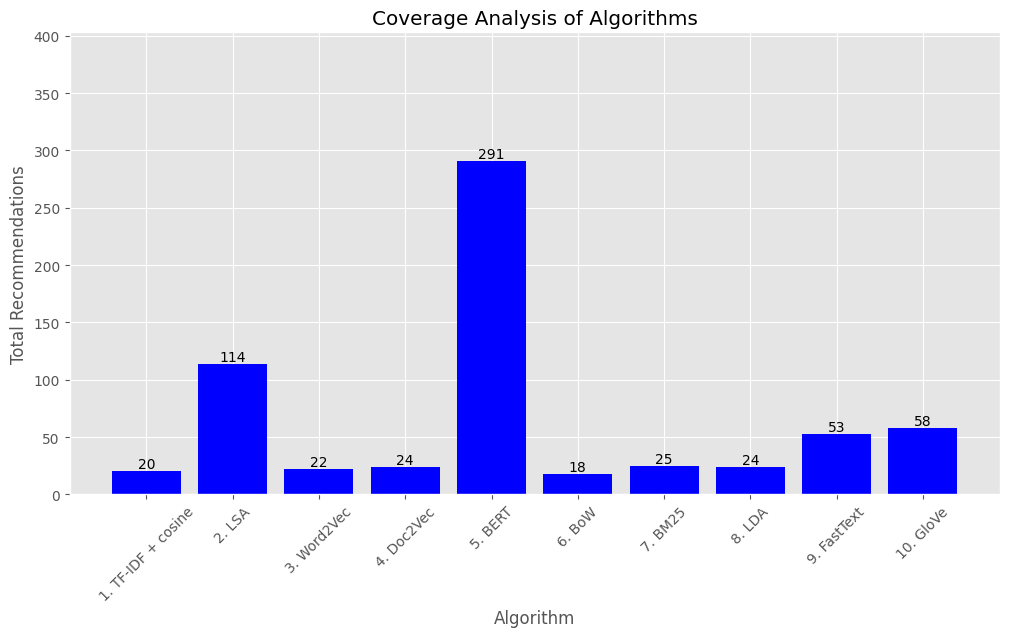

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load coverage results for plotting
df_coverage = pd.read_csv("similarity_results/summaries_all_rec_coverage.csv")
# 403
max_y = len(df_opensearch) 

# Plot coverage results
plt.figure(figsize=(12, 6))
bars = plt.bar(df_coverage["Algorithm"].unique(), df_coverage.groupby("Algorithm")["Num_of_rec"].sum(), color='blue')
plt.xlabel("Algorithm")
plt.ylabel("Total Recommendations")
plt.title("Coverage Analysis of Algorithms")
plt.xticks(rotation=45)
plt.ylim(0, max_y)

# Add exact values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height}", ha='center', va='bottom', fontsize=10)

plt.show()

### RUN 10 times - test coverage and save it

In [ ]:
import pandas as pd
import random

# SETTINGS
num_runs = 10  # Change this to how many different books you want to test
top_n = 5
all = True  # Set to True to get all recommendations for coverage analysis

# 🔹 Define different thresholds for different algorithms
thresholds = {
    "TF-IDF": 0.4,
    "LSA": 0.4,
    "Word2Vec": 0.999,
    "Doc2Vec": 0.999,
    "BERT": 0.5,
    "BoW": 0.4,
    "BM25": 0.3,
    "LDA": 0.5,
    "FastText": 0.9,
    "GloVe": 0.95
}

# Ensure the catalog has enough books
total_books = len(df_opensearch)
if num_runs > total_books:
    print(f"⚠️ Not enough books in the catalog! Reducing runs to {total_books}")
    num_runs = total_books

# Generate random book indices
random_book_indices = random.sample(range(total_books), num_runs)

# Find book titles for selected indices
random_book_titles = [df_opensearch.iloc[idx]["book_title"] for idx in random_book_indices]

# Ensure combined feature exists (Only needs to be done ONCE)
df_opensearch["combined"] = df_opensearch["book_title"] + " " + df_opensearch["summary"]
df_mtf["combined"] = df_mtf["book_title"] + " " + df_mtf["summary"]

# Use OpenSearch dataset
data = df_opensearch

# Store coverage scores
coverage_scores = []

# 🔹 Function to Print Recommendations and Store Coverage
def show_rec(algo, all_rec, book_title):
    print(f"Book Title: {book_title} - Recommendations using: {algo}")
    coverage_scores.append((algo, len(all_rec), book_title))  # Store coverage per book title
    for rec in all_rec:
        if len(rec) == 3:
            idx, rec_title, similarity = rec
            print(f"{idx}: {rec_title} (Cosine similarity: {similarity:.3f})")
        elif len(rec) == 2:
            idx, rec_title = rec
            print(f"{idx}: {rec_title}")
    print(f"Num of RECOMMENDATIONS: {len(all_rec)}\n\n")


# 🔹 LOOP OVER MULTIPLE RANDOM BOOKS
for book_title in random_book_titles:
    print(f"🔹 Testing Book Title: {book_title}\n")

    # Run all 10 algorithms with **individual thresholds**
    similarity = "cosine"
    tfidf_rec = tfidf_summary(data, book_title, top_n, similarity, thresholds["TF-IDF"], all)
    show_rec(f"1. TF-IDF + {similarity}", tfidf_rec, book_title)

    lsa_rec = lsa_summary(data, book_title, top_n, thresholds["LSA"], all)
    show_rec("2. LSA", lsa_rec, book_title)

    word2vec_model_sum = train_word2vec_summary(data)
    w2v_rec = word2vec_summary(data, book_title, top_n, word2vec_model_sum, thresholds["Word2Vec"], all)
    show_rec("3. Word2Vec", w2v_rec, book_title)

    doc2vec_model_sum = train_doc2vec_summary(data)
    d2v_rec = doc2vec_summary(data, book_title, top_n, doc2vec_model_sum, thresholds["Doc2Vec"], all)
    show_rec("4. Doc2Vec", d2v_rec, book_title)

    bert_rec = bert_summary(data, book_title, top_n, thresholds["BERT"], all)
    show_rec("5. BERT", bert_rec, book_title)

    bow_rec = bow_summary(data, book_title, top_n, thresholds["BoW"], all)
    show_rec("6. BoW", bow_rec, book_title)

    bm25_rec = bm25_summary(data, book_title, top_n, thresholds["BM25"], all)
    show_rec("7. BM25", bm25_rec, book_title)

    lda_rec = lda_summary(data, book_title, top_n, thresholds["LDA"], all)
    show_rec("8. LDA", lda_rec, book_title)

    fasttext_model = train_fasttext_summary(data)
    fasttext_rec = fasttext_summary(data, book_title, fasttext_model, top_n, thresholds["FastText"], all)
    show_rec("9. FastText", fasttext_rec, book_title)

    glove_rec = glove_summary(data, book_title, top_n, thresholds["GloVe"], all, embedding_dim=50)
    show_rec("10. GloVe", glove_rec, book_title)

    print(f"✅ DONE WITH RECOMMENDATIONS FOR BOOK: {book_title}\n")

# 🔹 Convert coverage data into DataFrame
df_coverage = pd.DataFrame(coverage_scores, columns=["algorithm", "num_recommendations", "book_title"])

# 🔹 Save the coverage results to a CSV
df_coverage.to_csv("coverage_results/algorithm_coverage_results.csv", index=False)

print("✅ Coverage results saved to 'algorithm_coverage_results.csv'")


🔹 Testing Book Title: Nicotinic Acetylcholine Receptor Signaling in Neuroprotection

Book Title: Nicotinic Acetylcholine Receptor Signaling in Neuroprotection - Recommendations using: 1. TF-IDF + cosine
313: The Poetics and Politics of Alzheimer’s Disease Life-Writing (Cosine similarity: 0.116)
173: Diseases of The Abdomen and Pelvis 2018-2021 : Diagnostic Imaging - Idkd Book (Cosine similarity: 0.081)
133: Genome Editing in Neurosciences (Cosine similarity: 0.074)
102: The Handbook of Salutogenesis (Cosine similarity: 0.057)
276: Tuberculosis in Adults and Children (Volume 2.0) (Cosine similarity: 0.056)
29: Mercury Pollution in Minamata (Cosine similarity: 0.053)
Num of RECOMMENDATIONS: 6


Book Title: Nicotinic Acetylcholine Receptor Signaling in Neuroprotection - Recommendations using: 2. LSA
133: Genome Editing in Neurosciences (Cosine similarity: 0.681)
313: The Poetics and Politics of Alzheimer’s Disease Life-Writing (Cosine similarity: 0.641)
173: Diseases of The Abdomen and Pe

### Run 10 times - Similarities(3) -> avg sim, confidence, diversity

In [ ]:
import pandas as pd
import random

# SETTINGS
num_runs = 10  # Change this to how many different books you want to test
top_n = 5
all = False  # Set to True to get all recommendations for coverage analysis

# 🔹 Define different thresholds for different algorithms
thresholds = {
    "TF-IDF": 0.4,
    "LSA": 0.4,
    "Word2Vec": 0.999,
    "Doc2Vec": 0.999,
    "BERT": 0.5,
    "BoW": 0.4,
    "BM25": 0.3,
    "LDA": 0.5,
    "FastText": 0.9,
    "GloVe": 0.95
}

# Ensure the catalog has enough books
total_books = len(df_opensearch)
if num_runs > total_books:
    print(f"⚠️ Not enough books in the catalog! Reducing runs to {total_books}")
    num_runs = total_books

# Generate random book indices
random_book_indices = random.sample(range(total_books), num_runs)

# Find book titles for selected indices
random_book_titles = [df_opensearch.iloc[idx]["book_title"] for idx in random_book_indices]

# Ensure combined feature exists (Only needs to be done ONCE)
df_opensearch["combined"] = df_opensearch["book_title"] + " " + df_opensearch["summary"]
df_mtf["combined"] = df_mtf["book_title"] + " " + df_mtf["summary"]

# Use OpenSearch dataset
data = df_opensearch

# Store coverage scores and similarities
results = []

# 🔹 Function to Print Recommendations and Store Coverage
def show_rec(algo, recommendations, book_title):
    """
    Prints recommendations and stores coverage & similarity scores.
    """
    print(f"Book Title: {book_title} - Recommendations using: {algo}")
    
    for rec in recommendations:
        if len(rec) == 3:
            idx, rec_title, similarity = rec
        elif len(rec) == 2:
            idx, rec_title = rec
            similarity = None  # Some algorithms might not provide similarity scores

        results.append({
            "algorithm": algo,
            "book_title": book_title,
            "recommended_title": rec_title,
            "similarity": similarity if similarity is not None else "N/A"
        })
        
        # Print recommendation
        if similarity is not None:
            print(f"{idx}: {rec_title} (Similarity: {similarity:.3f})")
        else:
            print(f"{idx}: {rec_title}")
    
    print(f"Num of RECOMMENDATIONS: {len(recommendations)}\n\n")

# 🔹 LOOP OVER MULTIPLE RANDOM BOOKS
for book_title in random_book_titles:
    print(f"🔹 Testing Book Title: {book_title}\n")

    # Run all 10 algorithms with **individual thresholds**
    similarity_metric = "cosine"

    tfidf_rec = tfidf_summary(data, book_title, top_n, similarity_metric, thresholds["TF-IDF"], all)
    show_rec(f"1. TF-IDF + {similarity_metric}", tfidf_rec, book_title)

    lsa_rec = lsa_summary(data, book_title, top_n, thresholds["LSA"], all)
    show_rec("2. LSA", lsa_rec, book_title)

    word2vec_model_sum = train_word2vec_summary(data)
    w2v_rec = word2vec_summary(data, book_title, top_n, word2vec_model_sum, thresholds["Word2Vec"], all)
    show_rec("3. Word2Vec", w2v_rec, book_title)

    doc2vec_model_sum = train_doc2vec_summary(data)
    d2v_rec = doc2vec_summary(data, book_title, top_n, doc2vec_model_sum, thresholds["Doc2Vec"], all)
    show_rec("4. Doc2Vec", d2v_rec, book_title)

    bert_rec = bert_summary(data, book_title, top_n, thresholds["BERT"], all)
    show_rec("5. BERT", bert_rec, book_title)

    bow_rec = bow_summary(data, book_title, top_n, thresholds["BoW"], all)
    show_rec("6. BoW", bow_rec, book_title)

    bm25_rec = bm25_summary(data, book_title, top_n, thresholds["BM25"], all)
    show_rec("7. BM25", bm25_rec, book_title)

    lda_rec = lda_summary(data, book_title, top_n, thresholds["LDA"], all)
    show_rec("8. LDA", lda_rec, book_title)

    fasttext_model = train_fasttext_summary(data)
    fasttext_rec = fasttext_summary(data, book_title, fasttext_model, top_n, thresholds["FastText"], all)
    show_rec("9. FastText", fasttext_rec, book_title)

    glove_rec = glove_summary(data, book_title, top_n, thresholds["GloVe"], all, embedding_dim=50)
    show_rec("10. GloVe", glove_rec, book_title)

    print(f"✅ DONE WITH RECOMMENDATIONS FOR BOOK: {book_title}\n")

# 🔹 Convert results into a DataFrame
df_results = pd.DataFrame(results)

# 🔹 Save the results to CSV
df_results.to_csv("similarity_results/algorithm_similarity_results.csv", index=False)

print("✅ Coverage and similarity results saved to 'algorithm_similarity_results.csv'")


🔹 Testing Book Title: Who Will Be The Next President? : a Guide To The U.S. Presidential Election System

Book Title: Who Will Be The Next President? : a Guide To The U.S. Presidential Election System - Recommendations using: 1. TF-IDF + cosine
335: Protecting The Rights of People With Autism in The Fields of Education and Employment : international, European and National Perspectives (Similarity: 0.605)
124: Contemporary Issues in Human Rights Law : Europe and Asia (Similarity: 0.354)
251: Multiculturalism and Conflict Reconciliation in the Asia-Pacific (Similarity: 0.244)
Num of RECOMMENDATIONS: 3


Book Title: Who Will Be The Next President? : a Guide To The U.S. Presidential Election System - Recommendations using: 2. LSA
335: Protecting The Rights of People With Autism in The Fields of Education and Employment : international, European and National Perspectives (Similarity: 0.872)
124: Contemporary Issues in Human Rights Law : Europe and Asia (Similarity: 0.694)
277: Vergleichswei

## Models - Saved - Paragraphs

In [ ]:
import joblib
import pickle
import time
import os
from gensim.models import Word2Vec, Doc2Vec, FastText, LdaModel

model_dir = "saved_models"
data = df_paragraphs

# TRAIN & SAVE MODELS

# TF-IDF
start_time = time.time()
tfidf_vectorizer = train_tfidf(data)
joblib.dump(tfidf_vectorizer, os.path.join(model_dir, "tfidf.pkl"))
elapsed_time = (time.time() - start_time) * 1000
print(f"1. tfidf - Time: {elapsed_time:.3f} ms | Saved")

# LSA
start_time = time.time()
lsa_vectorizer, lsa_model, lsa_matrix = train_lsa(data)
joblib.dump((lsa_vectorizer, lsa_model, lsa_matrix), os.path.join(model_dir, "lsa.pkl"))
elapsed_time = (time.time() - start_time) * 1000
print(f"2. lsa - Time: {elapsed_time:.3f} ms | Saved")

# Word2Vec
start_time = time.time()
word2vec_model = train_word2vec(data)
word2vec_model.save(os.path.join(model_dir, "word2vec.model"))
elapsed_time = (time.time() - start_time) * 1000
print(f"3. Word2Vec - Time: {elapsed_time:.3f} ms | Saved")

# TF-IDF for Word2Vec
start_time = time.time()
tfidf_vectorizer_for_w2v = train_tfidf(data)
joblib.dump(tfidf_vectorizer_for_w2v, os.path.join(model_dir, "tfidf_w2v.pkl"))
elapsed_time = (time.time() - start_time) * 1000
print(f"4. TF-IDF for Word2Vec - Time: {elapsed_time:.3f} ms | Saved")

# Doc2Vec
start_time = time.time()
doc2vec_model = train_doc2vec(data)
doc2vec_model.save(os.path.join(model_dir, "doc2vec.model"))
elapsed_time = (time.time() - start_time) * 1000
print(f"5. Doc2Vec - Time: {elapsed_time:.3f} ms | Saved")

# BERT
start_time = time.time()
bert_model = train_bert()  
pickle.dump(bert_model, open(os.path.join(model_dir, "bert.pkl"), "wb"))
elapsed_time = (time.time() - start_time) * 1000
print(f"6. BERT - Time: {elapsed_time:.3f} ms | Saved")

# BoW
start_time = time.time()
bow_vectorizer, bow_matrix = train_bow(data)
joblib.dump((bow_vectorizer, bow_matrix), os.path.join(model_dir, "bow.pkl"))
elapsed_time = (time.time() - start_time) * 1000
print(f"7. BoW - Time: {elapsed_time:.3f} ms | Saved")

# BM25
start_time = time.time()
bm25_model = train_bm25(data)
pickle.dump(bm25_model, open(os.path.join(model_dir, "bm25.pkl"), "wb"))
elapsed_time = (time.time() - start_time) * 1000
print(f"8. BM25 - Time: {elapsed_time:.3f} ms | Saved")

# LDA
start_time = time.time()
lda_dictionary, lda_corpus, lda_model = train_lda(data)
lda_model.save(os.path.join(model_dir, "lda.model"))
lda_dictionary.save(os.path.join(model_dir, "lda_dictionary.dict"))
joblib.dump(lda_corpus, os.path.join(model_dir, "lda_corpus.pkl"))
elapsed_time = (time.time() - start_time) * 1000
print(f"9. LDA - Time: {elapsed_time:.3f} ms | Saved")

# FastText
start_time = time.time()
fasttext_model = train_fasttext(data)
fasttext_model.save(os.path.join(model_dir, "fasttext.model"))
elapsed_time = (time.time() - start_time) * 1000
print(f"10. FastText - Time: {elapsed_time:.3f} ms | Saved")

# GloVe
start_time = time.time()
glove_embeddings = train_glove(data, embedding_dim=50)
pickle.dump(glove_embeddings, open(os.path.join(model_dir, "glove.pkl"), "wb"))
elapsed_time = (time.time() - start_time) * 1000
print(f"11. GloVe - Time: {elapsed_time:.3f} ms | Saved")


9. LDA - Time: 2006987.928 ms | Saved


## BENCHMARK - TEST with different settings of input
- threshold is set dynamically (0.5 * max similarity)  

- Paragraph -> Paragraph
- Page -> Page
- Page -> Paragraph
- Paragraph -> Page

- Paragraph -> Book
- Page -> Book 
- Book -> Book --- (Summaries?)

## PROGRESS BAR - TEST

In [ ]:
import pandas as pd
import random
import time
import joblib
import pickle
import psutil
from tqdm import tqdm
from gensim.models import Word2Vec, Doc2Vec, FastText, LdaModel
from multiprocessing import Process, Manager

# SETTINGS
num_runs = 10  # Number of books to test for summaries
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
all_recommendations = True
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

def track_usage(func, args, return_dict):
    """Tracks memory and CPU usage while running an algorithm."""
    process = psutil.Process()
    start_time = time.time()
    
    result = func(*args)
    elapsed_time = time.time() - start_time
    memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    cpu_usage = process.cpu_percent(interval=1)
    
    return_dict["result"] = result
    return_dict["elapsed_time"] = elapsed_time
    return_dict["memory_usage"] = memory_usage
    return_dict["cpu_usage"] = cpu_usage

def run_algorithm(algo_name, func, args):
    """Runs an algorithm with tracking and time limit."""
    with Manager() as manager:
        return_dict = manager.dict()
        p = Process(target=track_usage, args=(func, args, return_dict))
        p.start()
        p.join(timeout=max_runtime)
        
        if p.is_alive():
            p.terminate()
            print(f"⚠️ {algo_name} exceeded time limit ({max_runtime}s) and was stopped.")
            return algo_name, [], max_runtime, None, None
        
        return algo_name, return_dict["result"], return_dict["elapsed_time"], return_dict["memory_usage"], return_dict["cpu_usage"]

# Run multiple books for summaries
data = df_opensearch
random_book_indices = random.sample(range(len(data)), num_runs)
random_book_titles = [data.iloc[idx]["book_title"] for idx in random_book_indices]

summary_results = []

for book_title in tqdm(random_book_titles, desc="Processing Summaries", unit="book"):
    print(f"🔹 Testing Book: {book_title}\n")
    
    algorithms = [
        ("TF-IDF", tfidf_summary, (data, book_title, top_n, "cosine", 0.4, all_recommendations)),
        ("LSA", lsa_summary, (data, book_title, top_n, 0.4, all_recommendations)),
        ("Word2Vec", word2vec_summary, (data, book_title, top_n, train_word2vec_summary(data), 0.999, all_recommendations)),
        ("Doc2Vec", doc2vec_summary, (data, book_title, top_n, train_doc2vec_summary(data), 0.999, all_recommendations)),
        ("BERT", bert_summary, (data, book_title, top_n, 0.5, all_recommendations)),
        ("BoW", bow_summary, (data, book_title, top_n, 0.4, all_recommendations)),
        ("BM25", bm25_summary, (data, book_title, top_n, 0.3, all_recommendations)),
        ("LDA", lda_summary, (data, book_title, top_n, 0.5, all_recommendations)),
        ("FastText", fasttext_summary, (data, book_title, train_fasttext_summary(data), top_n, 0.9, all_recommendations)),
        ("GloVe", glove_summary, (data, book_title, top_n, 0.95, all_recommendations, 50))
    ]
    
    for algo_name, func, args in tqdm(algorithms, desc=f"Running Algorithms for {book_title}", unit="algorithm"):
        algo_name, recommendations, elapsed_time, memory_usage, cpu_usage = run_algorithm(algo_name, func, args)
        summary_results.append({
            "algorithm": algo_name,
            "book_title": book_title,
            "num_recommendations": len(recommendations),
            "elapsed_time": elapsed_time,
            "memory_usage": memory_usage,
            "cpu_usage": cpu_usage
        })

# Save summary recommendations results
summary_df = pd.DataFrame(summary_results)
summary_df.to_csv("results/summary_algorithm_results.csv", index=False)

# Run a single book for paragraph testing
paragraph_data = df_paragraphs
data_input_title = paragraph_data.iloc[input_book_index]["book_title"]
paragraph_results = []

tqdm.write(f"Processing Paragraph for {data_input_title}")

algorithms = [
    ("TF-IDF", tfidf_recommendations, (paragraph_data, input_book_index, input_paragraph_index, tfidf_vectorizer)),
    ("LSA", lsa_recommendations, (paragraph_data, input_book_index, input_paragraph_index, lsa_vectorizer, lsa_model, lsa_matrix)),
    ("Word2Vec", word2vec_recommendations, (paragraph_data, input_book_index, input_paragraph_index, word2vec_model, tfidf_vectorizer_for_w2v)),
    ("Doc2Vec", doc2vec_recommendations, (paragraph_data, input_book_index, input_paragraph_index, doc2vec_model)),
    ("BERT", bert_recommendations, (paragraph_data, input_book_index, input_paragraph_index, bert_model)),
    ("BoW", bow_recommendations, (paragraph_data, input_book_index, input_paragraph_index, bow_vectorizer, bow_matrix)),
    ("BM25", bm25_recommendations, (paragraph_data, input_book_index, input_paragraph_index, bm25_model)),
    ("LDA", lda_recommendations, (paragraph_data, input_book_index, input_paragraph_index, lda_dictionary, lda_corpus, lda_model)),
    ("FastText", fasttext_recommendations, (paragraph_data, input_book_index, input_paragraph_index, fasttext_model)),
    ("GloVe", glove_recommendations, (paragraph_data, input_book_index, input_paragraph_index, glove_embeddings, 50))
]

for algo_name, func, args in tqdm(algorithms, desc=f"Running Algorithms for Paragraph of {data_input_title}", unit="algorithm"):
    algo_name, recommendations, elapsed_time, memory_usage, cpu_usage = run_algorithm(algo_name, func, args)
    paragraph_results.append({
        "algorithm": algo_name,
        "book_title": data_input_title,
        "num_recommendations": len(recommendations),
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage
    })

# Save paragraph recommendations results
paragraph_df = pd.DataFrame(paragraph_results)
paragraph_df.to_csv("similarity_results/paragraph_algorithm_results.csv", index=False)

print("✅ All processing complete! Results saved.")


Processing Summaries:   0%|          | 0/10 [00:00<?, ?book/s]

🔹 Testing Book: Fading Foundations : Probability and The Regress Problem



In [ ]:
import pandas as pd
import time
import joblib
import pickle
import psutil
from tqdm import tqdm
from gensim.models import Word2Vec, Doc2Vec, FastText, LdaModel
from multiprocessing import Process, Manager

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load Models
tfidf_vectorizer = joblib.load("saved_models/tfidf.pkl")
lsa_vectorizer, lsa_model, lsa_matrix = joblib.load("saved_models/lsa.pkl")
word2vec_model = Word2Vec.load("saved_models/word2vec.model")
tfidf_vectorizer_for_w2v = joblib.load("saved_models/tfidf_w2v.pkl")
doc2vec_model = Doc2Vec.load("saved_models/doc2vec.model")
bert_model = pickle.load(open("saved_models/bert.pkl", "rb"))
bow_vectorizer, bow_matrix = joblib.load("saved_models/bow.pkl")
bm25_model = pickle.load(open("saved_models/bm25.pkl", "rb"))
lda_model = LdaModel.load("saved_models/lda.model")
fasttext_model = FastText.load("saved_models/fasttext.model")
glove_embeddings = pickle.load(open("saved_models/glove.pkl", "rb"))

print("Models loaded")

def track_usage(func, args, return_dict):
    """Tracks memory and CPU usage while running an algorithm."""
    process = psutil.Process()
    start_time = time.time()
    
    result = func(*args)
    elapsed_time = time.time() - start_time
    memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    cpu_usage = process.cpu_percent(interval=1)
    
    return_dict["result"] = result
    return_dict["elapsed_time"] = elapsed_time
    return_dict["memory_usage"] = memory_usage
    return_dict["cpu_usage"] = cpu_usage

def run_algorithm(algo_name, func, args):
    """Runs an algorithm with tracking and time limit."""
    with Manager() as manager:
        return_dict = manager.dict()
        p = Process(target=track_usage, args=(func, args, return_dict))
        p.start()
        p.join(timeout=max_runtime)
        
        if p.is_alive():
            p.terminate()
            print(f"⚠️ {algo_name} exceeded time limit ({max_runtime}s) and was stopped.")
            return algo_name, [], max_runtime, None, None
        
        return algo_name, return_dict["result"], return_dict["elapsed_time"], return_dict["memory_usage"], return_dict["cpu_usage"]

# Run a single book for paragraph testing
paragraph_data = df_paragraphs
data_input_title = paragraph_data.iloc[input_book_index]["book_title"]
paragraph_results = []

tqdm.write(f"Processing Paragraph for {data_input_title}")

algorithms = [
    ("TF-IDF", tfidf_recommendations, (paragraph_data, input_book_index, input_paragraph_index, tfidf_vectorizer)),
    ("LSA", lsa_recommendations, (paragraph_data, input_book_index, input_paragraph_index, lsa_vectorizer, lsa_model, lsa_matrix)),
    ("Word2Vec", word2vec_recommendations, (paragraph_data, input_book_index, input_paragraph_index, word2vec_model, tfidf_vectorizer_for_w2v)),
    ("Doc2Vec", doc2vec_recommendations, (paragraph_data, input_book_index, input_paragraph_index, doc2vec_model)),
    ("BERT", bert_recommendations, (paragraph_data, input_book_index, input_paragraph_index, bert_model)),
    ("BoW", bow_recommendations, (paragraph_data, input_book_index, input_paragraph_index, bow_vectorizer, bow_matrix)),
    ("BM25", bm25_recommendations, (paragraph_data, input_book_index, input_paragraph_index, bm25_model)),
    ("LDA", lda_recommendations, (paragraph_data, input_book_index, input_paragraph_index, lda_model)),
    ("FastText", fasttext_recommendations, (paragraph_data, input_book_index, input_paragraph_index, fasttext_model)),
    ("GloVe", glove_recommendations, (paragraph_data, input_book_index, input_paragraph_index, glove_embeddings, 50))
]

for algo_name, func, args in tqdm(algorithms, desc=f"Running Algorithms for Paragraph of {data_input_title}", unit="algorithm"):
    algo_name, recommendations, elapsed_time, memory_usage, cpu_usage = run_algorithm(algo_name, func, args)
    
    tqdm.write(f"{algo_name} completed in {elapsed_time:.2f} seconds, Memory Usage: {memory_usage:.2f} MB, CPU Usage: {cpu_usage:.2f}%")
    
    paragraph_results.append({
        "algorithm": algo_name,
        "book_title": data_input_title,
        "num_recommendations": len(recommendations),
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage
    })

# Save paragraph recommendations results
paragraph_df = pd.DataFrame(paragraph_results)
paragraph_df.to_csv("similarity_results/paragraph_algorithm_results.csv", index=False)

print("✅ Paragraph processing complete! Results saved.")


Processing Paragraph for Library and Information Sciences : Trends and Research


Running Algorithms for Paragraph of Library and Information Sciences : Trends and Research:   0%|          | 0/10 [00:00<?, ?algorithm/s]

: 

: 

In [ ]:
import pandas as pd
import time
import joblib
import pickle
import psutil
from tqdm import tqdm
from gensim.models import Word2Vec, Doc2Vec, FastText, LdaModel
from multiprocessing import Process, Manager

# SETTINGS
input_book_index = 0
input_paragraph_index = 7

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load Models
# tfidf_vectorizer = joblib.load("saved_models/tfidf.pkl")
# lsa_vectorizer, lsa_model, lsa_matrix = joblib.load("saved_models/lsa.pkl")
# word2vec_model = Word2Vec.load("saved_models/word2vec.model")
# tfidf_vectorizer_for_w2v = joblib.load("saved_models/tfidf_w2v.pkl")
# doc2vec_model = Doc2Vec.load("saved_models/doc2vec.model")
# bert_model = pickle.load(open("saved_models/bert.pkl", "rb"))
# bow_vectorizer, bow_matrix = joblib.load("saved_models/bow.pkl")
# bm25_model = pickle.load(open("saved_models/bm25.pkl", "rb"))
# lda_model = LdaModel.load("saved_models/lda.model")
# fasttext_model = FastText.load("saved_models/fasttext.model")
# glove_embeddings = pickle.load(open("saved_models/glove.pkl", "rb"))

# print("Models loaded")

def track_usage(func, args, return_dict):
    """Tracks memory and CPU usage while running an algorithm and updates tqdm."""
    process = psutil.Process()
    start_time = time.time()

    # Initialize tqdm progress bar inside the function
    with tqdm(total=top_n, desc=f"Running {func.__name__}", unit="iteration") as pbar:
        result = func(*args)
        for _ in range(top_n):  # Simulate iteration if not available in the function
            time.sleep(0.2)  # Simulated progress (replace with actual updates)
            pbar.update(1)  # Update tqdm for every iteration

    elapsed_time = time.time() - start_time
    memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    cpu_usage = process.cpu_percent(interval=1)

    return_dict["result"] = result
    return_dict["elapsed_time"] = elapsed_time
    return_dict["memory_usage"] = memory_usage
    return_dict["cpu_usage"] = cpu_usage

def run_algorithm(algo_name, func, args):
    """Runs an algorithm with tracking and time limit."""
    with Manager() as manager:
        return_dict = manager.dict()
        p = Process(target=track_usage, args=(func, args, return_dict))
        p.start()
        p.join(timeout=max_runtime)

        if p.is_alive():
            p.terminate()
            print(f"⚠️ {algo_name} exceeded time limit ({max_runtime}s) and was stopped.")
            return algo_name, [], max_runtime, None, None

        return algo_name, return_dict["result"], return_dict["elapsed_time"], return_dict["memory_usage"], return_dict["cpu_usage"]

# Run a single book for paragraph testing
paragraph_data = df_paragraphs
data_input_title = paragraph_data.iloc[input_book_index]["book_title"]
paragraph_results = []

tqdm.write(f"Processing Paragraph for {data_input_title}")

algorithms = [
    ("TF-IDF", tfidf_recommendations, (paragraph_data, input_book_index, input_paragraph_index, tfidf_vectorizer)),
    ("LSA", lsa_recommendations, (paragraph_data, input_book_index, input_paragraph_index, lsa_vectorizer, lsa_model, lsa_matrix)),
    ("Word2Vec", word2vec_recommendations, (paragraph_data, input_book_index, input_paragraph_index, word2vec_model, tfidf_vectorizer_for_w2v)),
    ("Doc2Vec", doc2vec_recommendations, (paragraph_data, input_book_index, input_paragraph_index, doc2vec_model)),
    ("BERT", bert_recommendations, (paragraph_data, input_book_index, input_paragraph_index, bert_model)),
    ("BoW", bow_recommendations, (paragraph_data, input_book_index, input_paragraph_index, bow_vectorizer, bow_matrix)),
    ("BM25", bm25_recommendations, (paragraph_data, input_book_index, input_paragraph_index, bm25_model)),
    ("LDA", lda_recommendations, (paragraph_data, input_book_index, input_paragraph_index, lda_model)),
    ("FastText", fasttext_recommendations, (paragraph_data, input_book_index, input_paragraph_index, fasttext_model)),
    ("GloVe", glove_recommendations, (paragraph_data, input_book_index, input_paragraph_index, glove_embeddings, 50))
]

for algo_name, func, args in algorithms:
    with tqdm(total=1, desc=f"Running {algo_name}", unit="algorithm") as pbar:
        algo_name, recommendations, elapsed_time, memory_usage, cpu_usage = run_algorithm(algo_name, func, args)
        pbar.update(1)

    tqdm.write(f"{algo_name} completed in {elapsed_time:.2f} seconds, Memory Usage: {memory_usage:.2f} MB, CPU Usage: {cpu_usage:.2f}%")
    paragraph_results.append({
        "algorithm": algo_name,
        "book_title": data_input_title,
        "num_recommendations": len(recommendations),
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage
    })

# Save paragraph recommendations results
paragraph_df = pd.DataFrame(paragraph_results)
paragraph_df.to_csv("results/paragraph_algorithm_results.csv", index=False)

print("✅ Paragraph processing complete! Results saved.")


### testing that failed

In [ ]:
import time
import joblib
import pickle
from gensim.models import Word2Vec, Doc2Vec, FastText, LdaModel

# INPUT SETTINGS
input_book_index = 0
input_paragraph_index = 7
input_book_title = df_paragraphs.iloc[input_book_index]["book_title"]

print(f"INPUT PARAGRAPH FROM: {input_book_title}\n(Book Index: {input_book_index}, Paragraph Index: {input_paragraph_index})")
print(df_paragraphs[df_paragraphs["book_title"] == input_book_title].iloc[input_paragraph_index]["text"], "\n")

exclude_input_book = True
top_n = 5
all = False
threshold = 0.5
times_of_algos = []
results = []

# df_paraghraphs, df_pages, df_sentences
# df_summaries (openresearch + mtf) needs to be handled differently
data = df_paragraphs
recommendations_list = []

def show_rec(algo, all_rec, elapsed_time):
    print(f"Recommendations using: {algo}")
    for book_idx, para_idx, text, rec_title, similarity in all_rec:
        print(f"Book {book_idx}, Paragraph {para_idx} | {rec_title} | {text}... | Similarity: {similarity:.3f}")

        # Append to list for saving later
        recommendations_list.append({
            "algorithm": algo,
            "book_index": book_idx,
            "paragraph_index": para_idx,
            "recommended_book": rec_title,
            "recommended_text": text,
            "similarity_score": similarity,
            "elapsed_time_ms": round(elapsed_time, 3)
        })
    
    print(f"Num of RECOMMENDATIONS: {len(all_rec)}\nTime: {elapsed_time:.3f} ms\n\n")


# Load Models

# tfidf_vectorizer = joblib.load("saved_models/tfidf.pkl")
# lsa_vectorizer, lsa_model, lsa_matrix = joblib.load("saved_models/lsa.pkl")
# word2vec_model = Word2Vec.load("saved_models/word2vec.model")
# tfidf_vectorizer_for_w2v = joblib.load("saved_models/tfidf_w2v.pkl")
# doc2vec_model = Doc2Vec.load("saved_models/doc2vec.model")
# bert_model = pickle.load(open("saved_models/bert.pkl", "rb"))
# bow_vectorizer, bow_matrix = joblib.load("saved_models/bow.pkl")
# bm25_model = pickle.load(open("saved_models/bm25.pkl", "rb"))
# lda_model = LdaModel.load("saved_models/lda.model")
# fasttext_model = FastText.load("saved_models/fasttext.model")
# glove_embeddings = pickle.load(open("saved_models/glove.pkl", "rb"))

print("All models loaded")


# 10 ALGOS
algorithms = [
    ("TF-IDF", tfidf_recommendations, (data, input_book_index, input_paragraph_index, tfidf_vectorizer)),
    ("LSA", lsa_recommendations, (data, input_book_index, input_paragraph_index, lsa_vectorizer, lsa_model, lsa_matrix)),
    ("Word2Vec", word2vec_recommendations, (data, input_book_index, input_paragraph_index, word2vec_model, tfidf_vectorizer_for_w2v)),
    ("Doc2Vec", doc2vec_recommendations, (data, input_book_index, input_paragraph_index, doc2vec_model)),
    ("BERT", bert_recommendations, (data, input_book_index, input_paragraph_index, bert_model)),
    ("BoW", bow_recommendations, (data, input_book_index, input_paragraph_index, bow_vectorizer, bow_matrix)),
    ("BM25", bm25_recommendations, (data, input_book_index, input_paragraph_index, bm25_model)),
    ("LDA", lda_recommendations, (data, input_book_index, input_paragraph_index, lda_dictionary, lda_corpus, lda_model)),
    ("FastText", fasttext_recommendations, (data, input_book_index, input_paragraph_index, fasttext_model)),
    ("GloVe", glove_recommendations, (data, input_book_index, input_paragraph_index, glove_embeddings, 50))
]

for algo_name, func, args in algorithms:
    start_time = time.time()
    recommendations = func(*args, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)
    elapsed_time = (time.time() - start_time) * 1000
    show_rec(algo_name, recommendations, elapsed_time)
    results.append((algo_name, recommendations, elapsed_time))



df_recommendations = pd.DataFrame(recommendations_list)

# Save recommendations to CSV
df_recommendations.to_csv("similarity_results/paragraph_sim_results.csv", index=False)


INPUT PARAGRAPH FROM: Library and Information Sciences : Trends and Research
(Book Index: 0, Paragraph Index: 7)
Visual Data Mining in a Q&A Based Social Media Website .......................... 41 Jin Zhang and Yiming Zhao Information Seeking Behaviour and Usage on a Multi-media Platform: Case Study Europeana ..................................................................... 57 David Nicholas and David Clark Exploratory Search: A Critical Analysis of the Theoretical Foundations, System Features, and Research Trends .................................... 79 Tingting Jiang 

All models loaded
Recommendations using: TF-IDF
Book 332, Paragraph 217 | Media Resistance : Protest, Dislike, Abstention | the standards of their profession, and disbelief as to how far media will go in their quest for audiences and proﬁt. However, media resistance is not just about disappointment, but also about hope. In the ﬁctional as well as non-ﬁctional works discussed in this book, there is not so much hope 

KeyboardInterrupt: 

### older run

In [ ]:
# # 1. TF-IDF
# start_time = time.time()
# similarity = "cosine"
# # tfidf_rec = tfidf_recommendations(data, book_title, top_n, similarity, threshold, all)
# # tfidf_rec = tfidf_recommendations(df_paragraphs, input_book_index, input_paragraph_index, top_n, threshold, all)
# tfidf_rec = tfidf_recommendations(df_paragraphs, input_book_index, input_paragraph_index, top_n, threshold, exclude_input_book)
# elapsed_time = (time.time() - start_time) * 1000
# # show_rec(f"1. TF-IDF + {similarity}", tfidf_rec, elapsed_time)
# show_rec("TF-IDF", tfidf_rec, elapsed_time)

# # ALL OTHER ALGOS USE COSINE NOW (except BM25)
# # 2. LSA
# start_time = time.time()
# # lsa_rec = lsa_recommendations(data, book_title, top_n, threshold, all)
# # lsa_rec = lsa_recommendations(df_paragraphs, input_book_index, input_paragraph_index, top_n, threshold, all)
# lsa_rec = lsa_recommendations(df_paragraphs, input_book_index, input_paragraph_index, top_n, threshold, exclude_input_book)
# elapsed_time = (time.time() - start_time) * 1000
# # show_rec("2. LSA", lsa_rec, elapsed_time)
# show_rec("LSA", lsa_rec, elapsed_time)


# # 3. Word2Vec
# # Generate Word2Vec model
# start_time = time.time()
# word2vec_model = train_word2vec(data)
# tfidf_vectorizer = train_tfidf(data)
# w2v_rec = recommend_word2vec(data, book_title, top_n, word2vec_model, tfidf_vectorizer, threshold, all)
# elapsed_time = (time.time() - start_time) * 1000
# show_rec("3. Word2Vec", w2v_rec, elapsed_time)

# # 4. Doc2Vec
# # Generate Doc2Vec model
# start_time = time.time()
# doc2vec_model = train_doc2vec(data)
# d2v_rec = recommend_doc2vec(data, book_title, top_n, doc2vec_model, threshold, all)
# elapsed_time = (time.time() - start_time) * 1000
# show_rec("4. Doc2Vec", d2v_rec, elapsed_time)

# # # 5. BERT
# start_time = time.time()
# bert_rec = recommend_bert(data, book_title, top_n, threshold, all)
# elapsed_time = (time.time() - start_time) * 1000
# show_rec("5. BERT", bert_rec, elapsed_time)

# # # 6. BoW
# start_time = time.time()
# bow_rec = recommend_bow(data, book_title, top_n, threshold, all)
# elapsed_time = (time.time() - start_time) * 1000
# show_rec("6. BoW", bow_rec, elapsed_time)

# # # 7. BM25
# start_time = time.time()
# bm25_rec = recommend_bm25(data, book_title, top_n, threshold, all)
# elapsed_time = (time.time() - start_time) * 1000
# show_rec("7. BM25", bm25_rec, elapsed_time)

# # 8. LDA
# start_time = time.time()
# lda_rec = lda_recommend(data, book_title, top_n, threshold, all)
# elapsed_time = (time.time() - start_time) * 1000
# show_rec("8. LDA", lda_rec, elapsed_time)

# # 9. FASTTEXT
# start_time = time.time()
# fasttext_rec = fasttext_recommend(data, book_title, top_n, threshold, all)
# elapsed_time = (time.time() - start_time) * 1000
# show_rec("9. FastText", fasttext_rec, elapsed_time)

# # # 10. GloVe ---- NEEDS SOME FINE TUNING MAYBE
# start_time = time.time()
# glove_rec = glove_recommend(data, book_title, top_n, threshold, all, embedding_dim=50)
# elapsed_time = (time.time() - start_time) * 1000
# show_rec("10. GloVe", glove_rec, elapsed_time)


### - also measure memory and cpu and save results of 1 input books test - FAILED

In [ ]:
# pip install memory-profiler psutil

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import time
import psutil
from memory_profiler import memory_usage
import pandas as pd

book_title = "Uses of Technology in Upper Secondary Mathematics Education"
print(f"BOOK TITLE: {book_title}\n")
top_n = 5
all = False
threshold = 0.5
results = []

# COMBINE FEATURES
df_pages['combined'] = df_pages['book_title'] + " " + df_pages["text"]
data = df_pages

# Check if the book title exists in the data
if book_title not in df_pages['book_title'].values:
    print(f"Book '{book_title}' was not found!")

# Helper function to measure memory usage during a function call
def measure_memory_and_run(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)

    mem_usage, result = memory_usage(wrapped, retval=True, interval=0.1)
    return max(mem_usage), result

# PRINT ALL RECOMMENDATIONS
def show_rec(algo, all_rec, elapsed_time, memory_used, cpu_used):
    print(f"Recommendations using: {algo}")
    for rec in all_rec:
        if len(rec) == 3:
            idx, rec_title, similarity = rec
            print(f"{idx}: (Cos.Sim.: {similarity}) Title: {rec_title}")
        elif len(rec) == 2:
            idx, rec_title = rec
            print(f"{idx}: {rec_title}")
    print(f"Num of RECOMMENDATIONS: {len(all_rec)}\nTime: {elapsed_time:.3f} ms\nMemory: {memory_used:.3f} MB\nCPU: {cpu_used:.3f}%\n\n")

# Function to save results for each algorithm
def save_results(algorithm, recommendations, elapsed_time, memory_used, cpu_used):
    results.append({
        "algorithm": algorithm,
        "book_title": book_title,
        "recommendations": recommendations,
        "num_recommendations": len(recommendations),
        "time_ms": elapsed_time,
        "memory_mb": memory_used,
        "cpu_percent": cpu_used
    })

# ALGOS
process = psutil.Process()

# 1. TF-IDF
start_time = time.time()
cpu_before = process.cpu_percent(interval=None)
memory_used, tfidf_rec = measure_memory_and_run(tfidf_recommendations, data, book_title, top_n, "cosine", threshold, all)
elapsed_time = (time.time() - start_time) * 1000
cpu_used = process.cpu_percent(interval=None) - cpu_before
tfidf_rec_titles = [rec[1] for rec in tfidf_rec]
show_rec("1. TF-IDF + cosine", tfidf_rec, elapsed_time, memory_used, cpu_used)
save_results("TF-IDF", tfidf_rec_titles, elapsed_time, memory_used, cpu_used)

# 2. LSA
start_time = time.time()
cpu_before = process.cpu_percent(interval=None)
memory_used, lsa_rec = measure_memory_and_run(lsa_recommendations, data, book_title, top_n, threshold, all)
elapsed_time = (time.time() - start_time) * 1000
cpu_used = process.cpu_percent(interval=None) - cpu_before
lsa_rec_titles = [rec[1] for rec in lsa_rec]
show_rec("2. LSA", lsa_rec, elapsed_time, memory_used, cpu_used)
save_results("LSA", lsa_rec_titles, elapsed_time, memory_used, cpu_used)

# 3. Word2Vec
start_time = time.time()
cpu_before = process.cpu_percent(interval=None)

memory_trainw2v, word2vec_model = measure_memory_and_run(train_word2vec, data)
memory_tf_w2v, tfidf_vectorizer = measure_memory_and_run(train_tfidf, data)
memory_recommendw2v, w2v_rec = measure_memory_and_run(recommend_word2vec, data, book_title, top_n, word2vec_model, tfidf_vectorizer, threshold, all)

total_memory = memory_trainw2v + memory_tf_w2v + memory_recommendw2v

elapsed_time = (time.time() - start_time) * 1000
cpu_used = process.cpu_percent(interval=None) - cpu_before
w2v_rec_titles = [rec[1] for rec in w2v_rec]
show_rec("3. Word2Vec", w2v_rec, elapsed_time, total_memory, cpu_used)
save_results("Word2Vec", w2v_rec_titles, elapsed_time, total_memory, cpu_used)

# 4. Doc2Vec
start_time = time.time()
cpu_before = process.cpu_percent(interval=None)
memory_traind2v, doc2vec_model = measure_memory_and_run(train_doc2vec, data)
memory_recommend_d2v, d2v_rec = measure_memory_and_run(recommend_doc2vec, data, book_title, top_n, doc2vec_model, threshold, all)
total_memory = memory_traind2v + memory_recommend_d2v
elapsed_time = (time.time() - start_time) * 1000
cpu_used = process.cpu_percent(interval=None) - cpu_before
d2v_rec_titles = [rec[1] for rec in d2v_rec]
show_rec("4. Doc2Vec", d2v_rec, elapsed_time, total_memory, cpu_used)
save_results("Doc2Vec", d2v_rec_titles, elapsed_time, total_memory, cpu_used)

# 5. BERT
start_time = time.time()
cpu_before = process.cpu_percent(interval=None)
memory_used, bert_rec = measure_memory_and_run(recommend_bert, data, book_title, top_n, threshold, all)
elapsed_time = (time.time() - start_time) * 1000
cpu_used = process.cpu_percent(interval=None) - cpu_before
bert_rec_titles = [rec[1] for rec in bert_rec]
show_rec("5. BERT", bert_rec, elapsed_time, memory_used, cpu_used)
save_results("BERT", bert_rec_titles, elapsed_time, memory_used, cpu_used)

# 6. BoW
start_time = time.time()
cpu_before = process.cpu_percent(interval=None)
memory_used, bow_rec = measure_memory_and_run(recommend_bow, data, book_title, top_n, threshold, all)
elapsed_time = (time.time() - start_time) * 1000
cpu_used = process.cpu_percent(interval=None) - cpu_before
bow_rec_titles = [rec[1] for rec in bow_rec]
show_rec("6. BoW", bow_rec, elapsed_time, memory_used, cpu_used)
save_results("BoW", bow_rec_titles, elapsed_time, memory_used, cpu_used)

# 7. BM25
start_time = time.time()
cpu_before = process.cpu_percent(interval=None)
memory_used, bm25_rec = measure_memory_and_run(recommend_bm25, data, book_title, top_n, threshold, all)
elapsed_time = (time.time() - start_time) * 1000
cpu_used = process.cpu_percent(interval=None) - cpu_before
bm25_rec_titles = [rec[1] for rec in bm25_rec]
show_rec("7. BM25", bm25_rec, elapsed_time, memory_used, cpu_used)
save_results("BM25", bm25_rec_titles, elapsed_time, memory_used, cpu_used)

# 8. LDA
# start_time = time.time()
# cpu_before = process.cpu_percent(interval=None)
# memory_used, lda_rec = measure_memory_and_run(recommend_bm25, data, book_title, top_n, threshold, all)
# elapsed_time = (time.time() - start_time) * 1000
# cpu_used = process.cpu_percent(interval=None) - cpu_before
# lda_rec_titles = [rec[1] for rec in lda_rec]
# show_rec("7. BM25", lda_rec, elapsed_time, memory_used, cpu_used)
# save_results("BM25", lda_rec_titles, elapsed_time, memory_used, cpu_used)


# 9. FastText
start_time = time.time()
cpu_before = process.cpu_percent(interval=None)
memory_used, fasttext_rec = measure_memory_and_run(fasttext_recommend, data, book_title, top_n, threshold, all)
elapsed_time = (time.time() - start_time) * 1000
cpu_used = process.cpu_percent(interval=None) - cpu_before
fasttext_rec_titles = [rec[1] for rec in fasttext_rec]
show_rec("9. FastText", fasttext_rec, elapsed_time, memory_used, cpu_used)
save_results("FastText", fasttext_rec_titles, elapsed_time, memory_used, cpu_used)

# 10. GloVe
start_time = time.time()
cpu_before = process.cpu_percent(interval=None)
memory_used, glove_rec = measure_memory_and_run(glove_recommend, data, book_title, top_n, threshold, all, embedding_dim=50)
elapsed_time = (time.time() - start_time) * 1000
cpu_used = process.cpu_percent(interval=None) - cpu_before
glove_rec_titles = [rec[1] for rec in glove_rec]
show_rec("10. GloVe", glove_rec, elapsed_time, memory_used, cpu_used)
save_results("GloVe", glove_rec_titles, elapsed_time, memory_used, cpu_used)

# Save all results to a DataFrame
results_1_input_df = pd.DataFrame(results)
# Save to CSV
csv_file_name = "test_" + book_title.replace(" ", "_") + ".csv"
results_1_input_df.to_csv(f"test_results/{csv_file_name}", index=False)
print(f"Results saved to {csv_file_name}")


BOOK TITLE: Uses of Technology in Upper Secondary Mathematics Education



MemoryError: Unable to allocate 78.7 GiB for an array with shape (102779, 102779) and data type float64

## TEST - all books top 5 recommendations for all 10 algorithnms saved to .csv - FAILED - just summaries

In [ ]:
import pandas as pd

all_results = []
top_n = 5
all = False
threshold = 0.5


def save_recommendations(algorithm, book_title, recommendations):
    all_results.append({
        "algorithm": algorithm,
        "book_title": book_title,
        "recommendations": recommendations
    })

# Function to process all books in the dataset
def generate_recommendations(df, top_n):
    for idx, book_title in enumerate(df['book_title'].unique(), start=1):
        print(f"Processing recs: {idx} {book_title}")

        # Check if the book title exists
        if book_title not in df['book_title'].values:
            print(f"Book '{book_title}' was not found!")
            continue

        # 1. TF-IDF
        similarity="cosine"
        tfidf_rec = tfidf_recommendations(df, book_title, top_n, similarity, threshold, all)
        tfidf_rec_titles = [rec[1] for rec in tfidf_rec]  # Extract recommended titles
        save_recommendations("TF-IDF", book_title, tfidf_rec_titles)

        # 2. LSA
        lsa_rec = lsa_recommendations(df, book_title, top_n, threshold, all)
        lsa_rec_titles = [rec[1] for rec in lsa_rec]
        save_recommendations("LSA", book_title, lsa_rec_titles)

        # 3. Word2Vec
        word2vec_model = train_word2vec(df)
        w2v_rec = recommend_word2vec(df, book_title, top_n, word2vec_model, threshold, all)
        w2v_rec_titles = [rec[1] for rec in w2v_rec]
        save_recommendations("Word2Vec", book_title, w2v_rec_titles)

        # 4. Doc2Vec
        doc2vec_model = train_doc2vec(df)
        d2v_rec = recommend_doc2vec(df, book_title, top_n, doc2vec_model, threshold, all)
        d2v_rec_titles = [rec[1] for rec in d2v_rec]
        save_recommendations("Doc2Vec", book_title, d2v_rec_titles)

        # 5. BERT
        bert_rec = recommend_bert(df, book_title, top_n, threshold, all)
        bert_rec_titles = [rec[1] for rec in bert_rec]
        save_recommendations("BERT", book_title, bert_rec_titles)

        # 6. BoW
        bow_rec = recommend_bow(df, book_title, top_n, threshold, all)
        bow_rec_titles = [rec[1] for rec in bow_rec]
        save_recommendations("BoW", book_title, bow_rec_titles)

        # 7. BM25
        bm25_rec = recommend_bm25(df, book_title, top_n, threshold, all)
        bm25_rec_titles = [rec[1] for rec in bm25_rec]
        save_recommendations("BM25", book_title, bm25_rec_titles)

        # 8. LDA
        lda_rec = lda_recommend(df, book_title, top_n, threshold, all)
        lda_rec_titles = [rec[1] for rec in lda_rec]
        save_recommendations("LDA", book_title, lda_rec_titles)

        # 9. FastText
        fasttext_rec = fasttext_recommend(df, book_title, top_n, threshold, all)
        fasttext_rec_titles = [rec[1] for rec in fasttext_rec]
        save_recommendations("FastText", book_title, fasttext_rec_titles)

        # 10. GloVe
        glove_rec = glove_recommend(df, book_title, top_n, threshold, all, embedding_dim=50)
        glove_rec_titles = [rec[1] for rec in glove_rec]
        save_recommendations("GloVe", book_title, glove_rec_titles)


# Generate recommendations for all books in the dataset
generate_recommendations(df_pages, top_n)

# Convert the results to a DataFrame
results_df = pd.DataFrame(all_results)

# Save the results to a CSV file
results_df.to_csv("test_results/all_recommendations_2.csv", index=False)



Processing recs: 1 Library and Information Sciences : Trends and Research
Processing recs: 2 Prozessintelligenz : Business-Process-Management-Studie – Status Quo Und Erfolgsmuster
Processing recs: 3 Promoting Active Citizenship : Markets and Choice in Scandinavian Welfare
Processing recs: 4 Instructional Scaffolding in STEM Education : Strategies and Efficacy Evidence
Processing recs: 5 The Early Years : Child Well-Being and The Role of Public Policy
Processing recs: 6 China’s Gas Development Strategies
Processing recs: 7 Teaching Tolerance in a Globalized World
Processing recs: 8 Improving Psychiatric Care For Older People : Barbara Robb’S Campaign 1965-1975
Processing recs: 9 Melting Hadrons, Boiling Quarks: From Hagedorn Temperature to Ultra-Relativistic Heavy-Ion Collisions at CERN: With a Tribute to Rolf Hagedorn
Processing recs: 10 One Hundred Years of Chemical Warfare : Research, Deployment, Consequences
Processing recs: 11 Governance For Drought Resilience : Land and Water Drou

In [ ]:
# Add a column for the number of recommendations
results_df['num_recommendations'] = results_df['recommendations'].apply(len)

# Display the number of recommendations for each row
for idx, row in results_df.iterrows():
    print(f"{row['algorithm']}, Book: {row['book_title']}, Num Recommendations: {row['num_recommendations']}")


TF-IDF, Book: Library and Information Sciences : Trends and Research, Num Recommendations: 5
LSA, Book: Library and Information Sciences : Trends and Research, Num Recommendations: 5
Word2Vec, Book: Library and Information Sciences : Trends and Research, Num Recommendations: 5
Doc2Vec, Book: Library and Information Sciences : Trends and Research, Num Recommendations: 5
BERT, Book: Library and Information Sciences : Trends and Research, Num Recommendations: 5
BoW, Book: Library and Information Sciences : Trends and Research, Num Recommendations: 5
BM25, Book: Library and Information Sciences : Trends and Research, Num Recommendations: 5
LDA, Book: Library and Information Sciences : Trends and Research, Num Recommendations: 5
FastText, Book: Library and Information Sciences : Trends and Research, Num Recommendations: 5
GloVe, Book: Library and Information Sciences : Trends and Research, Num Recommendations: 5
TF-IDF, Book: Prozessintelligenz : Business-Process-Management-Studie – Status 

# Evaluation - Metrics

### Similarity <-> AVG Similarity - calculate using TF-IDF scores and cosine similarity (most popular)

In [ ]:
# Merge recommendations with full text of books
recommendations_df = results_df.merge(df_pages[['book_title', 'combined']], 
                                               left_on='book_title', 
                                               right_on='book_title', 
                                               how='left')

# Rename for clarity
recommendations_df.rename(columns={'combined': 'input_book_text'}, inplace=True)

recommendations_df.head(5)


,algorithm,book_title,recommendations,num_recommendations,input_book_text
0,TF-IDF,Library and Information Sciences : Trends and Research,"[Evolution, Monitoring and Predicting Models of Rockburst : Precursor Information for Rock Failure, Computer and information Sciences : 31St international Symposium, Iscis 2016, Kraków, Poland, October 27–28, 2016, Proceedings (Volume 659.0), Introduction to Data Science, Rethinking Interdisciplinarity across the Social Sciences and Neurosciences, Research on an Improved QUIC Protocol MINQUIC]",5,Library and Information Sciences : Trends and Research Library and Information Sciences\n\n Chuanfu Chen • Ronald Larsen\nEditors\n\nLibrary and Information\nSci
1,LSA,Library and Information Sciences : Trends and Research,"[Impact of Information Society Research in the Global South, Artificial Intelligence and Cognitive Science IV, Evolution, Monitoring and Predicting Models of Rockburst : Precursor Information for Rock Failure, Research on an Improved QUIC Protocol MINQUIC, Computer and information Sciences : 31St international Symposium, Iscis 2016, Kraków, Poland, October 27–28, 2016, Proceedings (Volume 659.0)]",5,Library and Information Sciences : Trends and Research Library and Information Sciences\n\n Chuanfu Chen • Ronald Larsen\nEditors\n\nLibrary and Information\nSci
2,Word2Vec,Library and Information Sciences : Trends and Research,"[Fading Foundations : Probability and The Regress Problem, Mergers and Alliances in Higher Education : international Practice and Emerging Opportunities, Balanced Urban Development : Options and Strategies For Liveable Cities, Micro-, Meso- and Macro-Dynamics of the Brain, integration Processes and Policies in Europe : Contexts, Levels and Actors]",5,Library and Information Sciences : Trends and Research Library and Information Sciences\n\n Chuanfu Chen • Ronald Larsen\nEditors\n\nLibrary and Information\nSci
3,Doc2Vec,Library and Information Sciences : Trends and Research,"[The Huawei and Snowden Questions : Can Electronic Equipment From Untrusted Vendors Be Verified? Can An Untrusted Vendor Build Trust into Electronic Equipment? (Volume 4.0), Pragmatic Philanthropy : Asian Charity Explained, Open Source Systems : Towards Robust Practices 13Th Ifip Wg 2.13 international Conference, Oss 2017, Buenos Aires, Argentina, May 22-23, 2017, Proceedings, Programming Languages and Systems : 27th European Symposium on Programming, ESOP 2018, Held as Part of the European Joint Conferences on Theory and Practice of Software, ETAPS 2018, Thessaloniki, Greece, April 14-20, 2018, Proceedings, Security of Networks and Services in an All-Connected World: 11th IFIP WG 6.6 International Conference on Autonomous Infrastructure, Management, and Security, AIMS 2017, Zurich, Switzerland, July 10-13, 2017, Proceedings]",5,Library and Information Sciences : Trends and Research Library and Information Sciences\n\n Chuanfu Chen • Ronald Larsen\nEditors\n\nLibrary and Information\nSci
4,BERT,Library and Information Sciences : Trends and Research,"[Introduction to Data Science, Access To Online Resources : a Guide For The Modern Librarian, Opening Science : The Evolving Guide on How the Internet is Changing Research, Collaboration and Scholarly Publishing, Impact of Information Society Research in the Global South, Vyhľadávanie informácií]",5,Library and Information Sciences : Trends and Research Library and Information Sciences\n\n Chuanfu Chen • Ronald Larsen\nEditors\n\nLibrary and Information\nSci


### SIM / CONFIDENCE / DIVERSITY - SUMMARIES

In [ ]:
import pandas as pd
import numpy as np

# 🔹 Load the saved similarity results
df_results = pd.read_csv("similarity_results/algorithm_similarity_results.csv")

# 🔹 Convert similarity column to numeric (handle missing values)
df_results["similarity"] = pd.to_numeric(df_results["similarity"], errors="coerce")

# 🔹 Calculate **average similarity, confidence, and diversity per algorithm**
df_metrics = df_results.groupby("algorithm")["similarity"].agg(["mean", "std"]).reset_index()
df_metrics.rename(columns={"mean": "avg_similarity", "std": "confidence"}, inplace=True)

# 🔹 Calculate diversity as `1 - avg_similarity`
df_metrics["diversity"] = 1 - df_metrics["avg_similarity"]

# 🔹 Round values for better readability
df_metrics = df_metrics.round(3)

# 🔹 Save the results
df_metrics.to_csv("similarity_results/algorithm_similarity_metrics.csv", index=False)

# 🔹 Display final metrics
print("✅ Algorithm Similarity, Confidence, and Diversity Metrics:")
print(df_metrics)

print("\n✅ Metrics saved to 'algorithm_similarity_metrics.csv'")


✅ Algorithm Similarity, Confidence, and Diversity Metrics:
            algorithm  avg_similarity  confidence  diversity
0  1. TF-IDF + cosine           0.180       0.092      0.820
1           10. GloVe           0.983       0.021      0.017
2              2. LSA           0.497       0.133      0.503
3         3. Word2Vec           1.000       0.000      0.000
4          4. Doc2Vec           1.000       0.001      0.000
5             5. BERT           0.445       0.119      0.555
6              6. BoW           0.256       0.108      0.744
7             7. BM25           0.836       0.188      0.164
8              8. LDA           0.991       0.029      0.009
9         9. FastText           0.993       0.005      0.007

✅ Metrics saved to 'algorithm_similarity_metrics.csv'


### Separate Algos - results with quarter of paragraph dataset

In [10]:
import pandas as pd
import os

# Directory where the CSV files are stored
csv_directory = "separate_algos_for_paragraphs/results_quarter_2/"  # Adjust this path as needed

# List of algorithms to process
algorithms = ['bow', 'fasttext', 'glove', 'lsa', 'tfidf']

# Initialize an empty list to collect the data for the DataFrame
all_data = []

# Loop through each algorithm
for algo in algorithms:
    # Get all the CSV files corresponding to the current algorithm
    algo_files = [f for f in os.listdir(csv_directory) if algo in f and f.endswith('.csv')]
    
    # Sort the files to ensure the order is correct (if needed)
    algo_files.sort()
    
    # Loop through each file for the current algorithm (there should be 5 files per algo)
    for file in algo_files:
        # Load the CSV file into a DataFrame
        file_path = os.path.join(csv_directory, file)
        df = pd.read_csv(file_path)
        
        # Extract the algorithm-specific row (input details) and recommendation rows
        input_data = df.iloc[0]  # The second row contains the input details (book index, etc.)
        
        # Extract the recommendations (next 5 rows after input)
        recommendations = df.iloc[2:8]
        
        # Loop through the recommendations and collect the required data
        for _, rec in recommendations.iterrows():
            row_data = {
                "algorithm": input_data["algorithm"],
                "elapsed_time": input_data["elapsed_time"],
                "total_iterations": input_data["total_iterations"],
                "iterations_per_second": input_data["iterations_per_second"],
                "book_index": rec["book_index"],
                "paragraph_index": rec["paragraph_index"],
                "similarity_score": rec["similarity_score"]
            }
            all_data.append(row_data)

# Create a DataFrame from the collected data
final_df = pd.DataFrame(all_data)

# Save the DataFrame to a CSV file
final_df.to_csv("combined_algorithm_results.csv", index=False)



In [29]:
final_df.tail(30)

,algorithm,elapsed_time,total_iterations,iterations_per_second,book_index,paragraph_index,similarity_score
91,LSA,12.796796,45163.0,3529.242108,305.0,249.0,0.629
92,LSA,12.796796,45163.0,3529.242108,213.0,13.0,0.627
93,LSA,12.796796,45163.0,3529.242108,235.0,126.0,0.626
94,LSA,12.796796,45163.0,3529.242108,192.0,144.0,0.600
95,LSA,12.796796,45163.0,3529.242108,305.0,176.0,0.600
96,TF-IDF,13.929582,45104.0,3238.000054,34.0,19.0,0.595
97,TF-IDF,13.929582,45104.0,3238.000054,34.0,689.0,0.560
98,TF-IDF,13.929582,45104.0,3238.000054,34.0,866.0,0.540
99,TF-IDF,13.929582,45104.0,3238.000054,34.0,884.0,0.494
100,TF-IDF,13.929582,45104.0,3238.000054,34.0,857.0,0.479


In [11]:
import pandas as pd

# Load the combined CSV file that has all the results
df = pd.read_csv("combined_algorithm_results.csv")  # Adjust the path if needed

# Initialize empty lists to store the metrics for each algorithm
all_metrics = []
range_metrics = []

# Loop through each algorithm
for algo in df['algorithm'].unique():
    # Filter the data for the current algorithm
    algo_data = df[df['algorithm'] == algo]
    
    # Group by elapsed_time to handle the different runs separately
    grouped_data = algo_data.groupby('elapsed_time')

    # Initialize lists to store per-group metrics
    avg_similarities = []
    per_group_confidences = []
    per_group_diversities = []
    all_similarities = []
    all_confidences = []
    all_diversities = []
    all_elapsed_times = []
    all_iterations_per_second = []
    
    # Loop through each group (i.e., each run)
    for elapsed_time, group in grouped_data:
        # Calculate the average similarity for this group (run)
        avg_similarity_for_run = group['similarity_score'].mean()
        avg_similarities.append(avg_similarity_for_run)
        all_similarities.extend(group['similarity_score'].values)
        
        # Calculate confidence (standard deviation of similarity scores for this run)
        confidence_for_run = group['similarity_score'].std()
        per_group_confidences.append(confidence_for_run)
        all_confidences.extend(group['similarity_score'].values)
        
        # Calculate diversity (1 - avg_similarity for this run)
        diversity_for_run = 1 - avg_similarity_for_run
        per_group_diversities.append(diversity_for_run)
        all_diversities.extend(1 - group['similarity_score'].values)
        
        # Store other metrics for the run
        all_elapsed_times.extend(group['elapsed_time'].values)
        all_iterations_per_second.extend(group['iterations_per_second'].values)

    # Calculate the overall average similarity, confidence, and diversity for the algorithm
    avg_similarity = sum(avg_similarities) / len(avg_similarities)
    avg_confidence = sum(per_group_confidences) / len(per_group_confidences)
    avg_diversity = sum(per_group_diversities) / len(per_group_diversities)
    
    # Calculate overall averages for other metrics
    avg_elapsed_time = algo_data['elapsed_time'].mean()
    avg_iterations_per_second = algo_data['iterations_per_second'].mean()
    
    # Calculate the ranges for each metric (Max - Min)
    similarity_range = max(all_similarities) - min(all_similarities)
    confidence_range = max(all_confidences) - min(all_confidences)
    diversity_range = max(all_diversities) - min(all_diversities)
    elapsed_time_range = max(all_elapsed_times) - min(all_elapsed_times)
    iterations_per_second_range = max(all_iterations_per_second) - min(all_iterations_per_second)

    # Store the calculated metrics for this algorithm
    algorithm_metrics = {
        "algorithm": algo,
        "avg_similarity": avg_similarity,
        "avg_confidence": avg_confidence,
        "avg_diversity": avg_diversity,
        "avg_elapsed_time": avg_elapsed_time,
        "avg_iterations_per_second": avg_iterations_per_second
    }
    all_metrics.append(algorithm_metrics)

    # Store the ranges for this algorithm
    algorithm_range = {
        "algorithm": algo,
        "similarity_range": similarity_range,
        "confidence_range": confidence_range,
        "diversity_range": diversity_range,
        "elapsed_time_range": elapsed_time_range,
        "iterations_per_second_range": iterations_per_second_range
    }
    range_metrics.append(algorithm_range)

# Create DataFrames from the collected metrics
metrics_df_5_runs_avg = pd.DataFrame(all_metrics)
metrics_df_5_runs_range = pd.DataFrame(range_metrics)

# Save the metrics DataFrame to a CSV file
metrics_df_5_runs_avg.to_csv("algo_avg_metrics_paragraphs_quarter.csv", index=False)

# Save the range metrics DataFrame to a CSV file
metrics_df_5_runs_range.to_csv("algo_range_metrics_paragraphs_quarter.csv", index=False)


In [8]:
metrics_df_5_runs_range.head(20)

,algorithm,similarity_range,confidence_range,diversity_range,elapsed_time_range,iterations_per_second_range
0,BoW,0.703,0.703,0.703,0.191108,44.015434
1,FastText,0.038,0.038,0.038,1.043855,19.781586
2,GloVe,0.020,0.020,0.020,0.071047,32.974380
3,LSA,0.358,0.358,0.358,0.216495,67.291722
4,TF-IDF,0.373,0.373,0.373,0.165704,37.674832


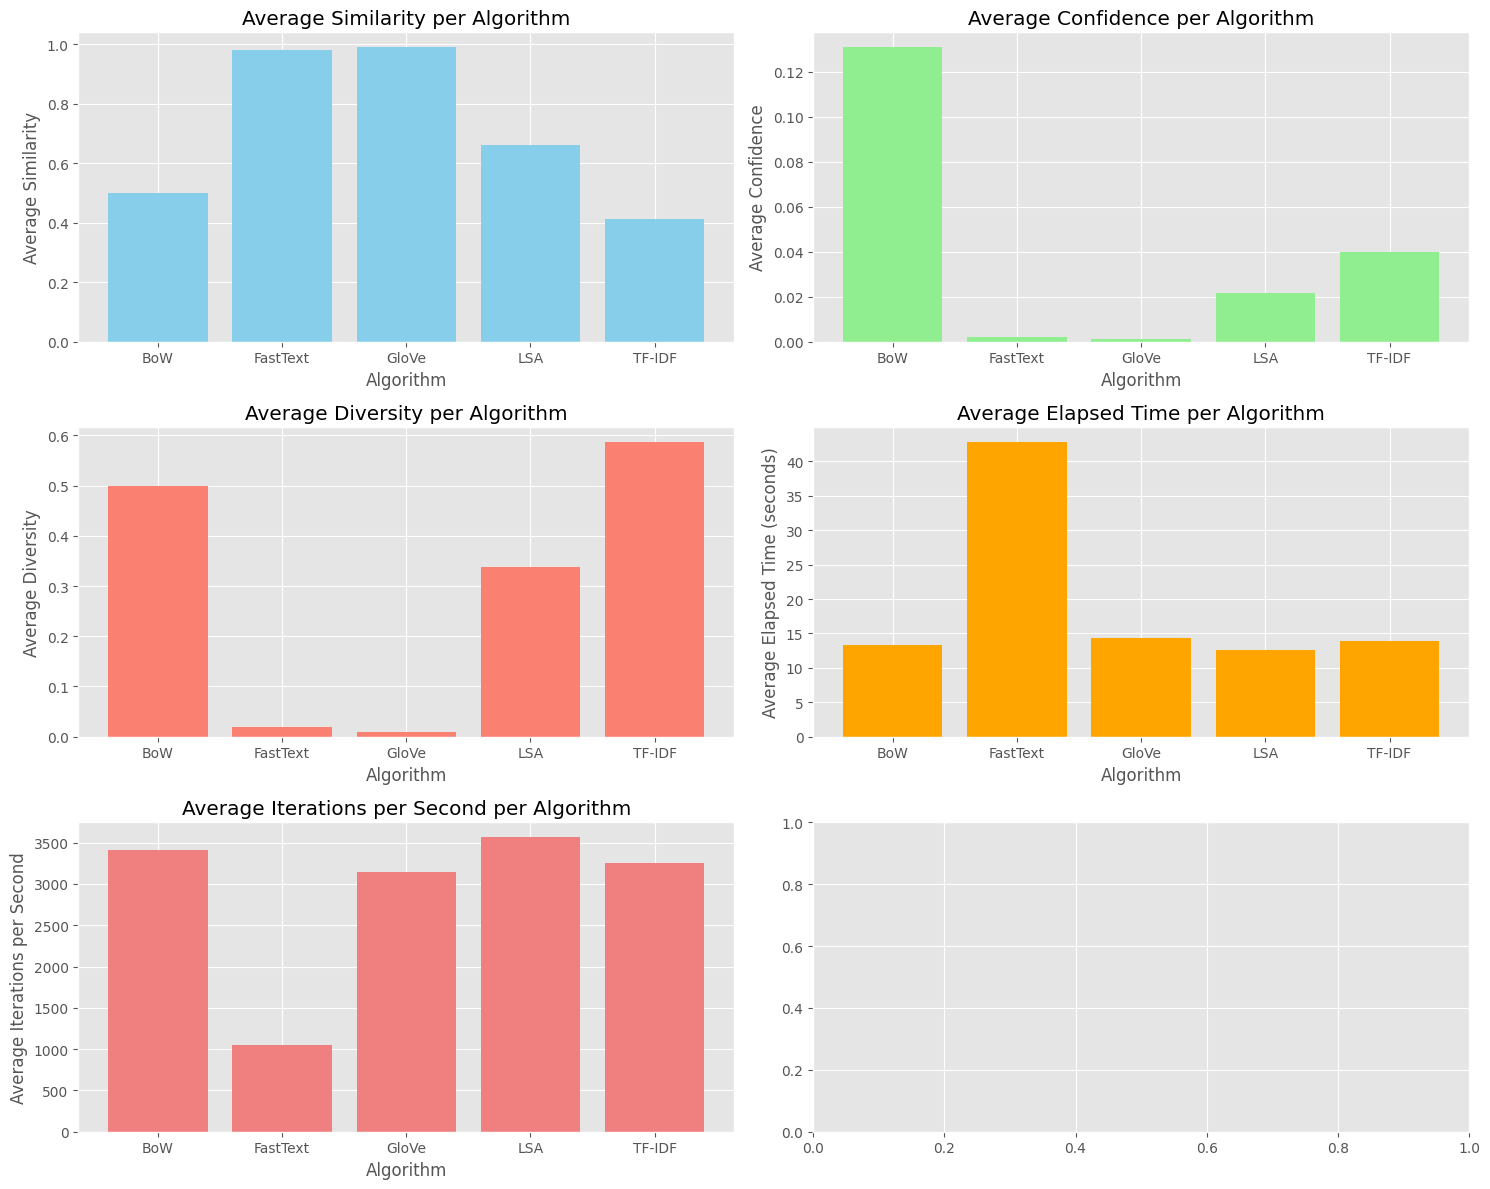

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the metrics DataFrame (make sure it's already generated)
metrics_df = pd.read_csv("algorithm_metrics_summary.csv")

# Set up the figure for the bar charts
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot Average Similarity
axes[0, 0].bar(metrics_df['algorithm'], metrics_df['avg_similarity'], color='skyblue')
axes[0, 0].set_title('Average Similarity per Algorithm')
axes[0, 0].set_ylabel('Average Similarity')
axes[0, 0].set_xlabel('Algorithm')

# Plot Average Confidence
axes[0, 1].bar(metrics_df['algorithm'], metrics_df['avg_confidence'], color='lightgreen')
axes[0, 1].set_title('Average Confidence per Algorithm')
axes[0, 1].set_ylabel('Average Confidence')
axes[0, 1].set_xlabel('Algorithm')

# Plot Average Diversity
axes[1, 0].bar(metrics_df['algorithm'], metrics_df['avg_diversity'], color='salmon')
axes[1, 0].set_title('Average Diversity per Algorithm')
axes[1, 0].set_ylabel('Average Diversity')
axes[1, 0].set_xlabel('Algorithm')

# Plot Average Elapsed Time
axes[1, 1].bar(metrics_df['algorithm'], metrics_df['avg_elapsed_time'], color='orange')
axes[1, 1].set_title('Average Elapsed Time per Algorithm')
axes[1, 1].set_ylabel('Average Elapsed Time (seconds)')
axes[1, 1].set_xlabel('Algorithm')

# Plot Average Iterations per Second
axes[2, 0].bar(metrics_df['algorithm'], metrics_df['avg_iterations_per_second'], color='lightcoral')
axes[2, 0].set_title('Average Iterations per Second per Algorithm')
axes[2, 0].set_ylabel('Average Iterations per Second')
axes[2, 0].set_xlabel('Algorithm')


# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


### Catalog Coverage - Results for Summaries
- percentage of items from the catalog that appear in the recommendations
- how many items the algorithm recommended



In [ ]:
import pandas as pd

# 🔹 Load the saved recommendations results
df_coverage = pd.read_csv("coverage_results/algorithm_coverage_results.csv")

# 🔹 Get the total number of unique items in the catalog
total_catalog_size = len(df_opensearch)

# 🔹 Calculate catalog coverage percentage for each entry
df_coverage["coverage_percent"] = (df_coverage["num_recommendations"] / total_catalog_size) * 100

# 🔹 Calculate the **average coverage per algorithm**
df_avg_coverage = df_coverage.groupby("algorithm")["coverage_percent"].mean().reset_index()

# 🔹 Round the average percentage to 2 decimal places
df_avg_coverage["coverage_percent"] = df_avg_coverage["coverage_percent"].round(2)

# 🔹 Save the average coverage results to a CSV file
df_avg_coverage.to_csv("coverage_results/average_algorithm_coverage.csv", index=False)

# 🔹 Display the final results
print("✅ Average Algorithm Coverage:")
print(df_avg_coverage)

print("\n✅ Average coverage saved to 'average_algorithm_coverage.csv'")


✅ Average Algorithm Coverage:
            algorithm  coverage_percent
0  1. TF-IDF + cosine              3.28
1           10. GloVe              8.14
2              2. LSA              4.17
3         3. Word2Vec             56.60
4          4. Doc2Vec             77.44
5             5. BERT              7.02
6              6. BoW              4.14
7             7. BM25              6.63
8              8. LDA             14.96
9         9. FastText             37.44

✅ Average coverage saved to 'average_algorithm_coverage.csv'


### Memory usage - Quarter Paragraphs

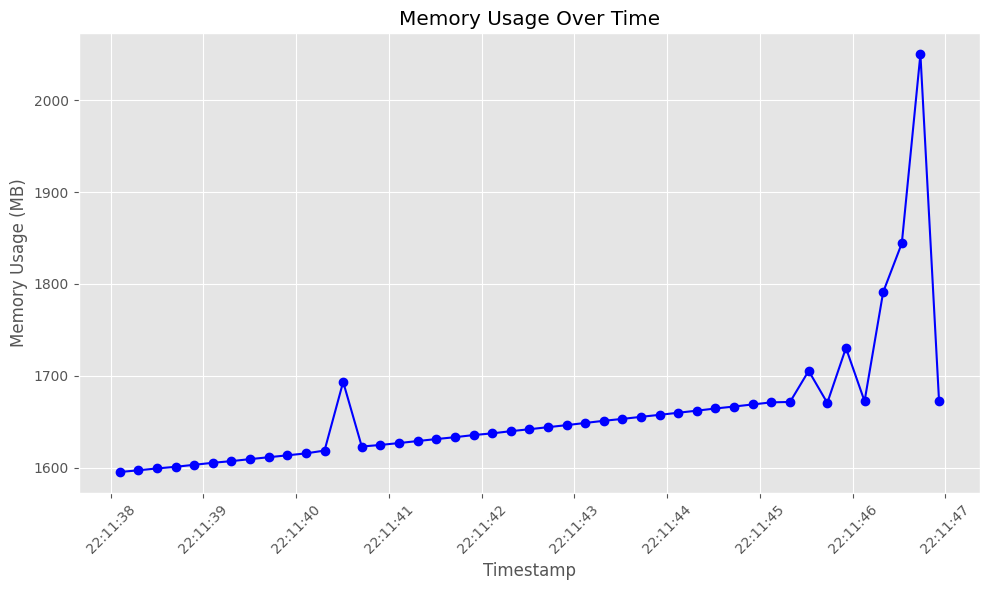

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_memory_usage(memory_file_path):
    # Read the memory tracking CSV file
    memory_df = pd.read_csv(memory_file_path)

    # Ensure that timestamps are in proper datetime format
    memory_df['timestamp'] = pd.to_datetime(memory_df['timestamp'], unit='s')

    # Plot memory usage over time
    plt.figure(figsize=(10, 6))
    plt.plot(memory_df['timestamp'], memory_df['memory_usage'], label='Memory Usage (MB)', color='b', linestyle='-', marker='o')
    
    # Add labels and title
    plt.xlabel('Timestamp')
    plt.ylabel('Memory Usage (MB)')
    plt.title('Memory Usage Over Time')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add grid
    plt.grid(True)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage:
memory_file_path = 'memory_tracking/lsa_memory_usage.csv'  # Replace with the actual path to your memory tracking CSV file
plot_memory_usage(memory_file_path)


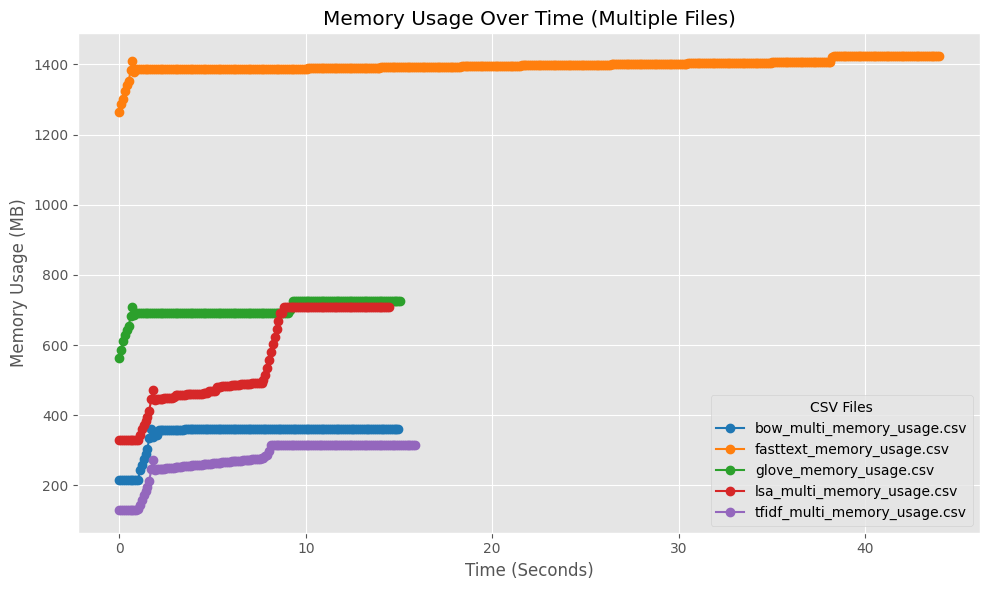

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_memory_usage_from_folder(folder_path):
    # Get a list of all CSV files in the folder
    memory_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Initialize the plot
    plt.figure(figsize=(10, 6))
    
    # Loop through each file and plot its data
    for idx, memory_file in enumerate(memory_files):
        memory_file_path = os.path.join(folder_path, memory_file)
        
        # Read the memory tracking CSV file
        memory_df = pd.read_csv(memory_file_path)
        
        # Ensure that timestamps are in proper datetime format
        memory_df['timestamp'] = pd.to_datetime(memory_df['timestamp'], unit='s')
        
        # Calculate time differences (in seconds) between consecutive timestamps
        memory_df['time_diff'] = memory_df['timestamp'].diff().dt.total_seconds().fillna(0)

        # Calculate cumulative time (starting from 0)
        memory_df['time'] = memory_df['time_diff'].cumsum()

        # Use a different color for each plot
        color = plt.cm.tab10(idx % 10)  # Get a color from the tab10 colormap

        # Plot memory usage over time for the current file
        plt.plot(memory_df['time'], memory_df['memory_usage'], label=memory_file, color=color, linestyle='-', marker='o')
    
    # Add labels and title
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Memory Usage (MB)')
    plt.title('Memory Usage Over Time (Multiple Files)')
    
    # Add grid
    plt.grid(True)

    # Add legend to differentiate each file
    plt.legend(title='CSV Files')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage:
folder_path = 'separate_algos/memory_tracking_quarter_3/'
#folder_path = 'separate_algos/w2v_saved_vectors/' 
plot_memory_usage_from_folder(folder_path)


### CPU percent - Quarter Paragraphs

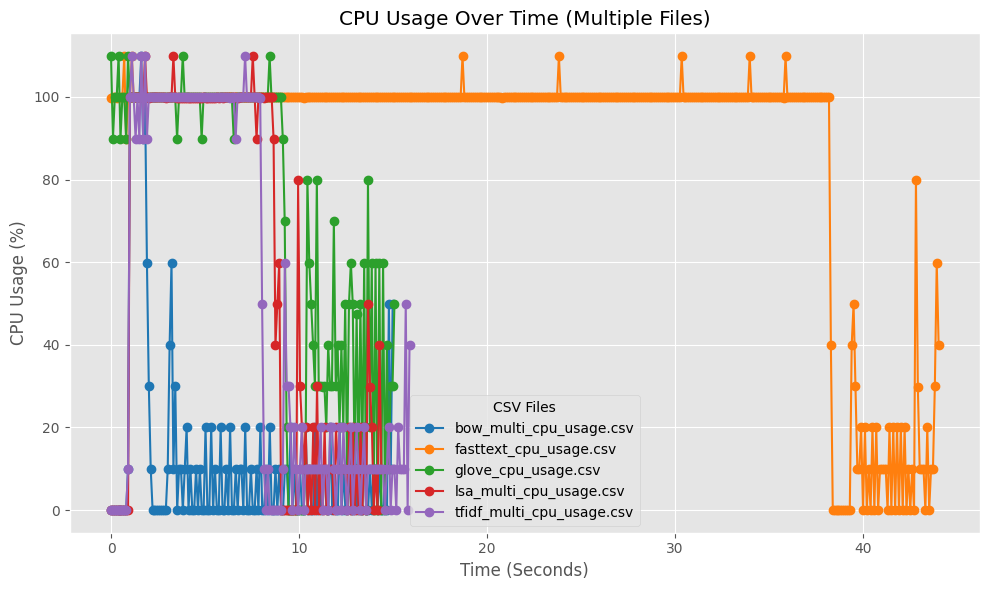

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_cpu_usage_from_folder(folder_path):
    # Get a list of all CSV files in the folder
    cpu_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Initialize the plot
    plt.figure(figsize=(10, 6))
    
    # Loop through each file and plot its data
    for idx, cpu_file in enumerate(cpu_files):
        cpu_file_path = os.path.join(folder_path, cpu_file)
        
        # Read the CPU tracking CSV file
        cpu_df = pd.read_csv(cpu_file_path)
        
        # Ensure that timestamps are in proper datetime format
        cpu_df['timestamp'] = pd.to_datetime(cpu_df['timestamp'], unit='s')
        
        # Calculate time differences (in seconds) between consecutive timestamps
        cpu_df['time_diff'] = cpu_df['timestamp'].diff().dt.total_seconds().fillna(0)

        # Calculate cumulative time (starting from 0)
        cpu_df['time'] = cpu_df['time_diff'].cumsum()

        # Use a different color for each plot
        color = plt.cm.tab10(idx % 10)  # Get a color from the tab10 colormap

        # Plot CPU usage over time for the current file
        plt.plot(cpu_df['time'], cpu_df['cpu_usage'], label=cpu_file, color=color, linestyle='-', marker='o')
    
    # Add labels and title
    plt.xlabel('Time (Seconds)')
    plt.ylabel('CPU Usage (%)')
    plt.title('CPU Usage Over Time (Multiple Files)')
    
    # Add grid
    plt.grid(True)

    # Add legend to differentiate each file
    plt.legend(title='CSV Files')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage:
folder_path = 'separate_algos/cpu_tracking_quarter/'  # Adjust the path as needed
plot_cpu_usage_from_folder(folder_path)


In [22]:
performance_df.head(10)

,algorithm,elapsed_time,memory_usage,cpu_usage,iterations_done,total_iterations,iterations_per_second,estimated_remaining_time,estimated_total_time,book_index,paragraph_index,book_title,text,similarity_score,recommended_book,recommended_text
0,bert,5169.358369,1256.500000,24.2,5.0,181559.0,0.000967,1.877035e+08,1.877087e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,bm25,6.219216,3657.007812,0.6,0.0,181559.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,bow,2.176916,1746.878906,2.6,5.0,181559.0,2.296827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,doc2vec,3600.007345,1591.191406,0.0,154831.0,181559.0,43.008523,6.214582e+02,4.221466e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,fasttext,339.307317,4676.718750,1.1,181559.0,181559.0,535.087194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,glove,82.948251,3469.902344,6.3,181559.0,181559.0,2188.822522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,lda,393.981151,8755.480469,0.3,5.0,181559.0,0.012691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,lsa,19.045109,1234.851562,6.6,181559.0,181559.0,9533.103970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,tf-idf,19.774544,1064.285156,7.7,181559.0,181559.0,9181.450546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,tfidf,18.007489,1241.085938,1.3,181559.0,181559.0,10082.416418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Akos Levardy\AppData\Local\Temp\ipykernel_21604\851585504.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_data["algorithm"] = algo_name
C:\Users\Akos Levardy\AppData\Local\Temp\ipykernel_21604\851585504.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_data["algorithm"] = algo_name
C:\Users\Akos Levardy\AppData\Local\Temp\ipykernel_21604\851585504.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

✅ Similarity metrics saved to 'algorithm_similarity_metrics.csv'


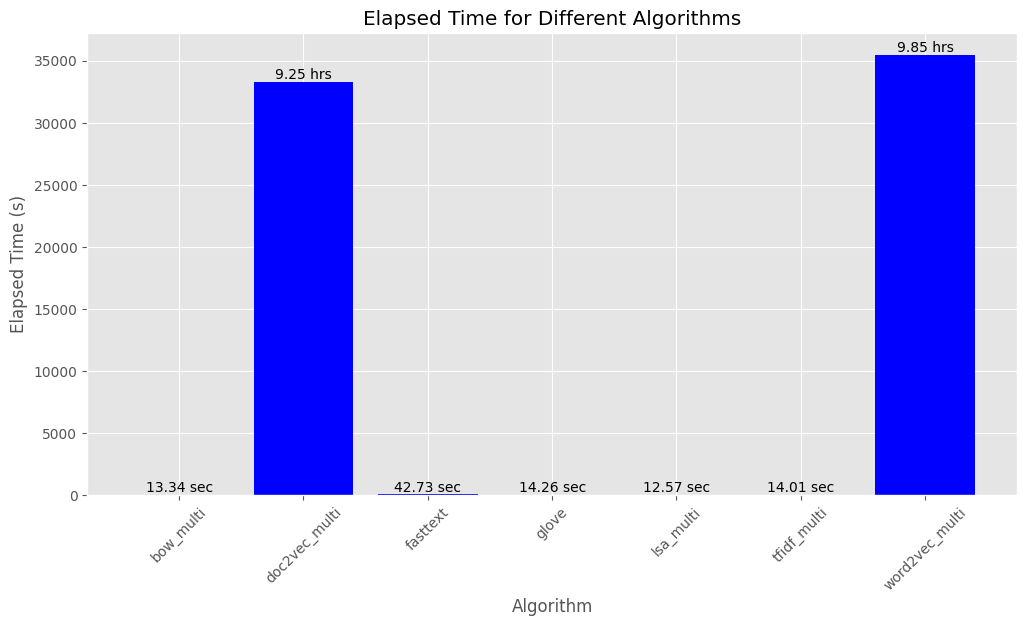

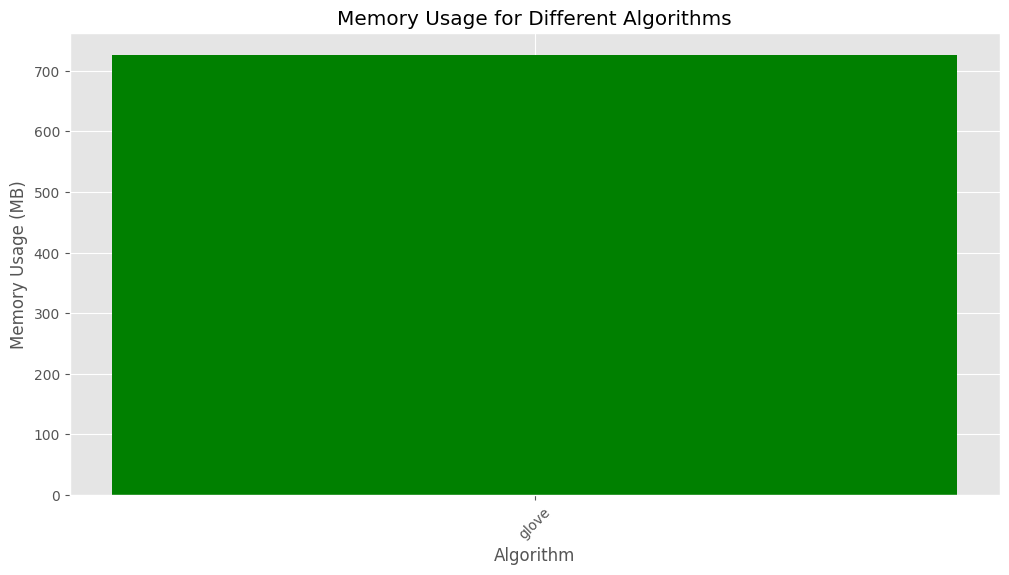

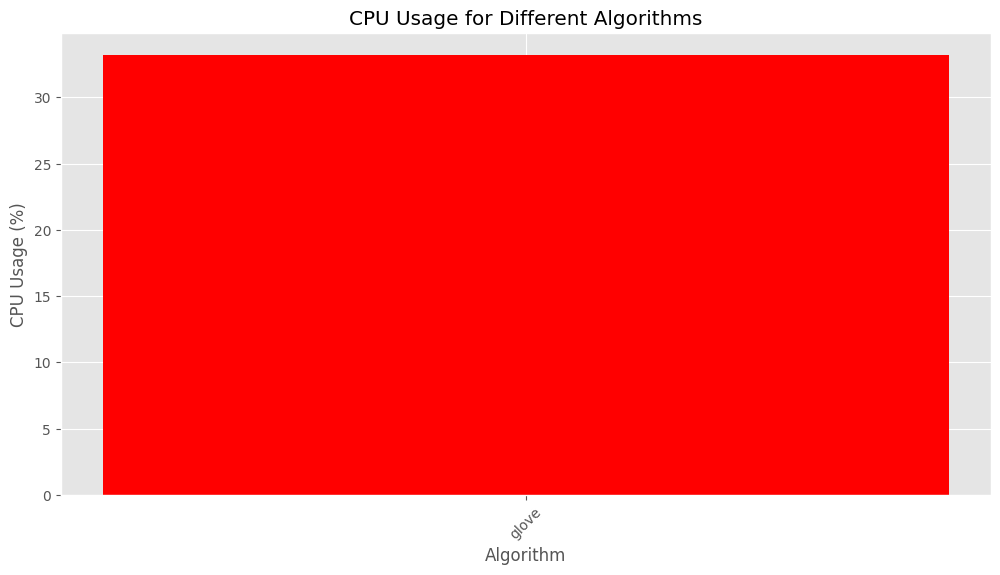

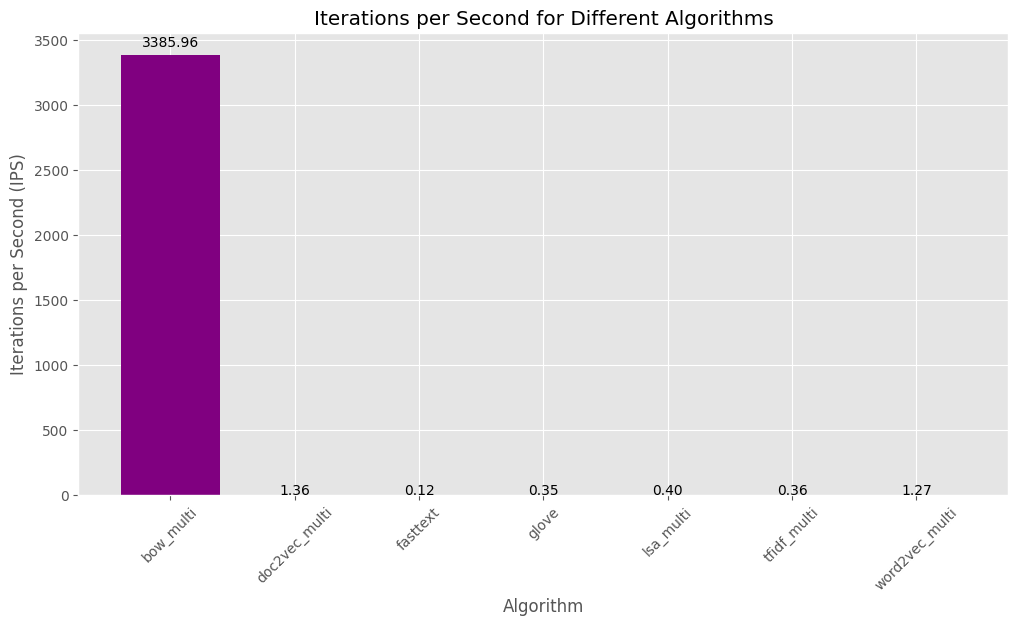

✅ Performance graphs generated successfully!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import os

# Load all performance result CSV files
csv_files = glob.glob("separate_algos/results_quarter/*_performance_results.csv")

# Initialize an empty DataFrame to store combined results
all_results = []
similarities_res = []

for file in csv_files:
    df = pd.read_csv(file)

    algo_name = os.path.basename(file).split("_performance_results")[0]
    performance_data = df.iloc[0]
    performance_data["algorithm"] = algo_name  
    
    sim_data = df.iloc[2:].copy()
    sim_data["algorithm"] = algo_name 
    similarities_res.append(sim_data)
    all_results.append(performance_data)

# Convert to DataFrame
performance_df = pd.DataFrame(all_results)
# sim_df = pd.DataFrame(similarities_res)
sim_df = pd.concat(similarities_res, ignore_index=True)
sim_df = sim_df.fillna(0)


# Convert relevant columns to numeric values
numeric_columns = ["elapsed_time", "memory_usage", "cpu_usage", "iterations_done", "iterations_per_second"]
performance_df[numeric_columns] = performance_df[numeric_columns].apply(pd.to_numeric)

if not sim_df.empty:
    sim_df["similarity_score"] = pd.to_numeric(sim_df["similarity_score"], errors="coerce")
    df_metrics = sim_df.groupby("algorithm")["similarity_score"].agg(["mean", "std"]).reset_index()
    df_metrics.rename(columns={"mean": "avg_similarity", "std": "confidence"}, inplace=True)
    df_metrics["diversity"] = 1 - df_metrics["avg_similarity"]
    df_metrics = df_metrics.round(3)
    df_metrics.to_csv("results/algorithm_similarity_metrics_2.csv", index=False)
    print("✅ Similarity metrics saved to 'algorithm_similarity_metrics.csv'")




#### PLOT
# Set plot style
plt.style.use("ggplot")

# Define figure size
figsize = (12, 6)

# Plot elapsed time
plt.figure(figsize=figsize)
bars = plt.bar(performance_df["algorithm"], performance_df["elapsed_time"], color='blue')
plt.xlabel("Algorithm")
plt.ylabel("Elapsed Time (s)")
plt.title("Elapsed Time for Different Algorithms")
plt.xticks(rotation=45)

# Add exact elapsed time values on top of bars
for bar, time_value in zip(bars, performance_df["elapsed_time"]):
    if time_value < 3600:
        label = f"{time_value:.2f} sec"
    else:
        label = f"{time_value / 3600:.2f} hrs"
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), label, ha='center', va='bottom', fontsize=10)

plt.show()

# Plot memory usage
plt.figure(figsize=figsize)
plt.bar(performance_df["algorithm"], performance_df["memory_usage"], color='green')
plt.xlabel("Algorithm")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage for Different Algorithms")
plt.xticks(rotation=45)
plt.show()

# Plot CPU usage
plt.figure(figsize=figsize)
plt.bar(performance_df["algorithm"], performance_df["cpu_usage"], color='red')
plt.xlabel("Algorithm")
plt.ylabel("CPU Usage (%)")
plt.title("CPU Usage for Different Algorithms")
plt.xticks(rotation=45)
plt.show()

# Plot Iterations per Second
plt.figure(figsize=figsize)
bars = plt.bar(performance_df["algorithm"], performance_df["iterations_per_second"], color='purple')
plt.xlabel("Algorithm")
plt.ylabel("Iterations per Second (IPS)")
plt.title("Iterations per Second for Different Algorithms")
plt.xticks(rotation=45)

# Add exact IPS values on top of bars
for bar, ips_value in zip(bars, performance_df["iterations_per_second"]):
    height = bar.get_height()
    offset = max(height * 0.02, 5)  # Ensure a minimum offset for visibility
    y_position = height + offset if height > 0 else offset  # Avoid placing text at 0
    
    label = f"{ips_value:.2f}"
    plt.text(bar.get_x() + bar.get_width()/2, y_position, label, ha='center', fontsize=10)

plt.show()
print("✅ Performance graphs generated successfully!")


### SIM / CONF / DIV

In [9]:
df_metrics.head(10)

,algorithm,avg_similarity,confidence,diversity
0,bow_multi,0.309,0.014,0.691
1,doc2vec_multi,0.644,0.015,0.356
2,fasttext,0.984,0.001,0.016
3,glove,0.992,0.001,0.008
4,lsa_multi,0.616,0.015,0.384
5,tfidf_multi,0.312,0.024,0.688
6,word2vec_multi,0.964,0.001,0.036


### NEW RESULTS FROM VM

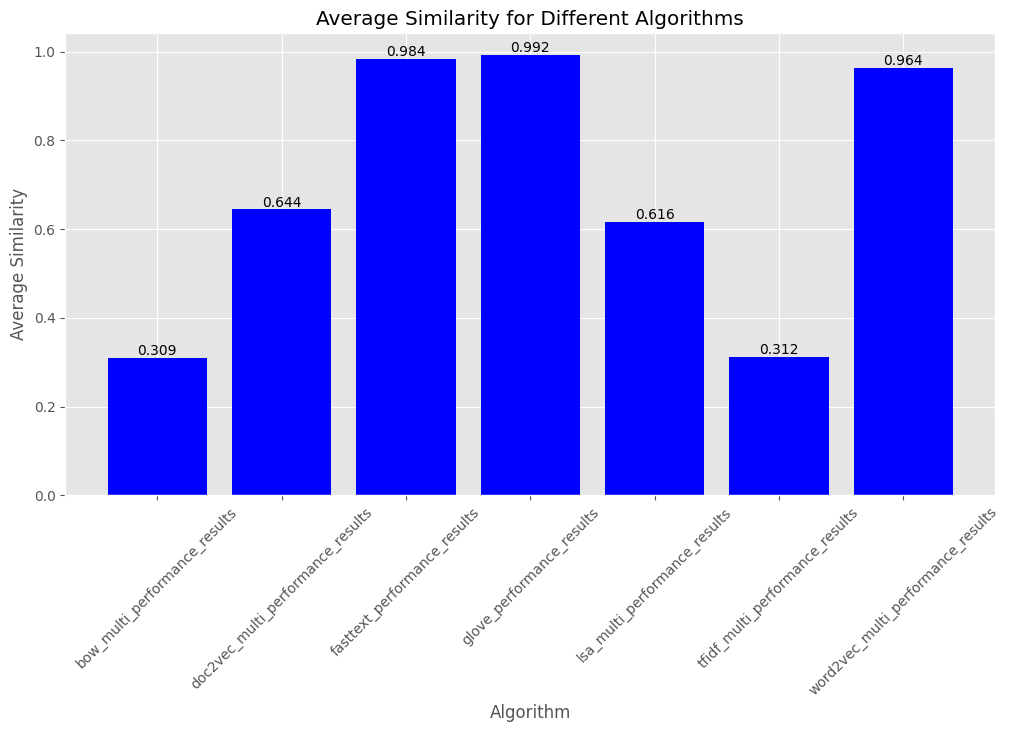

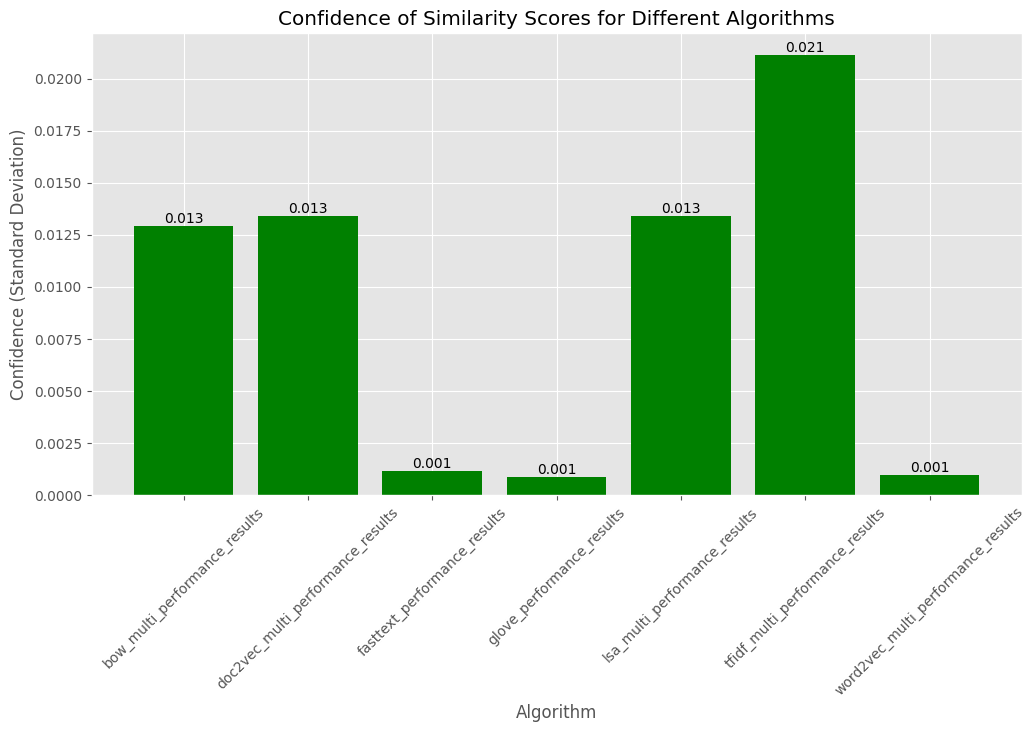

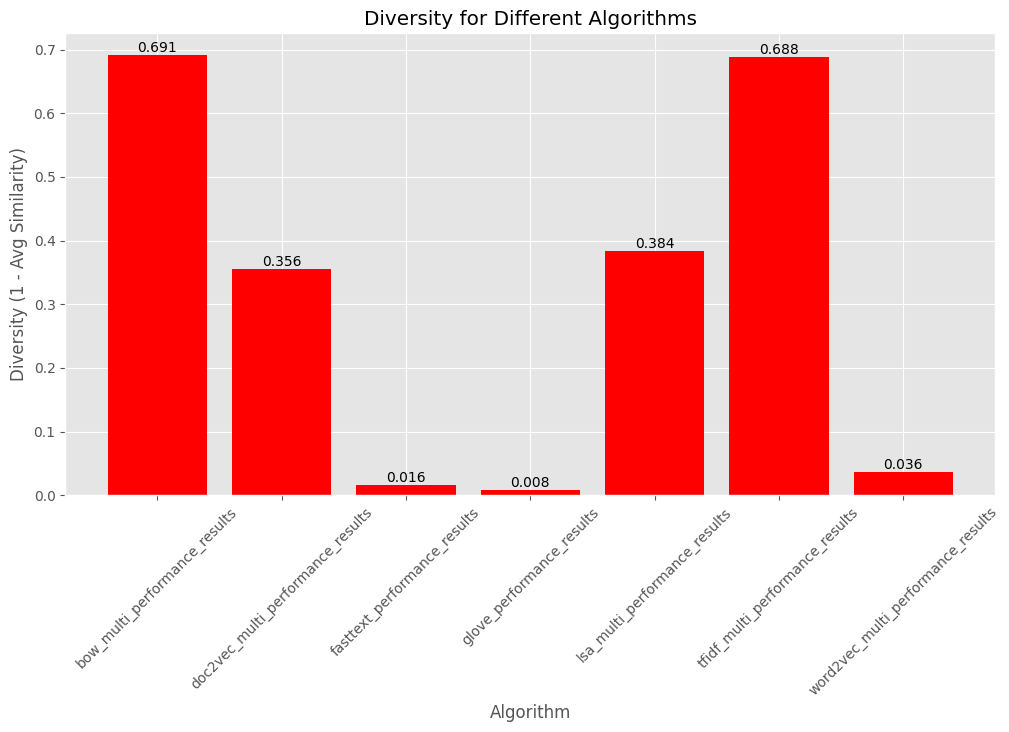

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_metrics(cosine_similarities):
    """Calculate the three metrics: average similarity, confidence, and diversity."""
    # Average similarity
    avg_similarity = np.mean(cosine_similarities)
    
    # Confidence (Standard Deviation)
    confidence = np.std(cosine_similarities)
    
    # Diversity (1 - avg_similarity)
    diversity = 1 - avg_similarity
    
    return avg_similarity, confidence, diversity

def process_algorithm_results(file_path):
    """Process the results from a single algorithm's CSV file."""
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Extract cosine similarities for top recommendations (assuming they are in the 'similarity_score' column)
    cosine_similarities = df['similarity_score'].dropna().tolist()  # Drop any NaNs and convert to list
    
    # Get metrics for the algorithm
    avg_similarity, confidence, diversity = calculate_metrics(cosine_similarities)
    
    # Extract algorithm name from the filename (assumes the filename contains the algorithm's name)
    algo_name = os.path.basename(file_path).split('.')[0]
    
    return {
        "algorithm": algo_name,
        "avg_similarity": avg_similarity,
        "confidence": confidence,
        "diversity": diversity
    }

def plot_metrics(df_metrics):
    """Plot the three metrics: average similarity, confidence, and diversity."""
    figsize = (12, 6)

    # Plot average similarity
    plt.figure(figsize=figsize)
    bars = plt.bar(df_metrics["algorithm"], df_metrics["avg_similarity"], color='blue')
    plt.xlabel("Algorithm")
    plt.ylabel("Average Similarity")
    plt.title("Average Similarity for Different Algorithms")
    plt.xticks(rotation=45)
    for bar, value in zip(bars, df_metrics["avg_similarity"]):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{value:.3f}", ha='center', va='bottom', fontsize=10)
    plt.show()

    # Plot confidence
    plt.figure(figsize=figsize)
    bars = plt.bar(df_metrics["algorithm"], df_metrics["confidence"], color='green')
    plt.xlabel("Algorithm")
    plt.ylabel("Confidence (Standard Deviation)")
    plt.title("Confidence of Similarity Scores for Different Algorithms")
    plt.xticks(rotation=45)
    for bar, value in zip(bars, df_metrics["confidence"]):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{value:.3f}", ha='center', va='bottom', fontsize=10)
    plt.show()

    # Plot diversity
    plt.figure(figsize=figsize)
    bars = plt.bar(df_metrics["algorithm"], df_metrics["diversity"], color='red')
    plt.xlabel("Algorithm")
    plt.ylabel("Diversity (1 - Avg Similarity)")
    plt.title("Diversity for Different Algorithms")
    plt.xticks(rotation=45)
    for bar, value in zip(bars, df_metrics["diversity"]):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{value:.3f}", ha='center', va='bottom', fontsize=10)
    plt.show()

def process_all_algorithms(folder_path):
    """Process all algorithm results in the given folder."""
    results = []

    # Loop through each CSV file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            algorithm_metrics = process_algorithm_results(file_path)
            results.append(algorithm_metrics)

    # Create a DataFrame for metrics
    df_metrics = pd.DataFrame(results)
    
    # Plot the metrics
    plot_metrics(df_metrics)

    return df_metrics

# Example usage:
folder_path = 'separate_algos/results_quarter/'  # Replace with the path to your folder containing CSV files
df_metrics = process_all_algorithms(folder_path)


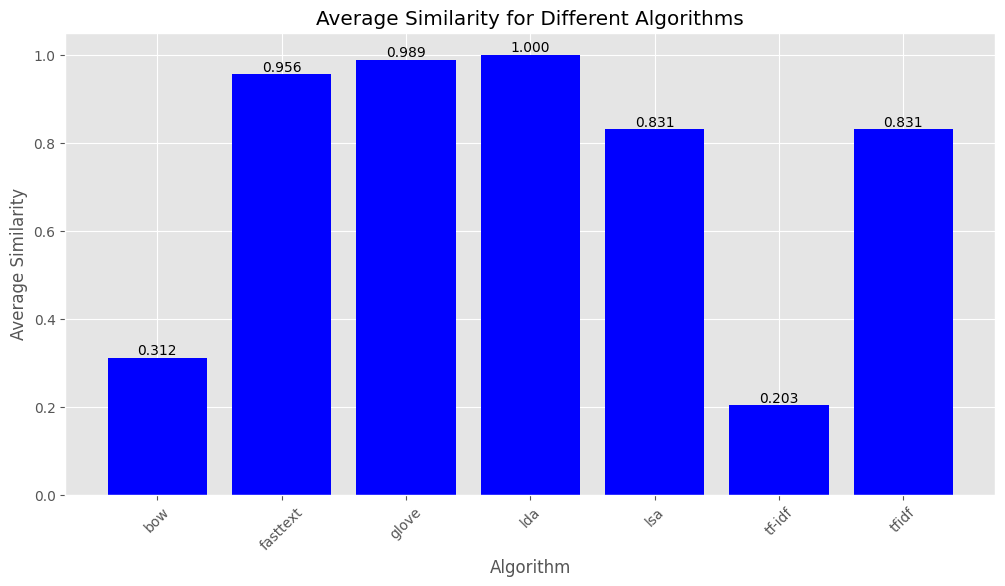

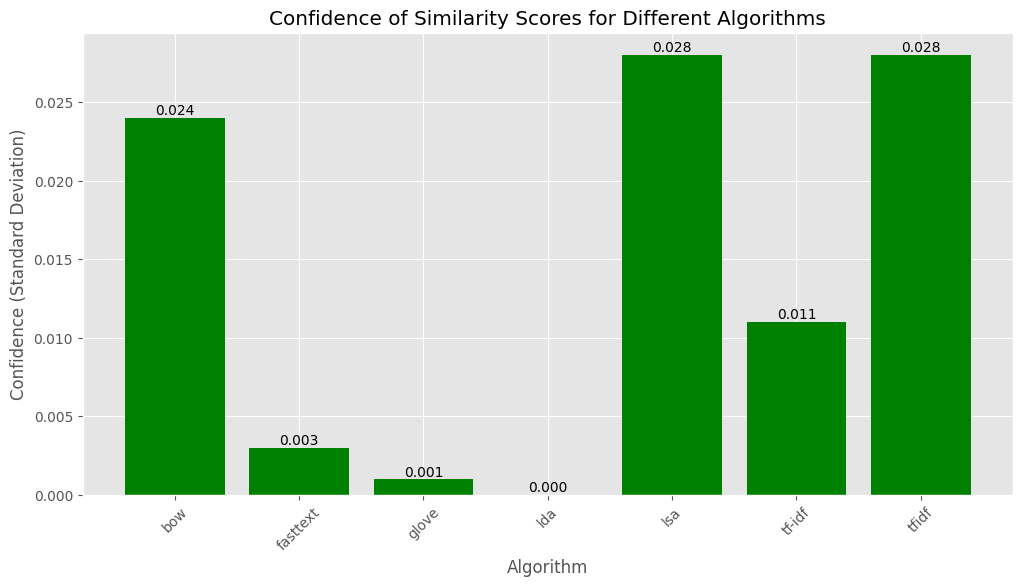

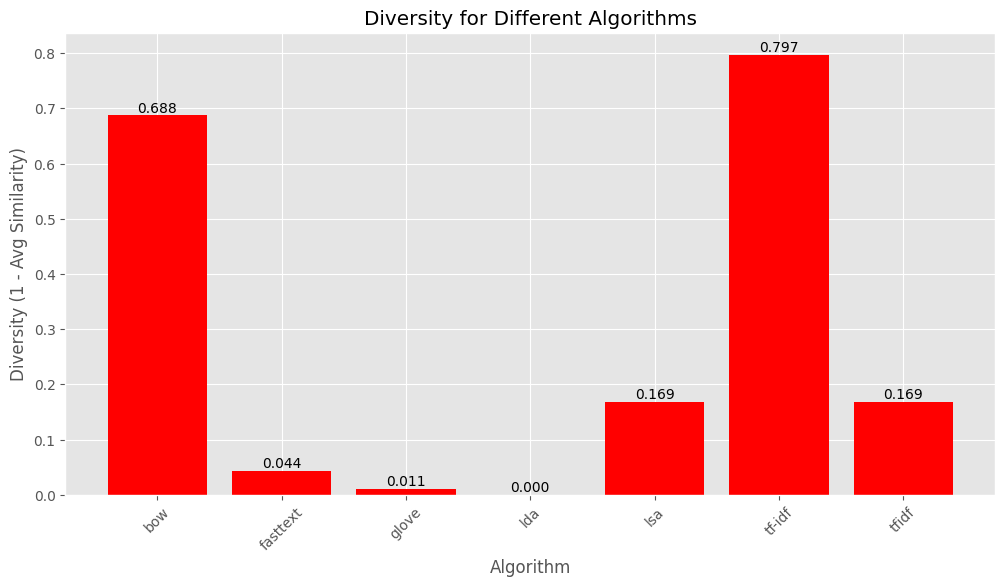

In [19]:
import pandas as pd
import matplotlib.pyplot as plt



# Define figure size
figsize = (12, 6)

# Plot avg_similarity
plt.figure(figsize=figsize)
bars = plt.bar(df_metrics["algorithm"], df_metrics["avg_similarity"], color='blue')
plt.xlabel("Algorithm")
plt.ylabel("Average Similarity")
plt.title("Average Similarity for Different Algorithms")
plt.xticks(rotation=45)

# Add exact values on top of bars
for bar, value in zip(bars, df_metrics["avg_similarity"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{value:.3f}", ha='center', va='bottom', fontsize=10)

plt.show()

# Plot confidence
plt.figure(figsize=figsize)
bars = plt.bar(df_metrics["algorithm"], df_metrics["confidence"], color='green')
plt.xlabel("Algorithm")
plt.ylabel("Confidence (Standard Deviation)")
plt.title("Confidence of Similarity Scores for Different Algorithms")
plt.xticks(rotation=45)

# Add exact values on top of bars
for bar, value in zip(bars, df_metrics["confidence"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{value:.3f}", ha='center', va='bottom', fontsize=10)

plt.show()

# Plot diversity
plt.figure(figsize=figsize)
bars = plt.bar(df_metrics["algorithm"], df_metrics["diversity"], color='red')
plt.xlabel("Algorithm")
plt.ylabel("Diversity (1 - Avg Similarity)")
plt.title("Diversity for Different Algorithms")
plt.xticks(rotation=45)

# Add exact values on top of bars
for bar, value in zip(bars, df_metrics["diversity"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{value:.3f}", ha='center', va='bottom', fontsize=10)

plt.show()

### Prediction Accuracy - needs different Dataset that has ratings to know what the ground truth is for books
Ranking Measures - Precision@K, Recall@K, NDCG@K
- how well the algorithm ranks relevant books in the top K recommendations

- need to have GROUND TRUTH - can be defined manually, or maybe as similarity somehow

### ENVIRONMENT - METRICS

#### nieco co zo cpu a memory usage vypocita kolko energie to zere / elektriny ----> Vplyv na zivotne prostredie (ENVIRONMENT)

ktory algoritmus je ekologickejsi